In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [2]:
df=pd.read_csv('pimaindia.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


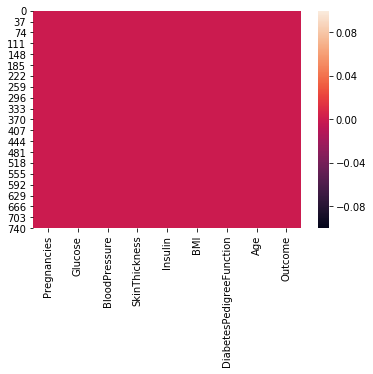

In [9]:
sns.heatmap(df.isnull())

<Figure size 1440x1152 with 0 Axes>

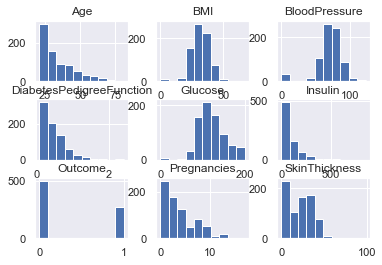

In [10]:
sns.set()
plt.figure(figsize=(20,16))
df.hist()
plt.show()

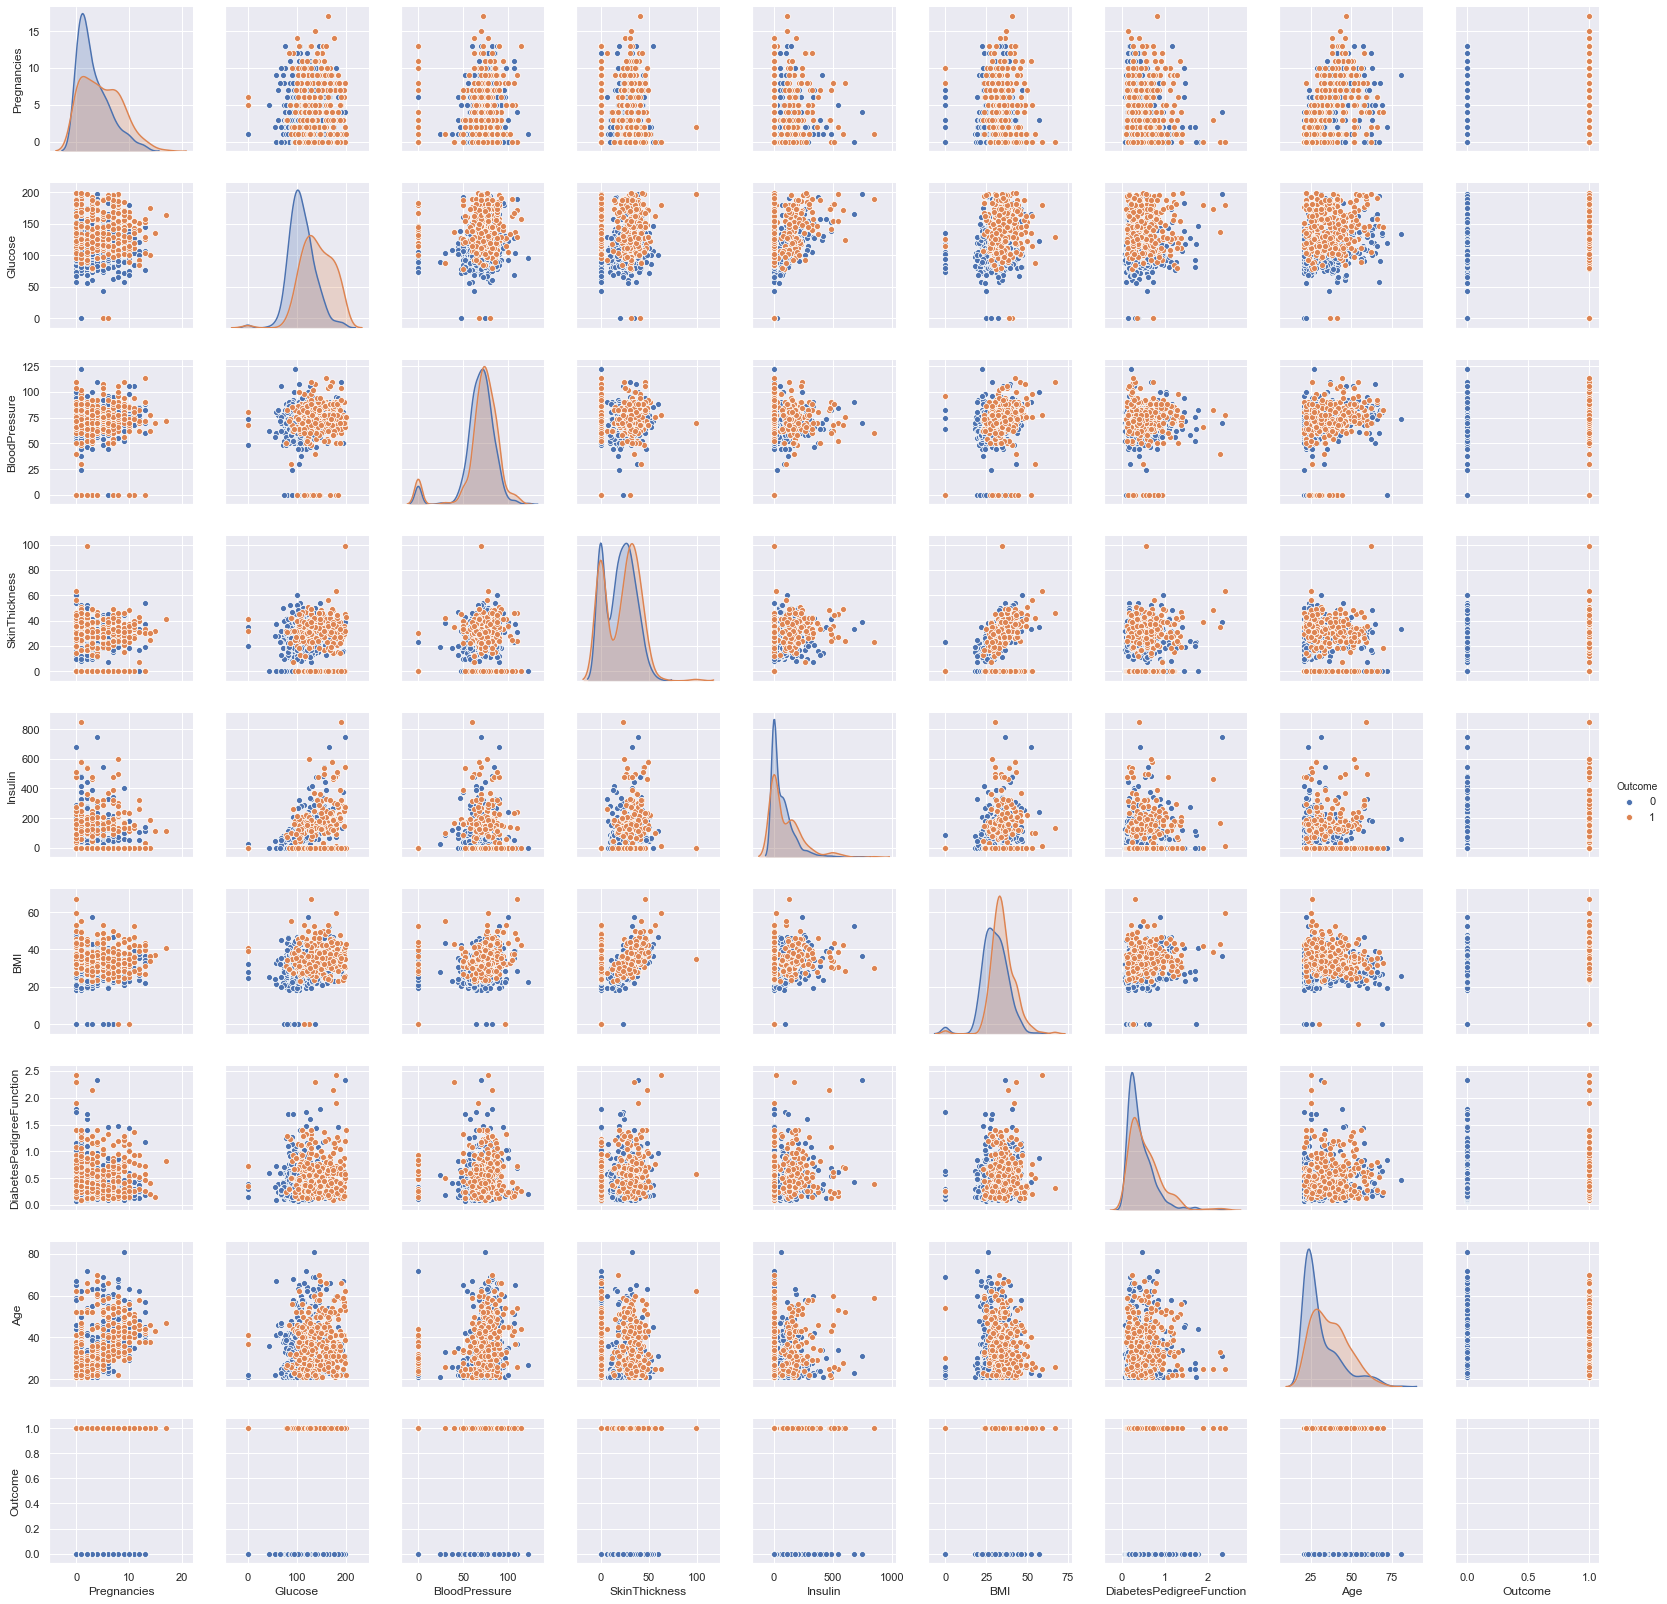

In [11]:
sns.pairplot(df,hue='Outcome')

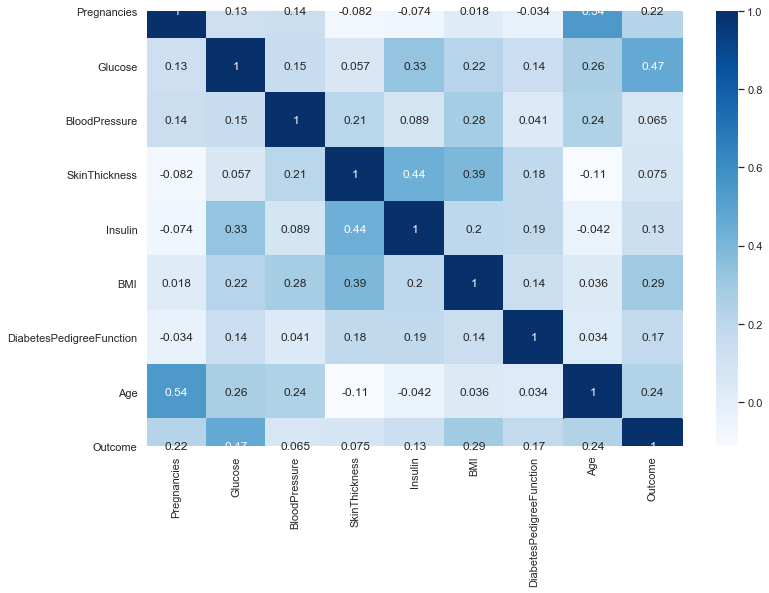

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [13]:
# Model Building

In [14]:
y=df.Outcome
x=df.drop('Outcome',axis=1)

In [15]:
x.shape,y.shape

((768, 8), (768,))

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
xtrain.shape,ytrain.shape

((614, 8), (614,))

In [17]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [18]:
def create_model(optimizer='rmsprop',init='glorot_uniform'):
    model=Sequential()
    model.add(Dense(32,activation='relu',init=init,input_dim=xtrain.shape[1]))
    model.add(Dense(16,activation='relu',init=init))
    model.add(Dense(1,activation='sigmoid',init=init))
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [19]:
estimator=KerasClassifier(build_fn=create_model,verbose=1)
optimizers=['rmsprop','adam']
init=['glorot_uniform','uniform','normal']
batches=np.array([5,10,20])
epochs=np.array([50,100,150])

param_grid=dict(optimizer=optimizers,batch_size=batches,init=init,epochs=epochs)
grid=GridSearchCV(estimator,param_grid=param_grid)
scores=grid.fit(xtrain,ytrain)

Epoch 1/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6431 - accuracy: 0.6724
Epoch 2/50
409/409 [==============================] - 0s 362us/step - loss: 0.5576 - accuracy: 0.7457
Epoch 3/50
409/409 [==============================] - 0s 306us/step - loss: 0.5120 - accuracy: 0.7506
Epoch 4/50
409/409 [==============================] - 0s 382us/step - loss: 0.4889 - accuracy: 0.7506
Epoch 5/50
409/409 [==============================] - 0s 406us/step - loss: 0.4771 - accuracy: 0.7677
Epoch 6/50
409/409 [==============================] - 0s 306us/step - loss: 0.4688 - accuracy: 0.7579
Epoch 7/50
409/409 [==============================] - 0s 328us/step - loss: 0.4614 - accuracy: 0.7653
Epoch 8/50
409/409 [==============================] - 0s 458us/step - loss: 0.4569 - accuracy: 0.7653
Epoch 9/50
409/409 [==============================] - 0s 554us/step - loss: 0.4532 - accuracy: 0.7628
Epoch 10/50
409/409 [==============================] - 0s 420us/step - loss: 0.4495 

409/409 [==============================] - 0s 305us/step - loss: 0.3643 - accuracy: 0.8411
Epoch 31/50
409/409 [==============================] - 0s 497us/step - loss: 0.3622 - accuracy: 0.8435
Epoch 32/50
409/409 [==============================] - 0s 344us/step - loss: 0.3619 - accuracy: 0.8435
Epoch 33/50
409/409 [==============================] - 0s 319us/step - loss: 0.3596 - accuracy: 0.8509
Epoch 34/50
409/409 [==============================] - 0s 326us/step - loss: 0.3572 - accuracy: 0.8533
Epoch 35/50
409/409 [==============================] - 0s 573us/step - loss: 0.3575 - accuracy: 0.8533
Epoch 36/50
409/409 [==============================] - 0s 553us/step - loss: 0.3547 - accuracy: 0.8582
Epoch 37/50
409/409 [==============================] - 0s 267us/step - loss: 0.3537 - accuracy: 0.8557
Epoch 38/50
409/409 [==============================] - 0s 306us/step - loss: 0.3518 - accuracy: 0.8557
Epoch 39/50
409/409 [==============================] - 0s 382us/step - loss: 0.3491 -

409/409 [==============================] - 0s 346us/step - loss: 0.4411 - accuracy: 0.7775
Epoch 9/50
409/409 [==============================] - 0s 306us/step - loss: 0.4358 - accuracy: 0.7775
Epoch 10/50
409/409 [==============================] - 0s 306us/step - loss: 0.4318 - accuracy: 0.7824
Epoch 11/50
409/409 [==============================] - 0s 458us/step - loss: 0.4252 - accuracy: 0.7922
Epoch 12/50
409/409 [==============================] - 0s 666us/step - loss: 0.4210 - accuracy: 0.7873
Epoch 13/50
409/409 [==============================] - 0s 344us/step - loss: 0.4179 - accuracy: 0.7775
Epoch 14/50
409/409 [==============================] - 0s 403us/step - loss: 0.4145 - accuracy: 0.7995
Epoch 15/50
409/409 [==============================] - 0s 308us/step - loss: 0.4105 - accuracy: 0.7897
Epoch 16/50
409/409 [==============================] - 0s 344us/step - loss: 0.4084 - accuracy: 0.8044
Epoch 17/50
409/409 [==============================] - 0s 458us/step - loss: 0.4031 - 

409/409 [==============================] - 0s 418us/step - loss: 0.3402 - accuracy: 0.8582
Epoch 37/50
409/409 [==============================] - 0s 600us/step - loss: 0.3347 - accuracy: 0.8631
Epoch 38/50
409/409 [==============================] - 0s 689us/step - loss: 0.3356 - accuracy: 0.8655
Epoch 39/50
409/409 [==============================] - 0s 369us/step - loss: 0.3302 - accuracy: 0.8557
Epoch 40/50
409/409 [==============================] - 0s 380us/step - loss: 0.3283 - accuracy: 0.8631
Epoch 41/50
409/409 [==============================] - 0s 367us/step - loss: 0.3253 - accuracy: 0.8582
Epoch 42/50
409/409 [==============================] - 0s 378us/step - loss: 0.3219 - accuracy: 0.8778
Epoch 43/50
409/409 [==============================] - 0s 377us/step - loss: 0.3219 - accuracy: 0.8729
Epoch 44/50
409/409 [==============================] - 0s 716us/step - loss: 0.3182 - accuracy: 0.8704
Epoch 45/50
409/409 [==============================] - 0s 637us/step - loss: 0.3155 -

409/409 [==============================] - 0s 422us/step - loss: 0.4503 - accuracy: 0.7702
Epoch 15/50
409/409 [==============================] - 0s 352us/step - loss: 0.4487 - accuracy: 0.7702
Epoch 16/50
409/409 [==============================] - 0s 360us/step - loss: 0.4472 - accuracy: 0.7751
Epoch 17/50
409/409 [==============================] - 0s 478us/step - loss: 0.4449 - accuracy: 0.7726
Epoch 18/50
409/409 [==============================] - 0s 703us/step - loss: 0.4447 - accuracy: 0.7800
Epoch 19/50
409/409 [==============================] - 0s 375us/step - loss: 0.4433 - accuracy: 0.7751
Epoch 20/50
409/409 [==============================] - 0s 401us/step - loss: 0.4420 - accuracy: 0.7800
Epoch 21/50
409/409 [==============================] - 0s 367us/step - loss: 0.4407 - accuracy: 0.7775
Epoch 22/50
409/409 [==============================] - 0s 368us/step - loss: 0.4389 - accuracy: 0.7775
Epoch 23/50
409/409 [==============================] - 0s 365us/step - loss: 0.4387 -

Epoch 43/50
409/409 [==============================] - 0s 487us/step - loss: 0.3933 - accuracy: 0.8240
Epoch 44/50
409/409 [==============================] - 0s 594us/step - loss: 0.3924 - accuracy: 0.8337
Epoch 45/50
409/409 [==============================] - 0s 626us/step - loss: 0.3902 - accuracy: 0.8264
Epoch 46/50
409/409 [==============================] - 0s 326us/step - loss: 0.3915 - accuracy: 0.8337
Epoch 47/50
409/409 [==============================] - 0s 372us/step - loss: 0.3923 - accuracy: 0.8386
Epoch 48/50
409/409 [==============================] - ETA: 0s - loss: 0.3935 - accuracy: 0.83 - 0s 337us/step - loss: 0.3886 - accuracy: 0.8411
Epoch 49/50
409/409 [==============================] - 0s 303us/step - loss: 0.3891 - accuracy: 0.8411
Epoch 50/50
205/205 [==============================] - 0s 679us/step
Epoch 1/50
410/410 [==============================] - 1s 2ms/step - loss: 0.6791 - accuracy: 0.6463
Epoch 2/50
410/410 [==============================] - 0s 289us/step 

Epoch 21/50
409/409 [==============================] - 0s 415us/step - loss: 0.4362 - accuracy: 0.7873
Epoch 22/50
409/409 [==============================] - 0s 344us/step - loss: 0.4322 - accuracy: 0.7775
Epoch 23/50
409/409 [==============================] - 0s 301us/step - loss: 0.4335 - accuracy: 0.7751
Epoch 24/50
409/409 [==============================] - 0s 510us/step - loss: 0.4299 - accuracy: 0.7775
Epoch 25/50
409/409 [==============================] - 0s 382us/step - loss: 0.4317 - accuracy: 0.7848
Epoch 26/50
409/409 [==============================] - 0s 523us/step - loss: 0.4307 - accuracy: 0.7800
Epoch 27/50
409/409 [==============================] - 0s 635us/step - loss: 0.4329 - accuracy: 0.7824
Epoch 28/50
409/409 [==============================] - 0s 344us/step - loss: 0.4293 - accuracy: 0.7873
Epoch 29/50
409/409 [==============================] - 0s 344us/step - loss: 0.4284 - accuracy: 0.7922
Epoch 30/50
409/409 [==============================] - 0s 338us/step - lo

409/409 [==============================] - 0s 329us/step - loss: 0.3560 - accuracy: 0.8606
Epoch 50/50
205/205 [==============================] - 0s 610us/step
Epoch 1/50
410/410 [==============================] - 1s 3ms/step - loss: 0.6800 - accuracy: 0.6463
Epoch 2/50
410/410 [==============================] - 0s 340us/step - loss: 0.5722 - accuracy: 0.7171
Epoch 3/50
410/410 [==============================] - 0s 426us/step - loss: 0.4773 - accuracy: 0.7902
Epoch 4/50
410/410 [==============================] - 0s 349us/step - loss: 0.4555 - accuracy: 0.7854
Epoch 5/50
410/410 [==============================] - 0s 468us/step - loss: 0.4433 - accuracy: 0.7927
Epoch 6/50
410/410 [==============================] - ETA: 0s - loss: 0.4194 - accuracy: 0.80 - 0s 361us/step - loss: 0.4402 - accuracy: 0.7854
Epoch 7/50
410/410 [==============================] - 0s 351us/step - loss: 0.4351 - accuracy: 0.7902
Epoch 8/50
410/410 [==============================] - 0s 558us/step - loss: 0.4313 - a

409/409 [==============================] - 0s 382us/step - loss: 0.4280 - accuracy: 0.7946
Epoch 28/50
409/409 [==============================] - 0s 474us/step - loss: 0.4269 - accuracy: 0.7873
Epoch 29/50
409/409 [==============================] - 0s 412us/step - loss: 0.4297 - accuracy: 0.7800
Epoch 30/50
409/409 [==============================] - 0s 400us/step - loss: 0.4261 - accuracy: 0.7971
Epoch 31/50
409/409 [==============================] - 0s 497us/step - loss: 0.4259 - accuracy: 0.8020
Epoch 32/50
409/409 [==============================] - 0s 900us/step - loss: 0.4247 - accuracy: 0.7897
Epoch 33/50
409/409 [==============================] - 0s 414us/step - loss: 0.4237 - accuracy: 0.7995
Epoch 34/50
409/409 [==============================] - 0s 510us/step - loss: 0.4221 - accuracy: 0.8020
Epoch 35/50
409/409 [==============================] - 0s 460us/step - loss: 0.4214 - accuracy: 0.7922
Epoch 36/50
409/409 [==============================] - 0s 460us/step - loss: 0.4203 -

410/410 [==============================] - 0s 350us/step - loss: 0.4640 - accuracy: 0.7878
Epoch 6/50
410/410 [==============================] - 0s 361us/step - loss: 0.4514 - accuracy: 0.7927
Epoch 7/50
410/410 [==============================] - 0s 311us/step - loss: 0.4438 - accuracy: 0.7951
Epoch 8/50
410/410 [==============================] - 0s 665us/step - loss: 0.4371 - accuracy: 0.7951
Epoch 9/50
410/410 [==============================] - 0s 810us/step - loss: 0.4324 - accuracy: 0.8024
Epoch 10/50
410/410 [==============================] - 0s 620us/step - loss: 0.4277 - accuracy: 0.7976
Epoch 11/50
410/410 [==============================] - 0s 400us/step - loss: 0.4268 - accuracy: 0.7951
Epoch 12/50
410/410 [==============================] - 0s 351us/step - loss: 0.4225 - accuracy: 0.7976
Epoch 13/50
410/410 [==============================] - 0s 540us/step - loss: 0.4216 - accuracy: 0.8000
Epoch 14/50
410/410 [==============================] - 0s 432us/step - loss: 0.4184 - acc

409/409 [==============================] - 0s 306us/step - loss: 0.4055 - accuracy: 0.8142
Epoch 34/50
409/409 [==============================] - 0s 420us/step - loss: 0.4044 - accuracy: 0.8093
Epoch 35/50
409/409 [==============================] - 0s 534us/step - loss: 0.4009 - accuracy: 0.8068
Epoch 36/50
409/409 [==============================] - 0s 596us/step - loss: 0.4002 - accuracy: 0.8020
Epoch 37/50
409/409 [==============================] - 0s 474us/step - loss: 0.3993 - accuracy: 0.8093
Epoch 38/50
409/409 [==============================] - 0s 344us/step - loss: 0.3979 - accuracy: 0.8191
Epoch 39/50
409/409 [==============================] - 0s 344us/step - loss: 0.3952 - accuracy: 0.8166
Epoch 40/50
409/409 [==============================] - 0s 420us/step - loss: 0.3953 - accuracy: 0.8191
Epoch 41/50
409/409 [==============================] - 0s 527us/step - loss: 0.3910 - accuracy: 0.8117
Epoch 42/50
409/409 [==============================] - 0s 535us/step - loss: 0.3908 -

410/410 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8024
Epoch 12/50
410/410 [==============================] - 1s 1ms/step - loss: 0.4210 - accuracy: 0.8000
Epoch 13/50
410/410 [==============================] - 0s 791us/step - loss: 0.4183 - accuracy: 0.8049
Epoch 14/50
410/410 [==============================] - 0s 669us/step - loss: 0.4176 - accuracy: 0.8049
Epoch 15/50
410/410 [==============================] - 0s 499us/step - loss: 0.4137 - accuracy: 0.8122
Epoch 16/50
410/410 [==============================] - 0s 517us/step - loss: 0.4111 - accuracy: 0.8073
Epoch 17/50
410/410 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8098: 0s - loss: 0.4096 - accuracy
Epoch 18/50
410/410 [==============================] - 0s 639us/step - loss: 0.4074 - accuracy: 0.8122
Epoch 19/50
410/410 [==============================] - 0s 373us/step - loss: 0.4032 - accuracy: 0.8146
Epoch 20/50
410/410 [==============================] - 0s 374

409/409 [==============================] - 0s 568us/step - loss: 0.3600 - accuracy: 0.8191
Epoch 40/100
409/409 [==============================] - 0s 460us/step - loss: 0.3572 - accuracy: 0.8337
Epoch 41/100
409/409 [==============================] - 0s 337us/step - loss: 0.3531 - accuracy: 0.8484
Epoch 42/100
409/409 [==============================] - 0s 346us/step - loss: 0.3557 - accuracy: 0.8411
Epoch 43/100
409/409 [==============================] - 0s 506us/step - loss: 0.3524 - accuracy: 0.8313
Epoch 44/100
409/409 [==============================] - 0s 335us/step - loss: 0.3497 - accuracy: 0.8337
Epoch 45/100
409/409 [==============================] - 0s 362us/step - loss: 0.3495 - accuracy: 0.8435
Epoch 46/100
409/409 [==============================] - 0s 489us/step - loss: 0.3466 - accuracy: 0.8557
Epoch 47/100
409/409 [==============================] - 0s 638us/step - loss: 0.3459 - accuracy: 0.8411
Epoch 48/100
409/409 [==============================] - 0s 519us/step - loss:

409/409 [==============================] - 0s 321us/step - loss: 0.3932 - accuracy: 0.8166
Epoch 18/100
409/409 [==============================] - 0s 405us/step - loss: 0.3907 - accuracy: 0.8142
Epoch 19/100
409/409 [==============================] - 0s 335us/step - loss: 0.3845 - accuracy: 0.8264
Epoch 20/100
409/409 [==============================] - 0s 786us/step - loss: 0.3856 - accuracy: 0.8264
Epoch 21/100
409/409 [==============================] - 0s 735us/step - loss: 0.3831 - accuracy: 0.8313
Epoch 22/100
409/409 [==============================] - 0s 497us/step - loss: 0.3803 - accuracy: 0.8289
Epoch 23/100
409/409 [==============================] - 0s 755us/step - loss: 0.3765 - accuracy: 0.82640s - loss: 0.4256 - accuracy: 
Epoch 24/100
409/409 [==============================] - 0s 365us/step - loss: 0.3777 - accuracy: 0.8289
Epoch 25/100
409/409 [==============================] - 0s 349us/step - loss: 0.3745 - accuracy: 0.8362
Epoch 26/100
409/409 [=========================

409/409 [==============================] - 0s 553us/step - loss: 0.2637 - accuracy: 0.9022
Epoch 96/100
409/409 [==============================] - 0s 344us/step - loss: 0.2600 - accuracy: 0.8900
Epoch 97/100
409/409 [==============================] - 0s 382us/step - loss: 0.2571 - accuracy: 0.9022
Epoch 98/100
409/409 [==============================] - 0s 315us/step - loss: 0.2557 - accuracy: 0.8998
Epoch 99/100
409/409 [==============================] - 0s 322us/step - loss: 0.2560 - accuracy: 0.8924
Epoch 100/100
205/205 [==============================] - 0s 533us/step
Epoch 1/100
410/410 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5854
Epoch 2/100
410/410 [==============================] - 0s 305us/step - loss: 0.5882 - accuracy: 0.7488
Epoch 3/100
410/410 [==============================] - 0s 550us/step - loss: 0.5165 - accuracy: 0.7805
Epoch 4/100
410/410 [==============================] - 0s 554us/step - loss: 0.4693 - accuracy: 0.7927
Epoch 5/100


410/410 [==============================] - 0s 594us/step - loss: 0.3062 - accuracy: 0.8854
Epoch 73/100
410/410 [==============================] - 0s 724us/step - loss: 0.3047 - accuracy: 0.8805
Epoch 74/100
410/410 [==============================] - 0s 306us/step - loss: 0.2998 - accuracy: 0.8829
Epoch 75/100
410/410 [==============================] - 0s 335us/step - loss: 0.3028 - accuracy: 0.8780
Epoch 76/100
410/410 [==============================] - 0s 349us/step - loss: 0.3009 - accuracy: 0.8756
Epoch 77/100
410/410 [==============================] - 0s 302us/step - loss: 0.2971 - accuracy: 0.8805
Epoch 78/100
410/410 [==============================] - 0s 371us/step - loss: 0.2962 - accuracy: 0.8756
Epoch 79/100
410/410 [==============================] - 0s 419us/step - loss: 0.2916 - accuracy: 0.8805
Epoch 80/100
410/410 [==============================] - 0s 305us/step - loss: 0.2955 - accuracy: 0.8878
Epoch 81/100
410/410 [==============================] - 0s 556us/step - loss:

409/409 [==============================] - 0s 369us/step - loss: 0.3183 - accuracy: 0.8582
Epoch 51/100
409/409 [==============================] - 0s 398us/step - loss: 0.3171 - accuracy: 0.8680
Epoch 52/100
409/409 [==============================] - 0s 343us/step - loss: 0.3141 - accuracy: 0.8753
Epoch 53/100
409/409 [==============================] - 0s 344us/step - loss: 0.3142 - accuracy: 0.8680
Epoch 54/100
409/409 [==============================] - 0s 388us/step - loss: 0.3073 - accuracy: 0.8704
Epoch 55/100
409/409 [==============================] - 0s 338us/step - loss: 0.3065 - accuracy: 0.8655
Epoch 56/100
409/409 [==============================] - 0s 518us/step - loss: 0.3058 - accuracy: 0.8753
Epoch 57/100
409/409 [==============================] - 0s 676us/step - loss: 0.3023 - accuracy: 0.8704
Epoch 58/100
409/409 [==============================] - 0s 390us/step - loss: 0.3009 - accuracy: 0.8704
Epoch 59/100
409/409 [==============================] - 0s 441us/step - loss:

409/409 [==============================] - 0s 362us/step - loss: 0.3492 - accuracy: 0.8533
Epoch 29/100
409/409 [==============================] - 0s 345us/step - loss: 0.3483 - accuracy: 0.8362
Epoch 30/100
409/409 [==============================] - 0s 562us/step - loss: 0.3459 - accuracy: 0.8460
Epoch 31/100
409/409 [==============================] - 0s 458us/step - loss: 0.3394 - accuracy: 0.8557
Epoch 32/100
409/409 [==============================] - 0s 386us/step - loss: 0.3387 - accuracy: 0.8509
Epoch 33/100
409/409 [==============================] - 0s 726us/step - loss: 0.3374 - accuracy: 0.8655
Epoch 34/100
409/409 [==============================] - 0s 458us/step - loss: 0.3329 - accuracy: 0.8606
Epoch 35/100
409/409 [==============================] - 0s 337us/step - loss: 0.3320 - accuracy: 0.8509
Epoch 36/100
409/409 [==============================] - 0s 344us/step - loss: 0.3285 - accuracy: 0.8533
Epoch 37/100
409/409 [==============================] - 0s 420us/step - loss:

410/410 [==============================] - 0s 610us/step - loss: 0.4475 - accuracy: 0.7878
Epoch 6/100
410/410 [==============================] - 0s 343us/step - loss: 0.4352 - accuracy: 0.7976
Epoch 7/100
410/410 [==============================] - 0s 305us/step - loss: 0.4267 - accuracy: 0.8049
Epoch 8/100
410/410 [==============================] - 0s 343us/step - loss: 0.4192 - accuracy: 0.8000
Epoch 9/100
410/410 [==============================] - 0s 347us/step - loss: 0.4139 - accuracy: 0.8098
Epoch 10/100
410/410 [==============================] - 0s 305us/step - loss: 0.4100 - accuracy: 0.8122
Epoch 11/100
410/410 [==============================] - 0s 381us/step - loss: 0.4045 - accuracy: 0.8073
Epoch 12/100
410/410 [==============================] - 0s 541us/step - loss: 0.4026 - accuracy: 0.8146
Epoch 13/100
410/410 [==============================] - 0s 610us/step - loss: 0.3956 - accuracy: 0.8244
Epoch 14/100
410/410 [==============================] - 0s 305us/step - loss: 0.3

Epoch 84/100
410/410 [==============================] - 0s 305us/step - loss: 0.2218 - accuracy: 0.9244
Epoch 85/100
410/410 [==============================] - 0s 300us/step - loss: 0.2219 - accuracy: 0.9220
Epoch 86/100
410/410 [==============================] - 0s 411us/step - loss: 0.2232 - accuracy: 0.9122
Epoch 87/100
410/410 [==============================] - 0s 314us/step - loss: 0.2189 - accuracy: 0.9268
Epoch 88/100
410/410 [==============================] - 0s 413us/step - loss: 0.2160 - accuracy: 0.9244
Epoch 89/100
410/410 [==============================] - 0s 496us/step - loss: 0.2137 - accuracy: 0.9341
Epoch 90/100
410/410 [==============================] - 0s 533us/step - loss: 0.2095 - accuracy: 0.9244
Epoch 91/100
410/410 [==============================] - 0s 347us/step - loss: 0.2101 - accuracy: 0.9293
Epoch 92/100
410/410 [==============================] - 0s 360us/step - loss: 0.2081 - accuracy: 0.9293
Epoch 93/100
410/410 [==============================] - 0s 305us

409/409 [==============================] - 0s 340us/step - loss: 0.3935 - accuracy: 0.8166
Epoch 63/100
409/409 [==============================] - 0s 411us/step - loss: 0.3941 - accuracy: 0.8313
Epoch 64/100
409/409 [==============================] - 0s 573us/step - loss: 0.3920 - accuracy: 0.8264
Epoch 65/100
409/409 [==============================] - 0s 465us/step - loss: 0.3899 - accuracy: 0.8313
Epoch 66/100
409/409 [==============================] - 0s 306us/step - loss: 0.3895 - accuracy: 0.8337
Epoch 67/100
409/409 [==============================] - 0s 358us/step - loss: 0.3877 - accuracy: 0.8215
Epoch 68/100
409/409 [==============================] - 0s 274us/step - loss: 0.3879 - accuracy: 0.8264
Epoch 69/100
409/409 [==============================] - 0s 385us/step - loss: 0.3865 - accuracy: 0.8362
Epoch 70/100
409/409 [==============================] - 0s 344us/step - loss: 0.3825 - accuracy: 0.8264
Epoch 71/100
409/409 [==============================] - 0s 382us/step - loss:

409/409 [==============================] - 0s 458us/step - loss: 0.3939 - accuracy: 0.8337
Epoch 41/100
409/409 [==============================] - 0s 573us/step - loss: 0.3936 - accuracy: 0.8313
Epoch 42/100
409/409 [==============================] - 0s 440us/step - loss: 0.3905 - accuracy: 0.8289
Epoch 43/100
409/409 [==============================] - 0s 344us/step - loss: 0.3935 - accuracy: 0.8337
Epoch 44/100
409/409 [==============================] - 0s 306us/step - loss: 0.3893 - accuracy: 0.8362
Epoch 45/100
409/409 [==============================] - 0s 344us/step - loss: 0.3890 - accuracy: 0.8362
Epoch 46/100
409/409 [==============================] - 0s 329us/step - loss: 0.3870 - accuracy: 0.8435
Epoch 47/100
409/409 [==============================] - 0s 344us/step - loss: 0.3881 - accuracy: 0.8411
Epoch 48/100
409/409 [==============================] - 0s 267us/step - loss: 0.3831 - accuracy: 0.8509
Epoch 49/100
409/409 [==============================] - 0s 401us/step - loss:

410/410 [==============================] - 0s 419us/step - loss: 0.4179 - accuracy: 0.8073
Epoch 19/100
410/410 [==============================] - 0s 326us/step - loss: 0.4165 - accuracy: 0.8098
Epoch 20/100
410/410 [==============================] - 0s 373us/step - loss: 0.4146 - accuracy: 0.8098
Epoch 21/100
410/410 [==============================] - 0s 534us/step - loss: 0.4147 - accuracy: 0.8098
Epoch 22/100
410/410 [==============================] - 0s 500us/step - loss: 0.4138 - accuracy: 0.8195
Epoch 23/100
410/410 [==============================] - 0s 362us/step - loss: 0.4123 - accuracy: 0.8146
Epoch 24/100
410/410 [==============================] - 0s 381us/step - loss: 0.4109 - accuracy: 0.8146
Epoch 25/100
410/410 [==============================] - 0s 305us/step - loss: 0.4075 - accuracy: 0.8171
Epoch 26/100
410/410 [==============================] - 0s 364us/step - loss: 0.4097 - accuracy: 0.8146
Epoch 27/100
410/410 [==============================] - 0s 343us/step - loss:

410/410 [==============================] - 0s 606us/step - loss: 0.3389 - accuracy: 0.8683
Epoch 97/100
410/410 [==============================] - 0s 457us/step - loss: 0.3401 - accuracy: 0.8659
Epoch 98/100
410/410 [==============================] - 0s 305us/step - loss: 0.3387 - accuracy: 0.8683
Epoch 99/100
410/410 [==============================] - 0s 346us/step - loss: 0.3393 - accuracy: 0.8707
Epoch 100/100
204/204 [==============================] - 0s 613us/step
Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.6259
Epoch 2/100
409/409 [==============================] - 0s 458us/step - loss: 0.5878 - accuracy: 0.6870
Epoch 3/100
409/409 [==============================] - 0s 558us/step - loss: 0.5080 - accuracy: 0.7457
Epoch 4/100
409/409 [==============================] - 0s 406us/step - loss: 0.4810 - accuracy: 0.7604
Epoch 5/100
409/409 [==============================] - 0s 385us/step - loss: 0.4712 - accuracy: 0.7677
Epoch 6/100
4

409/409 [==============================] - 0s 344us/step - loss: 0.3788 - accuracy: 0.8166
Epoch 75/100
409/409 [==============================] - 0s 344us/step - loss: 0.3730 - accuracy: 0.8313
Epoch 76/100
409/409 [==============================] - 0s 412us/step - loss: 0.3736 - accuracy: 0.8289
Epoch 77/100
409/409 [==============================] - 0s 344us/step - loss: 0.3762 - accuracy: 0.8313
Epoch 78/100
409/409 [==============================] - 0s 344us/step - loss: 0.3721 - accuracy: 0.8313
Epoch 79/100
409/409 [==============================] - 0s 379us/step - loss: 0.3693 - accuracy: 0.8313
Epoch 80/100
409/409 [==============================] - 0s 595us/step - loss: 0.3677 - accuracy: 0.8289
Epoch 81/100
409/409 [==============================] - 0s 535us/step - loss: 0.3686 - accuracy: 0.8337
Epoch 82/100
409/409 [==============================] - 0s 500us/step - loss: 0.3657 - accuracy: 0.8386
Epoch 83/100
409/409 [==============================] - 0s 344us/step - loss:

409/409 [==============================] - 0s 352us/step - loss: 0.3667 - accuracy: 0.8606
Epoch 53/100
409/409 [==============================] - 0s 372us/step - loss: 0.3650 - accuracy: 0.8509
Epoch 54/100
409/409 [==============================] - 0s 561us/step - loss: 0.3656 - accuracy: 0.8557
Epoch 55/100
409/409 [==============================] - 0s 579us/step - loss: 0.3651 - accuracy: 0.8582
Epoch 56/100
409/409 [==============================] - 0s 506us/step - loss: 0.3624 - accuracy: 0.8606
Epoch 57/100
409/409 [==============================] - 0s 371us/step - loss: 0.3615 - accuracy: 0.8557
Epoch 58/100
409/409 [==============================] - 0s 350us/step - loss: 0.3641 - accuracy: 0.8582
Epoch 59/100
409/409 [==============================] - 0s 344us/step - loss: 0.3614 - accuracy: 0.8606
Epoch 60/100
409/409 [==============================] - 0s 451us/step - loss: 0.3576 - accuracy: 0.8533
Epoch 61/100
409/409 [==============================] - 0s 423us/step - loss:

410/410 [==============================] - 0s 343us/step - loss: 0.3924 - accuracy: 0.8293
Epoch 31/100
410/410 [==============================] - 0s 469us/step - loss: 0.3932 - accuracy: 0.8098
Epoch 32/100
410/410 [==============================] - 0s 384us/step - loss: 0.3888 - accuracy: 0.8220
Epoch 33/100
410/410 [==============================] - 0s 343us/step - loss: 0.3884 - accuracy: 0.8146
Epoch 34/100
410/410 [==============================] - 0s 343us/step - loss: 0.3898 - accuracy: 0.8146
Epoch 35/100
410/410 [==============================] - 0s 692us/step - loss: 0.3869 - accuracy: 0.8268
Epoch 36/100
410/410 [==============================] - 0s 724us/step - loss: 0.3881 - accuracy: 0.8171
Epoch 37/100
410/410 [==============================] - 0s 445us/step - loss: 0.3856 - accuracy: 0.8220
Epoch 38/100
410/410 [==============================] - 0s 343us/step - loss: 0.3828 - accuracy: 0.8244
Epoch 39/100
410/410 [==============================] - 0s 343us/step - loss:

409/409 [==============================] - 0s 313us/step - loss: 0.4612 - accuracy: 0.7702
Epoch 9/100
409/409 [==============================] - 0s 460us/step - loss: 0.4594 - accuracy: 0.7800
Epoch 10/100
409/409 [==============================] - 0s 429us/step - loss: 0.4563 - accuracy: 0.7726
Epoch 11/100
409/409 [==============================] - 0s 306us/step - loss: 0.4546 - accuracy: 0.7800
Epoch 12/100
409/409 [==============================] - 0s 615us/step - loss: 0.4519 - accuracy: 0.7702
Epoch 13/100
409/409 [==============================] - 0s 534us/step - loss: 0.4499 - accuracy: 0.7800
Epoch 14/100
409/409 [==============================] - 0s 481us/step - loss: 0.4481 - accuracy: 0.7775
Epoch 15/100
409/409 [==============================] - 0s 380us/step - loss: 0.4489 - accuracy: 0.7726
Epoch 16/100
409/409 [==============================] - 0s 538us/step - loss: 0.4461 - accuracy: 0.7824
Epoch 17/100
409/409 [==============================] - 0s 303us/step - loss: 

409/409 [==============================] - 0s 691us/step - loss: 0.3686 - accuracy: 0.8435
Epoch 87/100
409/409 [==============================] - 0s 302us/step - loss: 0.3709 - accuracy: 0.8362
Epoch 88/100
409/409 [==============================] - 0s 267us/step - loss: 0.3687 - accuracy: 0.8362
Epoch 89/100
409/409 [==============================] - 0s 644us/step - loss: 0.3680 - accuracy: 0.8386
Epoch 90/100
409/409 [==============================] - 0s 381us/step - loss: 0.3667 - accuracy: 0.8386
Epoch 91/100
409/409 [==============================] - 0s 306us/step - loss: 0.3657 - accuracy: 0.8337
Epoch 92/100
409/409 [==============================] - 0s 810us/step - loss: 0.3669 - accuracy: 0.8386
Epoch 93/100
409/409 [==============================] - 0s 473us/step - loss: 0.3650 - accuracy: 0.8337
Epoch 94/100
409/409 [==============================] - 0s 351us/step - loss: 0.3657 - accuracy: 0.8337
Epoch 95/100
409/409 [==============================] - 0s 306us/step - loss:

409/409 [==============================] - 0s 573us/step - loss: 0.3583 - accuracy: 0.8729
Epoch 64/100
409/409 [==============================] - 0s 573us/step - loss: 0.3580 - accuracy: 0.8582
Epoch 65/100
409/409 [==============================] - 0s 443us/step - loss: 0.3551 - accuracy: 0.8655
Epoch 66/100
409/409 [==============================] - 0s 361us/step - loss: 0.3547 - accuracy: 0.8680
Epoch 67/100
409/409 [==============================] - 0s 307us/step - loss: 0.3522 - accuracy: 0.8631
Epoch 68/100
409/409 [==============================] - 0s 407us/step - loss: 0.3506 - accuracy: 0.8655
Epoch 69/100
409/409 [==============================] - 0s 326us/step - loss: 0.3497 - accuracy: 0.8631
Epoch 70/100
409/409 [==============================] - 0s 360us/step - loss: 0.3494 - accuracy: 0.8680
Epoch 71/100
409/409 [==============================] - 0s 621us/step - loss: 0.3484 - accuracy: 0.8680
Epoch 72/100
409/409 [==============================] - 0s 805us/step - loss:

410/410 [==============================] - 0s 865us/step - loss: 0.3862 - accuracy: 0.8268
Epoch 42/100
410/410 [==============================] - 0s 790us/step - loss: 0.3836 - accuracy: 0.8293
Epoch 43/100
410/410 [==============================] - 0s 722us/step - loss: 0.3822 - accuracy: 0.8268
Epoch 44/100
410/410 [==============================] - 0s 614us/step - loss: 0.3827 - accuracy: 0.8268
Epoch 45/100
410/410 [==============================] - 0s 614us/step - loss: 0.3800 - accuracy: 0.8146
Epoch 46/100
410/410 [==============================] - 0s 819us/step - loss: 0.3816 - accuracy: 0.8268
Epoch 47/100
410/410 [==============================] - 0s 888us/step - loss: 0.3785 - accuracy: 0.8268
Epoch 48/100
410/410 [==============================] - 0s 634us/step - loss: 0.3781 - accuracy: 0.8244
Epoch 49/100
410/410 [==============================] - 0s 878us/step - loss: 0.3770 - accuracy: 0.8268
Epoch 50/100
410/410 [==============================] - 0s 481us/step - loss:

409/409 [==============================] - 0s 502us/step - loss: 0.4296 - accuracy: 0.7848
Epoch 19/100
409/409 [==============================] - 0s 659us/step - loss: 0.4311 - accuracy: 0.7751
Epoch 20/100
409/409 [==============================] - 0s 420us/step - loss: 0.4259 - accuracy: 0.7848
Epoch 21/100
409/409 [==============================] - 0s 410us/step - loss: 0.4235 - accuracy: 0.7873
Epoch 22/100
409/409 [==============================] - 0s 372us/step - loss: 0.4216 - accuracy: 0.7995
Epoch 23/100
409/409 [==============================] - 0s 440us/step - loss: 0.4234 - accuracy: 0.7922
Epoch 24/100
409/409 [==============================] - 0s 445us/step - loss: 0.4205 - accuracy: 0.7995
Epoch 25/100
409/409 [==============================] - 0s 391us/step - loss: 0.4181 - accuracy: 0.7873
Epoch 26/100
409/409 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.7946
Epoch 27/100
409/409 [==============================] - 0s 542us/step - loss: 0

409/409 [==============================] - 0s 344us/step - loss: 0.3126 - accuracy: 0.8655
Epoch 97/100
409/409 [==============================] - 0s 420us/step - loss: 0.3097 - accuracy: 0.8655
Epoch 98/100
409/409 [==============================] - 0s 614us/step - loss: 0.3058 - accuracy: 0.8680
Epoch 99/100
409/409 [==============================] - 0s 611us/step - loss: 0.3063 - accuracy: 0.8680
Epoch 100/100
205/205 [==============================] - 0s 536us/step
Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 0.6729 - accuracy: 0.6626
Epoch 2/100
409/409 [==============================] - 0s 404us/step - loss: 0.5494 - accuracy: 0.6919
Epoch 3/100
409/409 [==============================] - 0s 382us/step - loss: 0.4783 - accuracy: 0.7702
Epoch 4/100
409/409 [==============================] - 0s 523us/step - loss: 0.4527 - accuracy: 0.7726
Epoch 5/100
409/409 [==============================] - 0s 611us/step - loss: 0.4411 - accuracy: 0.7848
Epoch 6/100
4

409/409 [==============================] - 0s 577us/step - loss: 0.3254 - accuracy: 0.8680
Epoch 75/100
409/409 [==============================] - 0s 535us/step - loss: 0.3260 - accuracy: 0.8729
Epoch 76/100
409/409 [==============================] - 0s 422us/step - loss: 0.3251 - accuracy: 0.8655
Epoch 77/100
409/409 [==============================] - 0s 344us/step - loss: 0.3211 - accuracy: 0.8753
Epoch 78/100
409/409 [==============================] - 0s 382us/step - loss: 0.3231 - accuracy: 0.8729
Epoch 79/100
409/409 [==============================] - 0s 331us/step - loss: 0.3244 - accuracy: 0.8729
Epoch 80/100
409/409 [==============================] - 0s 509us/step - loss: 0.3230 - accuracy: 0.8704
Epoch 81/100
409/409 [==============================] - 0s 348us/step - loss: 0.3172 - accuracy: 0.8753
Epoch 82/100
409/409 [==============================] - 0s 573us/step - loss: 0.3149 - accuracy: 0.8704
Epoch 83/100
409/409 [==============================] - 0s 697us/step - loss:

410/410 [==============================] - 0s 457us/step - loss: 0.3480 - accuracy: 0.8561
Epoch 52/100
410/410 [==============================] - 0s 681us/step - loss: 0.3481 - accuracy: 0.8561
Epoch 53/100
410/410 [==============================] - 0s 413us/step - loss: 0.3465 - accuracy: 0.8512
Epoch 54/100
410/410 [==============================] - 0s 327us/step - loss: 0.3418 - accuracy: 0.8585
Epoch 55/100
410/410 [==============================] - 0s 326us/step - loss: 0.3433 - accuracy: 0.8537
Epoch 56/100
410/410 [==============================] - 0s 495us/step - loss: 0.3405 - accuracy: 0.8488
Epoch 57/100
410/410 [==============================] - 0s 470us/step - loss: 0.3413 - accuracy: 0.8561
Epoch 58/100
410/410 [==============================] - 0s 323us/step - loss: 0.3372 - accuracy: 0.8610
Epoch 59/100
410/410 [==============================] - 0s 672us/step - loss: 0.3361 - accuracy: 0.8561
Epoch 60/100
410/410 [==============================] - 0s 438us/step - loss:

409/409 [==============================] - 0s 382us/step - loss: 0.3948 - accuracy: 0.7995
Epoch 30/150
409/409 [==============================] - 0s 300us/step - loss: 0.3974 - accuracy: 0.7946
Epoch 31/150
409/409 [==============================] - 0s 583us/step - loss: 0.3950 - accuracy: 0.7971
Epoch 32/150
409/409 [==============================] - 0s 611us/step - loss: 0.3916 - accuracy: 0.8068
Epoch 33/150
409/409 [==============================] - 0s 344us/step - loss: 0.3906 - accuracy: 0.8044
Epoch 34/150
409/409 [==============================] - 0s 376us/step - loss: 0.3898 - accuracy: 0.8093
Epoch 35/150
409/409 [==============================] - 0s 341us/step - loss: 0.3878 - accuracy: 0.8117
Epoch 36/150
409/409 [==============================] - 0s 369us/step - loss: 0.3863 - accuracy: 0.8117
Epoch 37/150
409/409 [==============================] - 0s 344us/step - loss: 0.3846 - accuracy: 0.8093
Epoch 38/150
409/409 [==============================] - 0s 306us/step - loss:

409/409 [==============================] - 0s 582us/step - loss: 0.2677 - accuracy: 0.8949
Epoch 108/150
409/409 [==============================] - 0s 601us/step - loss: 0.2698 - accuracy: 0.8924
Epoch 109/150
409/409 [==============================] - 0s 479us/step - loss: 0.2651 - accuracy: 0.8949
Epoch 110/150
409/409 [==============================] - 0s 344us/step - loss: 0.2632 - accuracy: 0.8973
Epoch 111/150
409/409 [==============================] - 0s 356us/step - loss: 0.2616 - accuracy: 0.8924
Epoch 112/150
409/409 [==============================] - 0s 319us/step - loss: 0.2647 - accuracy: 0.8826
Epoch 113/150
409/409 [==============================] - 0s 393us/step - loss: 0.2568 - accuracy: 0.8949
Epoch 114/150
409/409 [==============================] - 0s 314us/step - loss: 0.2603 - accuracy: 0.9022
Epoch 115/150
409/409 [==============================] - 0s 306us/step - loss: 0.2557 - accuracy: 0.8973
Epoch 116/150
409/409 [==============================] - 0s 573us/ste

409/409 [==============================] - 0s 306us/step - loss: 0.3745 - accuracy: 0.8337
Epoch 35/150
409/409 [==============================] - 0s 340us/step - loss: 0.3723 - accuracy: 0.8289
Epoch 36/150
409/409 [==============================] - 0s 344us/step - loss: 0.3696 - accuracy: 0.8386
Epoch 37/150
409/409 [==============================] - 0s 382us/step - loss: 0.3655 - accuracy: 0.8435
Epoch 38/150
409/409 [==============================] - 0s 434us/step - loss: 0.3688 - accuracy: 0.8460
Epoch 39/150
409/409 [==============================] - 0s 573us/step - loss: 0.3641 - accuracy: 0.8557
Epoch 40/150
409/409 [==============================] - 0s 574us/step - loss: 0.3624 - accuracy: 0.8606
Epoch 41/150
409/409 [==============================] - 0s 445us/step - loss: 0.3612 - accuracy: 0.8557
Epoch 42/150
409/409 [==============================] - 0s 346us/step - loss: 0.3613 - accuracy: 0.8533
Epoch 43/150
409/409 [==============================] - 0s 386us/step - loss:

409/409 [==============================] - 0s 624us/step - loss: 0.2484 - accuracy: 0.9071
Epoch 113/150
409/409 [==============================] - 0s 382us/step - loss: 0.2430 - accuracy: 0.9046
Epoch 114/150
409/409 [==============================] - 0s 414us/step - loss: 0.2438 - accuracy: 0.9071
Epoch 115/150
409/409 [==============================] - 0s 428us/step - loss: 0.2446 - accuracy: 0.9120
Epoch 116/150
409/409 [==============================] - 0s 330us/step - loss: 0.2460 - accuracy: 0.9095
Epoch 117/150
409/409 [==============================] - 0s 342us/step - loss: 0.2425 - accuracy: 0.9120
Epoch 118/150
409/409 [==============================] - 0s 443us/step - loss: 0.2387 - accuracy: 0.9071
Epoch 119/150
409/409 [==============================] - 0s 548us/step - loss: 0.2384 - accuracy: 0.9046
Epoch 120/150
409/409 [==============================] - 0s 792us/step - loss: 0.2363 - accuracy: 0.9095
Epoch 121/150
409/409 [==============================] - 0s 306us/ste

410/410 [==============================] - 0s 343us/step - loss: 0.3503 - accuracy: 0.8341
Epoch 40/150
410/410 [==============================] - 0s 305us/step - loss: 0.3537 - accuracy: 0.8488
Epoch 41/150
410/410 [==============================] - 0s 457us/step - loss: 0.3480 - accuracy: 0.8439
Epoch 42/150
410/410 [==============================] - 0s 321us/step - loss: 0.3486 - accuracy: 0.8537
Epoch 43/150
410/410 [==============================] - 0s 343us/step - loss: 0.3429 - accuracy: 0.8415
Epoch 44/150
410/410 [==============================] - 0s 305us/step - loss: 0.3467 - accuracy: 0.8561
Epoch 45/150
410/410 [==============================] - 0s 572us/step - loss: 0.3450 - accuracy: 0.8634
Epoch 46/150
410/410 [==============================] - 0s 533us/step - loss: 0.3375 - accuracy: 0.8683
Epoch 47/150
410/410 [==============================] - 0s 381us/step - loss: 0.3423 - accuracy: 0.8512
Epoch 48/150
410/410 [==============================] - 0s 353us/step - loss:

410/410 [==============================] - 0s 596us/step - loss: 0.2331 - accuracy: 0.9171
Epoch 118/150
410/410 [==============================] - 0s 495us/step - loss: 0.2305 - accuracy: 0.9146
Epoch 119/150
410/410 [==============================] - 0s 343us/step - loss: 0.2283 - accuracy: 0.9220
Epoch 120/150
410/410 [==============================] - 0s 381us/step - loss: 0.2247 - accuracy: 0.9171
Epoch 121/150
410/410 [==============================] - 0s 343us/step - loss: 0.2261 - accuracy: 0.9220
Epoch 122/150
410/410 [==============================] - 0s 343us/step - loss: 0.2253 - accuracy: 0.9195
Epoch 123/150
410/410 [==============================] - 0s 305us/step - loss: 0.2178 - accuracy: 0.9146
Epoch 124/150
410/410 [==============================] - 0s 417us/step - loss: 0.2227 - accuracy: 0.9122
Epoch 125/150
410/410 [==============================] - 0s 572us/step - loss: 0.2231 - accuracy: 0.9146
Epoch 126/150
410/410 [==============================] - 0s 495us/ste

409/409 [==============================] - 0s 330us/step - loss: 0.3427 - accuracy: 0.8240
Epoch 46/150
409/409 [==============================] - 0s 468us/step - loss: 0.3423 - accuracy: 0.8386
Epoch 47/150
409/409 [==============================] - 0s 573us/step - loss: 0.3365 - accuracy: 0.8460
Epoch 48/150
409/409 [==============================] - 0s 535us/step - loss: 0.3372 - accuracy: 0.8362
Epoch 49/150
409/409 [==============================] - 0s 420us/step - loss: 0.3359 - accuracy: 0.8435
Epoch 50/150
409/409 [==============================] - 0s 361us/step - loss: 0.3313 - accuracy: 0.8289
Epoch 51/150
409/409 [==============================] - 0s 382us/step - loss: 0.3281 - accuracy: 0.8484
Epoch 52/150
409/409 [==============================] - 0s 306us/step - loss: 0.3296 - accuracy: 0.8386
Epoch 53/150
409/409 [==============================] - 0s 382us/step - loss: 0.3257 - accuracy: 0.8460
Epoch 54/150
409/409 [==============================] - 0s 611us/step - loss:

409/409 [==============================] - 0s 344us/step - loss: 0.1821 - accuracy: 0.9413
Epoch 124/150
409/409 [==============================] - 0s 344us/step - loss: 0.1821 - accuracy: 0.9438
Epoch 125/150
409/409 [==============================] - 0s 306us/step - loss: 0.1774 - accuracy: 0.9487
Epoch 126/150
409/409 [==============================] - 0s 477us/step - loss: 0.1749 - accuracy: 0.9511
Epoch 127/150
409/409 [==============================] - 0s 573us/step - loss: 0.1735 - accuracy: 0.9487
Epoch 128/150
409/409 [==============================] - 0s 535us/step - loss: 0.1716 - accuracy: 0.9438
Epoch 129/150
409/409 [==============================] - 0s 306us/step - loss: 0.1713 - accuracy: 0.9487
Epoch 130/150
409/409 [==============================] - 0s 344us/step - loss: 0.1677 - accuracy: 0.9487
Epoch 131/150
409/409 [==============================] - 0s 329us/step - loss: 0.1682 - accuracy: 0.9535
Epoch 132/150
409/409 [==============================] - 0s 382us/ste

409/409 [==============================] - 0s 382us/step - loss: 0.3025 - accuracy: 0.8729
Epoch 51/150
409/409 [==============================] - 0s 573us/step - loss: 0.3052 - accuracy: 0.8704
Epoch 52/150
409/409 [==============================] - 0s 458us/step - loss: 0.3016 - accuracy: 0.8778
Epoch 53/150
409/409 [==============================] - 0s 382us/step - loss: 0.2964 - accuracy: 0.8753
Epoch 54/150
409/409 [==============================] - 0s 338us/step - loss: 0.2947 - accuracy: 0.8729
Epoch 55/150
409/409 [==============================] - 0s 318us/step - loss: 0.2936 - accuracy: 0.8680
Epoch 56/150
409/409 [==============================] - 0s 306us/step - loss: 0.2915 - accuracy: 0.8802
Epoch 57/150
409/409 [==============================] - 0s 458us/step - loss: 0.2882 - accuracy: 0.8778
Epoch 58/150
409/409 [==============================] - 0s 344us/step - loss: 0.2896 - accuracy: 0.8826
Epoch 59/150
409/409 [==============================] - 0s 573us/step - loss:

409/409 [==============================] - 0s 535us/step - loss: 0.1586 - accuracy: 0.9462
Epoch 129/150
409/409 [==============================] - 0s 420us/step - loss: 0.1588 - accuracy: 0.9364
Epoch 130/150
409/409 [==============================] - 0s 435us/step - loss: 0.1543 - accuracy: 0.9389
Epoch 131/150
409/409 [==============================] - 0s 611us/step - loss: 0.1563 - accuracy: 0.9364
Epoch 132/150
409/409 [==============================] - 0s 497us/step - loss: 0.1543 - accuracy: 0.9487
Epoch 133/150
409/409 [==============================] - 0s 344us/step - loss: 0.1516 - accuracy: 0.9413
Epoch 134/150
409/409 [==============================] - 0s 344us/step - loss: 0.1513 - accuracy: 0.9438
Epoch 135/150
409/409 [==============================] - 0s 370us/step - loss: 0.1471 - accuracy: 0.9438
Epoch 136/150
409/409 [==============================] - 0s 394us/step - loss: 0.1439 - accuracy: 0.9487
Epoch 137/150
409/409 [==============================] - 0s 382us/ste

410/410 [==============================] - 0s 367us/step - loss: 0.2782 - accuracy: 0.8732
Epoch 57/150
410/410 [==============================] - 0s 706us/step - loss: 0.2786 - accuracy: 0.8732
Epoch 58/150
410/410 [==============================] - 0s 821us/step - loss: 0.2791 - accuracy: 0.8756
Epoch 59/150
410/410 [==============================] - 0s 381us/step - loss: 0.2729 - accuracy: 0.8805
Epoch 60/150
410/410 [==============================] - 0s 507us/step - loss: 0.2733 - accuracy: 0.8829
Epoch 61/150
410/410 [==============================] - 0s 328us/step - loss: 0.2717 - accuracy: 0.8780
Epoch 62/150
410/410 [==============================] - 0s 548us/step - loss: 0.2709 - accuracy: 0.8854
Epoch 63/150
410/410 [==============================] - 0s 502us/step - loss: 0.2695 - accuracy: 0.8902
Epoch 64/150
410/410 [==============================] - 0s 642us/step - loss: 0.2687 - accuracy: 0.8927
Epoch 65/150
410/410 [==============================] - 0s 580us/step - loss:

410/410 [==============================] - 0s 338us/step - loss: 0.1472 - accuracy: 0.9488
Epoch 134/150
410/410 [==============================] - 0s 324us/step - loss: 0.1422 - accuracy: 0.9488
Epoch 135/150
410/410 [==============================] - 0s 419us/step - loss: 0.1393 - accuracy: 0.9488
Epoch 136/150
410/410 [==============================] - 0s 343us/step - loss: 0.1363 - accuracy: 0.9585
Epoch 137/150
410/410 [==============================] - 0s 443us/step - loss: 0.1381 - accuracy: 0.9561
Epoch 138/150
410/410 [==============================] - 0s 724us/step - loss: 0.1328 - accuracy: 0.9585
Epoch 139/150
410/410 [==============================] - 0s 484us/step - loss: 0.1331 - accuracy: 0.9488
Epoch 140/150
410/410 [==============================] - 0s 343us/step - loss: 0.1291 - accuracy: 0.9634
Epoch 141/150
410/410 [==============================] - 0s 419us/step - loss: 0.1301 - accuracy: 0.9488
Epoch 142/150
410/410 [==============================] - 0s 346us/ste

409/409 [==============================] - 0s 361us/step - loss: 0.4034 - accuracy: 0.8068
Epoch 62/150
409/409 [==============================] - 0s 330us/step - loss: 0.4040 - accuracy: 0.8020
Epoch 63/150
409/409 [==============================] - 0s 329us/step - loss: 0.4021 - accuracy: 0.8142
Epoch 64/150
409/409 [==============================] - 0s 360us/step - loss: 0.4007 - accuracy: 0.8166
Epoch 65/150
409/409 [==============================] - 0s 595us/step - loss: 0.3981 - accuracy: 0.8093
Epoch 66/150
409/409 [==============================] - 0s 408us/step - loss: 0.4005 - accuracy: 0.7995
Epoch 67/150
409/409 [==============================] - 0s 267us/step - loss: 0.3985 - accuracy: 0.8142
Epoch 68/150
409/409 [==============================] - 0s 382us/step - loss: 0.3974 - accuracy: 0.8142
Epoch 69/150
409/409 [==============================] - 0s 347us/step - loss: 0.3972 - accuracy: 0.8020
Epoch 70/150
409/409 [==============================] - 0s 321us/step - loss:

409/409 [==============================] - 0s 394us/step - loss: 0.3311 - accuracy: 0.8509
Epoch 140/150
409/409 [==============================] - 0s 306us/step - loss: 0.3270 - accuracy: 0.8606
Epoch 141/150
409/409 [==============================] - 0s 335us/step - loss: 0.3301 - accuracy: 0.8509
Epoch 142/150
409/409 [==============================] - 0s 298us/step - loss: 0.3282 - accuracy: 0.8606
Epoch 143/150
409/409 [==============================] - 0s 372us/step - loss: 0.3241 - accuracy: 0.8557
Epoch 144/150
409/409 [==============================] - 0s 364us/step - loss: 0.3268 - accuracy: 0.8509
Epoch 145/150
409/409 [==============================] - 0s 551us/step - loss: 0.3225 - accuracy: 0.8606
Epoch 146/150
409/409 [==============================] - 0s 630us/step - loss: 0.3241 - accuracy: 0.8582
Epoch 147/150
409/409 [==============================] - 0s 345us/step - loss: 0.3205 - accuracy: 0.8582
Epoch 148/150
409/409 [==============================] - 0s 306us/ste

409/409 [==============================] - 0s 395us/step - loss: 0.3717 - accuracy: 0.8484
Epoch 68/150
409/409 [==============================] - 0s 344us/step - loss: 0.3697 - accuracy: 0.8582
Epoch 69/150
409/409 [==============================] - 0s 416us/step - loss: 0.3680 - accuracy: 0.8533
Epoch 70/150
409/409 [==============================] - 0s 652us/step - loss: 0.3672 - accuracy: 0.8606
Epoch 71/150
409/409 [==============================] - 0s 344us/step - loss: 0.3664 - accuracy: 0.8582
Epoch 72/150
409/409 [==============================] - 0s 326us/step - loss: 0.3671 - accuracy: 0.8557
Epoch 73/150
409/409 [==============================] - 0s 329us/step - loss: 0.3653 - accuracy: 0.8680
Epoch 74/150
409/409 [==============================] - 0s 370us/step - loss: 0.3639 - accuracy: 0.8557
Epoch 75/150
409/409 [==============================] - 0s 306us/step - loss: 0.3633 - accuracy: 0.8631
Epoch 76/150
409/409 [==============================] - 0s 306us/step - loss:

409/409 [==============================] - 0s 395us/step - loss: 0.3037 - accuracy: 0.8875
Epoch 146/150
409/409 [==============================] - 0s 388us/step - loss: 0.3039 - accuracy: 0.8949
Epoch 147/150
409/409 [==============================] - 0s 306us/step - loss: 0.3018 - accuracy: 0.8949
Epoch 148/150
409/409 [==============================] - 0s 300us/step - loss: 0.3013 - accuracy: 0.8998
Epoch 149/150
409/409 [==============================] - 0s 497us/step - loss: 0.3020 - accuracy: 0.8949
Epoch 150/150
205/205 [==============================] - 0s 706us/step
Epoch 1/150
410/410 [==============================] - 1s 2ms/step - loss: 0.6762 - accuracy: 0.6488
Epoch 2/150
410/410 [==============================] - 0s 298us/step - loss: 0.5964 - accuracy: 0.7024
Epoch 3/150
410/410 [==============================] - 0s 371us/step - loss: 0.5125 - accuracy: 0.7732
Epoch 4/150
410/410 [==============================] - 0s 410us/step - loss: 0.4783 - accuracy: 0.7878
Epoch 5/

410/410 [==============================] - 0s 336us/step - loss: 0.3666 - accuracy: 0.8317
Epoch 74/150
410/410 [==============================] - 0s 305us/step - loss: 0.3648 - accuracy: 0.8439
Epoch 75/150
410/410 [==============================] - 0s 347us/step - loss: 0.3651 - accuracy: 0.8439
Epoch 76/150
410/410 [==============================] - 0s 446us/step - loss: 0.3622 - accuracy: 0.8415
Epoch 77/150
410/410 [==============================] - 0s 371us/step - loss: 0.3635 - accuracy: 0.8415
Epoch 78/150
410/410 [==============================] - 0s 366us/step - loss: 0.3629 - accuracy: 0.8439
Epoch 79/150
410/410 [==============================] - 0s 528us/step - loss: 0.3598 - accuracy: 0.8488
Epoch 80/150
410/410 [==============================] - 0s 611us/step - loss: 0.3615 - accuracy: 0.8512
Epoch 81/150
410/410 [==============================] - 0s 375us/step - loss: 0.3601 - accuracy: 0.8463
Epoch 82/150
410/410 [==============================] - 0s 360us/step - loss:

204/204 [==============================] - 0s 719us/step
Epoch 1/150
409/409 [==============================] - 1s 2ms/step - loss: 0.6799 - accuracy: 0.6504
Epoch 2/150
409/409 [==============================] - 0s 476us/step - loss: 0.5721 - accuracy: 0.7482
Epoch 3/150
409/409 [==============================] - 0s 340us/step - loss: 0.4954 - accuracy: 0.7579
Epoch 4/150
409/409 [==============================] - 0s 306us/step - loss: 0.4758 - accuracy: 0.7628
Epoch 5/150
409/409 [==============================] - 0s 479us/step - loss: 0.4705 - accuracy: 0.7653
Epoch 6/150
409/409 [==============================] - 0s 393us/step - loss: 0.4645 - accuracy: 0.7726
Epoch 7/150
409/409 [==============================] - 0s 372us/step - loss: 0.4605 - accuracy: 0.7751
Epoch 8/150
409/409 [==============================] - 0s 599us/step - loss: 0.4575 - accuracy: 0.7873
Epoch 9/150
409/409 [==============================] - 0s 584us/step - loss: 0.4564 - accuracy: 0.7726
Epoch 10/150
409/4

409/409 [==============================] - 0s 344us/step - loss: 0.3749 - accuracy: 0.8215
Epoch 79/150
409/409 [==============================] - 0s 306us/step - loss: 0.3743 - accuracy: 0.8142
Epoch 80/150
409/409 [==============================] - 0s 402us/step - loss: 0.3695 - accuracy: 0.8166
Epoch 81/150
409/409 [==============================] - 0s 306us/step - loss: 0.3697 - accuracy: 0.8240
Epoch 82/150
409/409 [==============================] - 0s 306us/step - loss: 0.3680 - accuracy: 0.8313
Epoch 83/150
409/409 [==============================] - 0s 306us/step - loss: 0.3688 - accuracy: 0.8142
Epoch 84/150
409/409 [==============================] - 0s 614us/step - loss: 0.3660 - accuracy: 0.8215
Epoch 85/150
409/409 [==============================] - 0s 573us/step - loss: 0.3623 - accuracy: 0.8240
Epoch 86/150
409/409 [==============================] - 0s 513us/step - loss: 0.3615 - accuracy: 0.8215
Epoch 87/150
409/409 [==============================] - 0s 344us/step - loss:

409/409 [==============================] - 0s 535us/step - loss: 0.4447 - accuracy: 0.7897
Epoch 6/150
409/409 [==============================] - 0s 659us/step - loss: 0.4370 - accuracy: 0.7995
Epoch 7/150
409/409 [==============================] - 0s 306us/step - loss: 0.4353 - accuracy: 0.8068
Epoch 8/150
409/409 [==============================] - 0s 306us/step - loss: 0.4347 - accuracy: 0.7946
Epoch 9/150
409/409 [==============================] - 0s 382us/step - loss: 0.4315 - accuracy: 0.7922
Epoch 10/150
409/409 [==============================] - 0s 348us/step - loss: 0.4293 - accuracy: 0.7995
Epoch 11/150
409/409 [==============================] - 0s 344us/step - loss: 0.4258 - accuracy: 0.7922
Epoch 12/150
409/409 [==============================] - 0s 323us/step - loss: 0.4249 - accuracy: 0.7971
Epoch 13/150
409/409 [==============================] - 0s 496us/step - loss: 0.4226 - accuracy: 0.7922
Epoch 14/150
409/409 [==============================] - 0s 555us/step - loss: 0.4

409/409 [==============================] - 0s 497us/step - loss: 0.3278 - accuracy: 0.8655
Epoch 84/150
409/409 [==============================] - 0s 635us/step - loss: 0.3261 - accuracy: 0.8582
Epoch 85/150
409/409 [==============================] - 0s 382us/step - loss: 0.3249 - accuracy: 0.8606
Epoch 86/150
409/409 [==============================] - 0s 382us/step - loss: 0.3235 - accuracy: 0.8606
Epoch 87/150
409/409 [==============================] - 0s 344us/step - loss: 0.3255 - accuracy: 0.8582
Epoch 88/150
409/409 [==============================] - 0s 312us/step - loss: 0.3221 - accuracy: 0.8582
Epoch 89/150
409/409 [==============================] - 0s 306us/step - loss: 0.3220 - accuracy: 0.8631
Epoch 90/150
409/409 [==============================] - 0s 344us/step - loss: 0.3209 - accuracy: 0.8631
Epoch 91/150
409/409 [==============================] - 0s 463us/step - loss: 0.3204 - accuracy: 0.8582
Epoch 92/150
409/409 [==============================] - 0s 573us/step - loss:

Epoch 11/150
410/410 [==============================] - 0s 495us/step - loss: 0.4206 - accuracy: 0.8024
Epoch 12/150
410/410 [==============================] - 0s 803us/step - loss: 0.4193 - accuracy: 0.8049
Epoch 13/150
410/410 [==============================] - 0s 419us/step - loss: 0.4170 - accuracy: 0.8000
Epoch 14/150
410/410 [==============================] - 0s 422us/step - loss: 0.4148 - accuracy: 0.8049
Epoch 15/150
410/410 [==============================] - 0s 334us/step - loss: 0.4114 - accuracy: 0.8049
Epoch 16/150
410/410 [==============================] - 0s 381us/step - loss: 0.4104 - accuracy: 0.8098
Epoch 17/150
410/410 [==============================] - 0s 419us/step - loss: 0.4079 - accuracy: 0.8122
Epoch 18/150
410/410 [==============================] - 0s 422us/step - loss: 0.4094 - accuracy: 0.8049
Epoch 19/150
410/410 [==============================] - 0s 457us/step - loss: 0.4075 - accuracy: 0.8049
Epoch 20/150
410/410 [==============================] - 0s 735us

410/410 [==============================] - 0s 333us/step - loss: 0.3062 - accuracy: 0.8610
Epoch 90/150
410/410 [==============================] - 0s 343us/step - loss: 0.3045 - accuracy: 0.8732
Epoch 91/150
410/410 [==============================] - 0s 452us/step - loss: 0.3081 - accuracy: 0.8805
Epoch 92/150
410/410 [==============================] - 0s 533us/step - loss: 0.3067 - accuracy: 0.8683
Epoch 93/150
410/410 [==============================] - 0s 538us/step - loss: 0.3006 - accuracy: 0.8634
Epoch 94/150
410/410 [==============================] - 0s 349us/step - loss: 0.3083 - accuracy: 0.8732
Epoch 95/150
410/410 [==============================] - 0s 343us/step - loss: 0.3012 - accuracy: 0.8854
Epoch 96/150
410/410 [==============================] - 0s 305us/step - loss: 0.3010 - accuracy: 0.8732
Epoch 97/150
410/410 [==============================] - 0s 373us/step - loss: 0.2963 - accuracy: 0.8756
Epoch 98/150
410/410 [==============================] - 0s 343us/step - loss:

Epoch 17/150
409/409 [==============================] - 0s 412us/step - loss: 0.4425 - accuracy: 0.7726
Epoch 18/150
409/409 [==============================] - 0s 535us/step - loss: 0.4401 - accuracy: 0.7800
Epoch 19/150
409/409 [==============================] - 0s 474us/step - loss: 0.4399 - accuracy: 0.7800
Epoch 20/150
409/409 [==============================] - 0s 344us/step - loss: 0.4384 - accuracy: 0.7800
Epoch 21/150
409/409 [==============================] - 0s 306us/step - loss: 0.4360 - accuracy: 0.7946
Epoch 22/150
409/409 [==============================] - 0s 300us/step - loss: 0.4347 - accuracy: 0.7775
Epoch 23/150
409/409 [==============================] - 0s 306us/step - loss: 0.4332 - accuracy: 0.7873
Epoch 24/150
409/409 [==============================] - 0s 428us/step - loss: 0.4331 - accuracy: 0.7897
Epoch 25/150
409/409 [==============================] - 0s 306us/step - loss: 0.4319 - accuracy: 0.7873
Epoch 26/150
409/409 [==============================] - 0s 416us

409/409 [==============================] - 0s 350us/step - loss: 0.3496 - accuracy: 0.8435
Epoch 96/150
409/409 [==============================] - 0s 374us/step - loss: 0.3512 - accuracy: 0.8484
Epoch 97/150
409/409 [==============================] - 0s 306us/step - loss: 0.3459 - accuracy: 0.8509
Epoch 98/150
409/409 [==============================] - 0s 306us/step - loss: 0.3463 - accuracy: 0.8484
Epoch 99/150
409/409 [==============================] - 0s 342us/step - loss: 0.3446 - accuracy: 0.8411
Epoch 100/150
409/409 [==============================] - 0s 382us/step - loss: 0.3437 - accuracy: 0.8509
Epoch 101/150
409/409 [==============================] - 0s 306us/step - loss: 0.3421 - accuracy: 0.8435
Epoch 102/150
409/409 [==============================] - 0s 539us/step - loss: 0.3430 - accuracy: 0.8435
Epoch 103/150
409/409 [==============================] - 0s 641us/step - loss: 0.3391 - accuracy: 0.8533
Epoch 104/150
409/409 [==============================] - 0s 306us/step - 

Epoch 23/150
409/409 [==============================] - 0s 420us/step - loss: 0.4112 - accuracy: 0.8117
Epoch 24/150
409/409 [==============================] - 0s 529us/step - loss: 0.4077 - accuracy: 0.8191
Epoch 25/150
409/409 [==============================] - 0s 398us/step - loss: 0.4072 - accuracy: 0.8215
Epoch 26/150
409/409 [==============================] - 0s 376us/step - loss: 0.4046 - accuracy: 0.8264
Epoch 27/150
409/409 [==============================] - 0s 281us/step - loss: 0.4020 - accuracy: 0.8289
Epoch 28/150
409/409 [==============================] - 0s 306us/step - loss: 0.4011 - accuracy: 0.8240
Epoch 29/150
409/409 [==============================] - 0s 306us/step - loss: 0.4011 - accuracy: 0.8215
Epoch 30/150
409/409 [==============================] - 0s 396us/step - loss: 0.3981 - accuracy: 0.8215
Epoch 31/150
409/409 [==============================] - 0s 383us/step - loss: 0.3988 - accuracy: 0.8240
Epoch 32/150
409/409 [==============================] - 0s 573us

409/409 [==============================] - 0s 308us/step - loss: 0.3350 - accuracy: 0.8680
Epoch 102/150
409/409 [==============================] - 0s 382us/step - loss: 0.3362 - accuracy: 0.8753
Epoch 103/150
409/409 [==============================] - 0s 607us/step - loss: 0.3301 - accuracy: 0.8606
Epoch 104/150
409/409 [==============================] - 0s 615us/step - loss: 0.3337 - accuracy: 0.8704
Epoch 105/150
409/409 [==============================] - 0s 382us/step - loss: 0.3325 - accuracy: 0.8826
Epoch 106/150
409/409 [==============================] - 0s 306us/step - loss: 0.3310 - accuracy: 0.8753
Epoch 107/150
409/409 [==============================] - 0s 306us/step - loss: 0.3310 - accuracy: 0.8753
Epoch 108/150
409/409 [==============================] - 0s 541us/step - loss: 0.3324 - accuracy: 0.8826
Epoch 109/150
409/409 [==============================] - 0s 384us/step - loss: 0.3273 - accuracy: 0.8778
Epoch 110/150
409/409 [==============================] - 0s 306us/ste

Epoch 29/150
410/410 [==============================] - 0s 305us/step - loss: 0.3912 - accuracy: 0.8220
Epoch 30/150
410/410 [==============================] - 0s 620us/step - loss: 0.3910 - accuracy: 0.8220
Epoch 31/150
410/410 [==============================] - 0s 495us/step - loss: 0.3907 - accuracy: 0.8268
Epoch 32/150
410/410 [==============================] - 0s 326us/step - loss: 0.3915 - accuracy: 0.8220
Epoch 33/150
410/410 [==============================] - 0s 267us/step - loss: 0.3867 - accuracy: 0.8195
Epoch 34/150
410/410 [==============================] - 0s 343us/step - loss: 0.3888 - accuracy: 0.8317
Epoch 35/150
410/410 [==============================] - 0s 305us/step - loss: 0.3870 - accuracy: 0.8171
Epoch 36/150
410/410 [==============================] - 0s 417us/step - loss: 0.3845 - accuracy: 0.8220
Epoch 37/150
410/410 [==============================] - 0s 381us/step - loss: 0.3839 - accuracy: 0.8195
Epoch 38/150
410/410 [==============================] - 0s 495us

410/410 [==============================] - 0s 416us/step - loss: 0.3374 - accuracy: 0.8634
Epoch 108/150
410/410 [==============================] - 0s 457us/step - loss: 0.3384 - accuracy: 0.8683
Epoch 109/150
410/410 [==============================] - 0s 419us/step - loss: 0.3354 - accuracy: 0.8585
Epoch 110/150
410/410 [==============================] - 0s 310us/step - loss: 0.3362 - accuracy: 0.8707
Epoch 111/150
410/410 [==============================] - 0s 343us/step - loss: 0.3355 - accuracy: 0.8683
Epoch 112/150
410/410 [==============================] - 0s 267us/step - loss: 0.3331 - accuracy: 0.8659
Epoch 113/150
410/410 [==============================] - 0s 351us/step - loss: 0.3314 - accuracy: 0.8805
Epoch 114/150
410/410 [==============================] - 0s 572us/step - loss: 0.3299 - accuracy: 0.8707
Epoch 115/150
410/410 [==============================] - 0s 572us/step - loss: 0.3354 - accuracy: 0.8659
Epoch 116/150
410/410 [==============================] - 0s 305us/ste

409/409 [==============================] - 0s 549us/step - loss: 0.4076 - accuracy: 0.8044
Epoch 36/150
409/409 [==============================] - 0s 649us/step - loss: 0.4043 - accuracy: 0.8142
Epoch 37/150
409/409 [==============================] - 0s 324us/step - loss: 0.3989 - accuracy: 0.8068
Epoch 38/150
409/409 [==============================] - 0s 382us/step - loss: 0.3995 - accuracy: 0.8068
Epoch 39/150
409/409 [==============================] - 0s 306us/step - loss: 0.3966 - accuracy: 0.8142
Epoch 40/150
409/409 [==============================] - 0s 310us/step - loss: 0.3949 - accuracy: 0.8093
Epoch 41/150
409/409 [==============================] - 0s 313us/step - loss: 0.3938 - accuracy: 0.8093
Epoch 42/150
409/409 [==============================] - 0s 382us/step - loss: 0.3943 - accuracy: 0.8068
Epoch 43/150
409/409 [==============================] - 0s 569us/step - loss: 0.3918 - accuracy: 0.8068
Epoch 44/150
409/409 [==============================] - 0s 649us/step - loss:

409/409 [==============================] - 0s 344us/step - loss: 0.3043 - accuracy: 0.8631
Epoch 114/150
409/409 [==============================] - 0s 644us/step - loss: 0.3048 - accuracy: 0.8460
Epoch 115/150
409/409 [==============================] - 0s 611us/step - loss: 0.2998 - accuracy: 0.8631
Epoch 116/150
409/409 [==============================] - 0s 348us/step - loss: 0.2978 - accuracy: 0.8631
Epoch 117/150
409/409 [==============================] - 0s 364us/step - loss: 0.3045 - accuracy: 0.8606
Epoch 118/150
409/409 [==============================] - 0s 346us/step - loss: 0.3036 - accuracy: 0.8631
Epoch 119/150
409/409 [==============================] - 0s 372us/step - loss: 0.3039 - accuracy: 0.8582
Epoch 120/150
409/409 [==============================] - 0s 393us/step - loss: 0.2974 - accuracy: 0.8606
Epoch 121/150
409/409 [==============================] - 0s 382us/step - loss: 0.2981 - accuracy: 0.8582
Epoch 122/150
409/409 [==============================] - 0s 655us/ste

409/409 [==============================] - 0s 366us/step - loss: 0.3685 - accuracy: 0.8460
Epoch 42/150
409/409 [==============================] - 0s 392us/step - loss: 0.3672 - accuracy: 0.8435
Epoch 43/150
409/409 [==============================] - 0s 344us/step - loss: 0.3660 - accuracy: 0.8460
Epoch 44/150
409/409 [==============================] - 0s 539us/step - loss: 0.3656 - accuracy: 0.8435
Epoch 45/150
409/409 [==============================] - 0s 497us/step - loss: 0.3619 - accuracy: 0.8435
Epoch 46/150
409/409 [==============================] - 0s 322us/step - loss: 0.3598 - accuracy: 0.8509
Epoch 47/150
409/409 [==============================] - 0s 412us/step - loss: 0.3578 - accuracy: 0.8484
Epoch 48/150
409/409 [==============================] - 0s 374us/step - loss: 0.3550 - accuracy: 0.8460
Epoch 49/150
409/409 [==============================] - 0s 344us/step - loss: 0.3546 - accuracy: 0.8509
Epoch 50/150
409/409 [==============================] - 0s 306us/step - loss:

409/409 [==============================] - 0s 315us/step - loss: 0.2588 - accuracy: 0.8851
Epoch 120/150
409/409 [==============================] - 0s 382us/step - loss: 0.2557 - accuracy: 0.8826
Epoch 121/150
409/409 [==============================] - 0s 358us/step - loss: 0.2519 - accuracy: 0.8998
Epoch 122/150
409/409 [==============================] - 0s 344us/step - loss: 0.2528 - accuracy: 0.8900
Epoch 123/150
409/409 [==============================] - 0s 458us/step - loss: 0.2529 - accuracy: 0.8973
Epoch 124/150
409/409 [==============================] - 0s 625us/step - loss: 0.2538 - accuracy: 0.8900
Epoch 125/150
409/409 [==============================] - 0s 382us/step - loss: 0.2516 - accuracy: 0.8900
Epoch 126/150
409/409 [==============================] - 0s 410us/step - loss: 0.2519 - accuracy: 0.8826
Epoch 127/150
409/409 [==============================] - 0s 317us/step - loss: 0.2497 - accuracy: 0.8802
Epoch 128/150
409/409 [==============================] - 0s 353us/ste

410/410 [==============================] - 0s 495us/step - loss: 0.3642 - accuracy: 0.8341
Epoch 48/150
410/410 [==============================] - 0s 538us/step - loss: 0.3624 - accuracy: 0.8317
Epoch 49/150
410/410 [==============================] - 0s 381us/step - loss: 0.3630 - accuracy: 0.8415
Epoch 50/150
410/410 [==============================] - 0s 403us/step - loss: 0.3641 - accuracy: 0.8244
Epoch 51/150
410/410 [==============================] - 0s 340us/step - loss: 0.3631 - accuracy: 0.8268
Epoch 52/150
410/410 [==============================] - 0s 305us/step - loss: 0.3580 - accuracy: 0.8317
Epoch 53/150
410/410 [==============================] - 0s 305us/step - loss: 0.3592 - accuracy: 0.8341
Epoch 54/150
410/410 [==============================] - 0s 365us/step - loss: 0.3586 - accuracy: 0.8341
Epoch 55/150
410/410 [==============================] - 0s 440us/step - loss: 0.3553 - accuracy: 0.8366
Epoch 56/150
410/410 [==============================] - 0s 680us/step - loss:

410/410 [==============================] - 0s 381us/step - loss: 0.2823 - accuracy: 0.8732
Epoch 126/150
410/410 [==============================] - 0s 427us/step - loss: 0.2784 - accuracy: 0.8780
Epoch 127/150
410/410 [==============================] - 0s 410us/step - loss: 0.2827 - accuracy: 0.8805
Epoch 128/150
410/410 [==============================] - 0s 337us/step - loss: 0.2761 - accuracy: 0.8854
Epoch 129/150
410/410 [==============================] - 0s 457us/step - loss: 0.2822 - accuracy: 0.8805
Epoch 130/150
410/410 [==============================] - 0s 616us/step - loss: 0.2710 - accuracy: 0.8878
Epoch 131/150
410/410 [==============================] - 0s 505us/step - loss: 0.2746 - accuracy: 0.8829
Epoch 132/150
410/410 [==============================] - 0s 388us/step - loss: 0.2705 - accuracy: 0.8951
Epoch 133/150
410/410 [==============================] - 0s 337us/step - loss: 0.2726 - accuracy: 0.8829
Epoch 134/150
410/410 [==============================] - 0s 315us/ste

409/409 [==============================] - 0s 170us/step - loss: 0.5454 - accuracy: 0.7311
Epoch 3/50
409/409 [==============================] - 0s 153us/step - loss: 0.4970 - accuracy: 0.7555
Epoch 4/50
409/409 [==============================] - 0s 153us/step - loss: 0.4698 - accuracy: 0.7824
Epoch 5/50
409/409 [==============================] - 0s 191us/step - loss: 0.4530 - accuracy: 0.7922
Epoch 6/50
409/409 [==============================] - 0s 153us/step - loss: 0.4423 - accuracy: 0.7897
Epoch 7/50
409/409 [==============================] - 0s 191us/step - loss: 0.4344 - accuracy: 0.7946
Epoch 8/50
409/409 [==============================] - 0s 153us/step - loss: 0.4275 - accuracy: 0.7995
Epoch 9/50
409/409 [==============================] - 0s 205us/step - loss: 0.4218 - accuracy: 0.7946
Epoch 10/50
409/409 [==============================] - 0s 297us/step - loss: 0.4192 - accuracy: 0.8044
Epoch 11/50
409/409 [==============================] - 0s 267us/step - loss: 0.4141 - accura

410/410 [==============================] - 0s 152us/step - loss: 0.3713 - accuracy: 0.8317
Epoch 32/50
410/410 [==============================] - 0s 152us/step - loss: 0.3695 - accuracy: 0.8390
Epoch 33/50
410/410 [==============================] - 0s 191us/step - loss: 0.3667 - accuracy: 0.8390
Epoch 34/50
410/410 [==============================] - 0s 152us/step - loss: 0.3667 - accuracy: 0.8390
Epoch 35/50
410/410 [==============================] - 0s 152us/step - loss: 0.3617 - accuracy: 0.8390
Epoch 36/50
410/410 [==============================] - 0s 175us/step - loss: 0.3620 - accuracy: 0.8366
Epoch 37/50
410/410 [==============================] - 0s 124us/step - loss: 0.3607 - accuracy: 0.8341
Epoch 38/50
410/410 [==============================] - 0s 165us/step - loss: 0.3608 - accuracy: 0.8463
Epoch 39/50
410/410 [==============================] - 0s 126us/step - loss: 0.3589 - accuracy: 0.8488
Epoch 40/50
410/410 [==============================] - 0s 152us/step - loss: 0.3558 -

409/409 [==============================] - 0s 153us/step - loss: 0.4177 - accuracy: 0.8020
Epoch 10/50
409/409 [==============================] - 0s 153us/step - loss: 0.4141 - accuracy: 0.8068
Epoch 11/50
409/409 [==============================] - 0s 191us/step - loss: 0.4088 - accuracy: 0.8068
Epoch 12/50
409/409 [==============================] - 0s 191us/step - loss: 0.4050 - accuracy: 0.8142
Epoch 13/50
409/409 [==============================] - 0s 153us/step - loss: 0.4015 - accuracy: 0.8166
Epoch 14/50
409/409 [==============================] - 0s 154us/step - loss: 0.3981 - accuracy: 0.8117
Epoch 15/50
409/409 [==============================] - 0s 187us/step - loss: 0.3963 - accuracy: 0.8142
Epoch 16/50
409/409 [==============================] - 0s 163us/step - loss: 0.3922 - accuracy: 0.8240
Epoch 17/50
409/409 [==============================] - 0s 267us/step - loss: 0.3914 - accuracy: 0.8337
Epoch 18/50
409/409 [==============================] - 0s 306us/step - loss: 0.3878 -

410/410 [==============================] - 0s 191us/step - loss: 0.3383 - accuracy: 0.8463
Epoch 39/50
410/410 [==============================] - 0s 152us/step - loss: 0.3376 - accuracy: 0.8488
Epoch 40/50
410/410 [==============================] - 0s 192us/step - loss: 0.3339 - accuracy: 0.8488
Epoch 41/50
410/410 [==============================] - 0s 191us/step - loss: 0.3323 - accuracy: 0.8537
Epoch 42/50
410/410 [==============================] - 0s 267us/step - loss: 0.3298 - accuracy: 0.8341
Epoch 43/50
410/410 [==============================] - 0s 267us/step - loss: 0.3288 - accuracy: 0.8585
Epoch 44/50
410/410 [==============================] - 0s 267us/step - loss: 0.3268 - accuracy: 0.8537
Epoch 45/50
410/410 [==============================] - 0s 213us/step - loss: 0.3255 - accuracy: 0.8561
Epoch 46/50
410/410 [==============================] - 0s 172us/step - loss: 0.3241 - accuracy: 0.8439
Epoch 47/50
410/410 [==============================] - 0s 152us/step - loss: 0.3251 -

409/409 [==============================] - 0s 115us/step - loss: 0.4327 - accuracy: 0.7971
Epoch 17/50
409/409 [==============================] - 0s 191us/step - loss: 0.4315 - accuracy: 0.7922
Epoch 18/50
409/409 [==============================] - 0s 153us/step - loss: 0.4293 - accuracy: 0.7922
Epoch 19/50
409/409 [==============================] - 0s 229us/step - loss: 0.4291 - accuracy: 0.7995
Epoch 20/50
409/409 [==============================] - 0s 157us/step - loss: 0.4293 - accuracy: 0.7971
Epoch 21/50
409/409 [==============================] - 0s 317us/step - loss: 0.4271 - accuracy: 0.8044
Epoch 22/50
409/409 [==============================] - 0s 191us/step - loss: 0.4265 - accuracy: 0.8044
Epoch 23/50
409/409 [==============================] - 0s 191us/step - loss: 0.4252 - accuracy: 0.7995
Epoch 24/50
409/409 [==============================] - 0s 306us/step - loss: 0.4254 - accuracy: 0.8020
Epoch 25/50
409/409 [==============================] - 0s 305us/step - loss: 0.4234 -

410/410 [==============================] - 0s 143us/step - loss: 0.3957 - accuracy: 0.8195
Epoch 46/50
410/410 [==============================] - 0s 152us/step - loss: 0.3958 - accuracy: 0.8146
Epoch 47/50
410/410 [==============================] - 0s 138us/step - loss: 0.3950 - accuracy: 0.8195
Epoch 48/50
410/410 [==============================] - 0s 152us/step - loss: 0.3938 - accuracy: 0.8122
Epoch 49/50
410/410 [==============================] - 0s 152us/step - loss: 0.3930 - accuracy: 0.8171
Epoch 50/50
204/204 [==============================] - 0s 1ms/step
Epoch 1/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.6186
Epoch 2/50
409/409 [==============================] - 0s 191us/step - loss: 0.6731 - accuracy: 0.6381
Epoch 3/50
409/409 [==============================] - 0s 153us/step - loss: 0.6026 - accuracy: 0.6993
Epoch 4/50
409/409 [==============================] - 0s 191us/step - loss: 0.5206 - accuracy: 0.7531
Epoch 5/50
409/409 [====

409/409 [==============================] - 0s 191us/step - loss: 0.4145 - accuracy: 0.8142
Epoch 24/50
409/409 [==============================] - 0s 319us/step - loss: 0.4155 - accuracy: 0.8093
Epoch 25/50
409/409 [==============================] - ETA: 0s - loss: 0.4483 - accuracy: 0.79 - 0s 364us/step - loss: 0.4125 - accuracy: 0.8117
Epoch 26/50
409/409 [==============================] - 0s 191us/step - loss: 0.4104 - accuracy: 0.8142
Epoch 27/50
409/409 [==============================] - 0s 191us/step - loss: 0.4105 - accuracy: 0.8166
Epoch 28/50
409/409 [==============================] - 0s 191us/step - loss: 0.4115 - accuracy: 0.8142
Epoch 29/50
409/409 [==============================] - 0s 194us/step - loss: 0.4084 - accuracy: 0.8215
Epoch 30/50
409/409 [==============================] - 0s 183us/step - loss: 0.4071 - accuracy: 0.8142
Epoch 31/50
409/409 [==============================] - 0s 153us/step - loss: 0.4062 - accuracy: 0.8264
Epoch 32/50
409/409 [======================

409/409 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.6406
Epoch 2/50
409/409 [==============================] - 0s 229us/step - loss: 0.6468 - accuracy: 0.6870
Epoch 3/50
409/409 [==============================] - 0s 203us/step - loss: 0.5897 - accuracy: 0.7335
Epoch 4/50
409/409 [==============================] - 0s 224us/step - loss: 0.5392 - accuracy: 0.7604
Epoch 5/50
409/409 [==============================] - 0s 267us/step - loss: 0.5061 - accuracy: 0.7628
Epoch 6/50
409/409 [==============================] - 0s 292us/step - loss: 0.4881 - accuracy: 0.7628
Epoch 7/50
409/409 [==============================] - 0s 306us/step - loss: 0.4768 - accuracy: 0.7653
Epoch 8/50
409/409 [==============================] - 0s 229us/step - loss: 0.4697 - accuracy: 0.7677
Epoch 9/50
409/409 [==============================] - 0s 153us/step - loss: 0.4641 - accuracy: 0.7751
Epoch 10/50
409/409 [==============================] - 0s 191us/step - loss: 0.4604 - accuracy:

409/409 [==============================] - 0s 153us/step - loss: 0.4157 - accuracy: 0.8093
Epoch 31/50
409/409 [==============================] - 0s 240us/step - loss: 0.4153 - accuracy: 0.8142
Epoch 32/50
409/409 [==============================] - 0s 279us/step - loss: 0.4134 - accuracy: 0.8142
Epoch 33/50
409/409 [==============================] - 0s 191us/step - loss: 0.4135 - accuracy: 0.8093
Epoch 34/50
409/409 [==============================] - 0s 115us/step - loss: 0.4117 - accuracy: 0.8215
Epoch 35/50
409/409 [==============================] - 0s 180us/step - loss: 0.4105 - accuracy: 0.8215
Epoch 36/50
409/409 [==============================] - 0s 135us/step - loss: 0.4100 - accuracy: 0.8191
Epoch 37/50
409/409 [==============================] - 0s 153us/step - loss: 0.4100 - accuracy: 0.8215
Epoch 38/50
409/409 [==============================] - 0s 153us/step - loss: 0.4082 - accuracy: 0.8166
Epoch 39/50
409/409 [==============================] - 0s 115us/step - loss: 0.4062 -

409/409 [==============================] - 0s 316us/step - loss: 0.4559 - accuracy: 0.7873
Epoch 9/50
409/409 [==============================] - 0s 191us/step - loss: 0.4516 - accuracy: 0.7897
Epoch 10/50
409/409 [==============================] - 0s 216us/step - loss: 0.4478 - accuracy: 0.7824
Epoch 11/50
409/409 [==============================] - 0s 156us/step - loss: 0.4475 - accuracy: 0.7873
Epoch 12/50
409/409 [==============================] - 0s 229us/step - loss: 0.4425 - accuracy: 0.7800
Epoch 13/50
409/409 [==============================] - 0s 229us/step - loss: 0.4412 - accuracy: 0.7824
Epoch 14/50
409/409 [==============================] - 0s 267us/step - loss: 0.4397 - accuracy: 0.7775
Epoch 15/50
409/409 [==============================] - 0s 306us/step - loss: 0.4374 - accuracy: 0.7775
Epoch 16/50
409/409 [==============================] - 0s 316us/step - loss: 0.4361 - accuracy: 0.7995
Epoch 17/50
409/409 [==============================] - 0s 191us/step - loss: 0.4343 - 

409/409 [==============================] - 0s 191us/step - loss: 0.3886 - accuracy: 0.8362
Epoch 37/50
409/409 [==============================] - 0s 191us/step - loss: 0.3861 - accuracy: 0.8362
Epoch 38/50
409/409 [==============================] - 0s 153us/step - loss: 0.3852 - accuracy: 0.8362
Epoch 39/50
409/409 [==============================] - 0s 153us/step - loss: 0.3829 - accuracy: 0.8435
Epoch 40/50
409/409 [==============================] - 0s 195us/step - loss: 0.3835 - accuracy: 0.8435
Epoch 41/50
409/409 [==============================] - 0s 191us/step - loss: 0.3835 - accuracy: 0.8460
Epoch 42/50
409/409 [==============================] - 0s 306us/step - loss: 0.3813 - accuracy: 0.8386
Epoch 43/50
409/409 [==============================] - 0s 191us/step - loss: 0.3822 - accuracy: 0.8386
Epoch 44/50
409/409 [==============================] - 0s 191us/step - loss: 0.3797 - accuracy: 0.8460
Epoch 45/50
409/409 [==============================] - 0s 364us/step - loss: 0.3766 -

409/409 [==============================] - 0s 153us/step - loss: 0.4327 - accuracy: 0.7922
Epoch 15/100
409/409 [==============================] - 0s 191us/step - loss: 0.4309 - accuracy: 0.7946
Epoch 16/100
409/409 [==============================] - 0s 153us/step - loss: 0.4270 - accuracy: 0.7995
Epoch 17/100
409/409 [==============================] - 0s 153us/step - loss: 0.4252 - accuracy: 0.8044
Epoch 18/100
409/409 [==============================] - 0s 270us/step - loss: 0.4222 - accuracy: 0.7946
Epoch 19/100
409/409 [==============================] - 0s 493us/step - loss: 0.4201 - accuracy: 0.7897
Epoch 20/100
409/409 [==============================] - 0s 306us/step - loss: 0.4179 - accuracy: 0.7995
Epoch 21/100
409/409 [==============================] - 0s 191us/step - loss: 0.4156 - accuracy: 0.7897
Epoch 22/100
409/409 [==============================] - 0s 153us/step - loss: 0.4121 - accuracy: 0.7946
Epoch 23/100
409/409 [==============================] - 0s 191us/step - loss:

409/409 [==============================] - 0s 153us/step - loss: 0.2993 - accuracy: 0.8729
Epoch 93/100
409/409 [==============================] - 0s 153us/step - loss: 0.2989 - accuracy: 0.8802
Epoch 94/100
409/409 [==============================] - 0s 153us/step - loss: 0.2973 - accuracy: 0.8802
Epoch 95/100
409/409 [==============================] - 0s 267us/step - loss: 0.2946 - accuracy: 0.8778
Epoch 96/100
409/409 [==============================] - 0s 191us/step - loss: 0.2948 - accuracy: 0.8802
Epoch 97/100
409/409 [==============================] - 0s 262us/step - loss: 0.2929 - accuracy: 0.8802
Epoch 98/100
409/409 [==============================] - 0s 174us/step - loss: 0.2924 - accuracy: 0.8753
Epoch 99/100
409/409 [==============================] - 0s 267us/step - loss: 0.2889 - accuracy: 0.8826
Epoch 100/100
205/205 [==============================] - 0s 1ms/step
Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 0.6153 - accuracy: 0.6699
Epoch 2/100

409/409 [==============================] - 0s 382us/step - loss: 0.3017 - accuracy: 0.8704
Epoch 71/100
409/409 [==============================] - 0s 267us/step - loss: 0.2993 - accuracy: 0.8753
Epoch 72/100
409/409 [==============================] - 0s 344us/step - loss: 0.2971 - accuracy: 0.8802
Epoch 73/100
409/409 [==============================] - 0s 229us/step - loss: 0.2957 - accuracy: 0.8729
Epoch 74/100
409/409 [==============================] - 0s 153us/step - loss: 0.2932 - accuracy: 0.8753
Epoch 75/100
409/409 [==============================] - 0s 115us/step - loss: 0.2929 - accuracy: 0.8802
Epoch 76/100
409/409 [==============================] - 0s 165us/step - loss: 0.2878 - accuracy: 0.8875
Epoch 77/100
409/409 [==============================] - 0s 136us/step - loss: 0.2900 - accuracy: 0.8826
Epoch 78/100
409/409 [==============================] - 0s 153us/step - loss: 0.2870 - accuracy: 0.8729
Epoch 79/100
409/409 [==============================] - 0s 115us/step - loss:

410/410 [==============================] - 0s 152us/step - loss: 0.3479 - accuracy: 0.8512
Epoch 49/100
410/410 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.90 - 0s 114us/step - loss: 0.3467 - accuracy: 0.8463
Epoch 50/100
410/410 [==============================] - 0s 152us/step - loss: 0.3445 - accuracy: 0.8488
Epoch 51/100
410/410 [==============================] - 0s 191us/step - loss: 0.3427 - accuracy: 0.8512
Epoch 52/100
410/410 [==============================] - 0s 174us/step - loss: 0.3407 - accuracy: 0.8512
Epoch 53/100
410/410 [==============================] - 0s 125us/step - loss: 0.3416 - accuracy: 0.8512
Epoch 54/100
410/410 [==============================] - 0s 152us/step - loss: 0.3389 - accuracy: 0.8512
Epoch 55/100
410/410 [==============================] - 0s 191us/step - loss: 0.3367 - accuracy: 0.8585
Epoch 56/100
410/410 [==============================] - 0s 191us/step - loss: 0.3379 - accuracy: 0.8463
Epoch 57/100
410/410 [=============

409/409 [==============================] - 0s 160us/step - loss: 0.3886 - accuracy: 0.8068
Epoch 27/100
409/409 [==============================] - 0s 191us/step - loss: 0.3881 - accuracy: 0.8093
Epoch 28/100
409/409 [==============================] - 0s 153us/step - loss: 0.3857 - accuracy: 0.8166
Epoch 29/100
409/409 [==============================] - 0s 191us/step - loss: 0.3822 - accuracy: 0.8166
Epoch 30/100
409/409 [==============================] - 0s 344us/step - loss: 0.3808 - accuracy: 0.8166
Epoch 31/100
409/409 [==============================] - 0s 311us/step - loss: 0.3762 - accuracy: 0.8191
Epoch 32/100
409/409 [==============================] - 0s 198us/step - loss: 0.3760 - accuracy: 0.8215
Epoch 33/100
409/409 [==============================] - 0s 238us/step - loss: 0.3744 - accuracy: 0.8191
Epoch 34/100
409/409 [==============================] - 0s 267us/step - loss: 0.3730 - accuracy: 0.8191
Epoch 35/100
409/409 [==============================] - 0s 306us/step - loss:

Epoch 4/100
409/409 [==============================] - 0s 365us/step - loss: 0.4993 - accuracy: 0.7751
Epoch 5/100
409/409 [==============================] - 0s 319us/step - loss: 0.4750 - accuracy: 0.7775
Epoch 6/100
409/409 [==============================] - 0s 352us/step - loss: 0.4591 - accuracy: 0.7824
Epoch 7/100
409/409 [==============================] - 0s 264us/step - loss: 0.4492 - accuracy: 0.7873
Epoch 8/100
409/409 [==============================] - 0s 274us/step - loss: 0.4421 - accuracy: 0.7922
Epoch 9/100
409/409 [==============================] - 0s 254us/step - loss: 0.4339 - accuracy: 0.7922
Epoch 10/100
409/409 [==============================] - 0s 391us/step - loss: 0.4285 - accuracy: 0.7995
Epoch 11/100
409/409 [==============================] - 0s 489us/step - loss: 0.4238 - accuracy: 0.8044
Epoch 12/100
409/409 [==============================] - 0s 460us/step - loss: 0.4192 - accuracy: 0.8068
Epoch 13/100
409/409 [==============================] - 0s 372us/step 

409/409 [==============================] - 0s 430us/step - loss: 0.2587 - accuracy: 0.8924
Epoch 83/100
409/409 [==============================] - 0s 323us/step - loss: 0.2553 - accuracy: 0.8949
Epoch 84/100
409/409 [==============================] - 0s 372us/step - loss: 0.2550 - accuracy: 0.8900
Epoch 85/100
409/409 [==============================] - 0s 616us/step - loss: 0.2525 - accuracy: 0.8875
Epoch 86/100
409/409 [==============================] - 0s 342us/step - loss: 0.2514 - accuracy: 0.8924
Epoch 87/100
409/409 [==============================] - 0s 372us/step - loss: 0.2489 - accuracy: 0.8949
Epoch 88/100
409/409 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.8949
Epoch 89/100
409/409 [==============================] - 0s 831us/step - loss: 0.2441 - accuracy: 0.8973
Epoch 90/100
409/409 [==============================] - 0s 460us/step - loss: 0.2434 - accuracy: 0.8998
Epoch 91/100
409/409 [==============================] - 0s 313us/step - loss: 0

410/410 [==============================] - 0s 254us/step - loss: 0.2937 - accuracy: 0.8829
Epoch 61/100
410/410 [==============================] - 0s 244us/step - loss: 0.2893 - accuracy: 0.8756
Epoch 62/100
410/410 [==============================] - 0s 439us/step - loss: 0.2864 - accuracy: 0.8756
Epoch 63/100
410/410 [==============================] - 0s 450us/step - loss: 0.2855 - accuracy: 0.8805
Epoch 64/100
410/410 [==============================] - 0s 439us/step - loss: 0.2825 - accuracy: 0.8878
Epoch 65/100
410/410 [==============================] - 0s 478us/step - loss: 0.2808 - accuracy: 0.8854
Epoch 66/100
410/410 [==============================] - 0s 371us/step - loss: 0.2783 - accuracy: 0.8878
Epoch 67/100
410/410 [==============================] - 0s 263us/step - loss: 0.2789 - accuracy: 0.8780
Epoch 68/100
410/410 [==============================] - 0s 390us/step - loss: 0.2772 - accuracy: 0.8854
Epoch 69/100
410/410 [==============================] - 0s 263us/step - loss:

409/409 [==============================] - 0s 282us/step - loss: 0.4310 - accuracy: 0.7824
Epoch 39/100
409/409 [==============================] - 0s 245us/step - loss: 0.4307 - accuracy: 0.7824
Epoch 40/100
409/409 [==============================] - 0s 352us/step - loss: 0.4300 - accuracy: 0.7873
Epoch 41/100
409/409 [==============================] - 0s 332us/step - loss: 0.4296 - accuracy: 0.7897
Epoch 42/100
409/409 [==============================] - 0s 264us/step - loss: 0.4280 - accuracy: 0.7800
Epoch 43/100
409/409 [==============================] - 0s 205us/step - loss: 0.4276 - accuracy: 0.7824
Epoch 44/100
409/409 [==============================] - 0s 186us/step - loss: 0.4264 - accuracy: 0.7824
Epoch 45/100
409/409 [==============================] - 0s 166us/step - loss: 0.4260 - accuracy: 0.7946
Epoch 46/100
409/409 [==============================] - 0s 186us/step - loss: 0.4250 - accuracy: 0.7946
Epoch 47/100
409/409 [==============================] - 0s 186us/step - loss:

409/409 [==============================] - 0s 196us/step - loss: 0.4325 - accuracy: 0.7922
Epoch 16/100
409/409 [==============================] - 0s 176us/step - loss: 0.4318 - accuracy: 0.7922
Epoch 17/100
409/409 [==============================] - 0s 235us/step - loss: 0.4299 - accuracy: 0.7922
Epoch 18/100
409/409 [==============================] - 0s 186us/step - loss: 0.4293 - accuracy: 0.7897
Epoch 19/100
409/409 [==============================] - 0s 293us/step - loss: 0.4286 - accuracy: 0.7922
Epoch 20/100
409/409 [==============================] - 0s 332us/step - loss: 0.4276 - accuracy: 0.80440s - loss: 0.3925 - accuracy: 0.
Epoch 21/100
409/409 [==============================] - 0s 313us/step - loss: 0.4264 - accuracy: 0.7995
Epoch 22/100
409/409 [==============================] - 0s 440us/step - loss: 0.4261 - accuracy: 0.7995
Epoch 23/100
409/409 [==============================] - 0s 284us/step - loss: 0.4246 - accuracy: 0.7971
Epoch 24/100
409/409 [=======================

409/409 [==============================] - 0s 186us/step - loss: 0.3634 - accuracy: 0.8509
Epoch 94/100
409/409 [==============================] - 0s 166us/step - loss: 0.3617 - accuracy: 0.8533
Epoch 95/100
409/409 [==============================] - 0s 176us/step - loss: 0.3608 - accuracy: 0.8509
Epoch 96/100
409/409 [==============================] - 0s 293us/step - loss: 0.3606 - accuracy: 0.86060s - loss: 0.3454 - accuracy: 0.86
Epoch 97/100
409/409 [==============================] - 0s 205us/step - loss: 0.3570 - accuracy: 0.8509
Epoch 98/100
409/409 [==============================] - 0s 284us/step - loss: 0.3577 - accuracy: 0.8533
Epoch 99/100
409/409 [==============================] - 0s 247us/step - loss: 0.3573 - accuracy: 0.8606
Epoch 100/100
205/205 [==============================] - 0s 1ms/step
Epoch 1/100
410/410 [==============================] - 1s 2ms/step - loss: 0.6868 - accuracy: 0.6463
Epoch 2/100
410/410 [==============================] - 0s 312us/step - loss: 0.64

410/410 [==============================] - 0s 426us/step - loss: 0.3785 - accuracy: 0.8268
Epoch 71/100
410/410 [==============================] - 0s 195us/step - loss: 0.3778 - accuracy: 0.8293
Epoch 72/100
410/410 [==============================] - 0s 176us/step - loss: 0.3773 - accuracy: 0.8293
Epoch 73/100
410/410 [==============================] - 0s 215us/step - loss: 0.3759 - accuracy: 0.8293
Epoch 74/100
410/410 [==============================] - 0s 205us/step - loss: 0.3729 - accuracy: 0.8390
Epoch 75/100
410/410 [==============================] - 0s 166us/step - loss: 0.3755 - accuracy: 0.8244
Epoch 76/100
410/410 [==============================] - 0s 165us/step - loss: 0.3726 - accuracy: 0.8317
Epoch 77/100
410/410 [==============================] - 0s 254us/step - loss: 0.3728 - accuracy: 0.8195
Epoch 78/100
410/410 [==============================] - 0s 341us/step - loss: 0.3715 - accuracy: 0.8293
Epoch 79/100
410/410 [==============================] - 0s 334us/step - loss:

409/409 [==============================] - 0s 284us/step - loss: 0.4170 - accuracy: 0.8044
Epoch 48/100
409/409 [==============================] - 0s 318us/step - loss: 0.4158 - accuracy: 0.7971
Epoch 49/100
409/409 [==============================] - 0s 352us/step - loss: 0.4166 - accuracy: 0.8093
Epoch 50/100
409/409 [==============================] - 0s 528us/step - loss: 0.4142 - accuracy: 0.7897
Epoch 51/100
409/409 [==============================] - 0s 831us/step - loss: 0.4143 - accuracy: 0.7946
Epoch 52/100
409/409 [==============================] - 0s 430us/step - loss: 0.4117 - accuracy: 0.7995
Epoch 53/100
409/409 [==============================] - 0s 372us/step - loss: 0.4133 - accuracy: 0.8044
Epoch 54/100
409/409 [==============================] - 0s 440us/step - loss: 0.4090 - accuracy: 0.7995
Epoch 55/100
409/409 [==============================] - 0s 479us/step - loss: 0.4072 - accuracy: 0.8020
Epoch 56/100
409/409 [==============================] - 0s 372us/step - loss:

409/409 [==============================] - 0s 176us/step - loss: 0.4190 - accuracy: 0.8044
Epoch 26/100
409/409 [==============================] - 0s 166us/step - loss: 0.4165 - accuracy: 0.8093
Epoch 27/100
409/409 [==============================] - 0s 255us/step - loss: 0.4175 - accuracy: 0.8093
Epoch 28/100
409/409 [==============================] - 0s 264us/step - loss: 0.4167 - accuracy: 0.8044
Epoch 29/100
409/409 [==============================] - 0s 186us/step - loss: 0.4146 - accuracy: 0.8166
Epoch 30/100
409/409 [==============================] - 0s 186us/step - loss: 0.4146 - accuracy: 0.8142
Epoch 31/100
409/409 [==============================] - 0s 205us/step - loss: 0.4131 - accuracy: 0.8117
Epoch 32/100
409/409 [==============================] - 0s 196us/step - loss: 0.4120 - accuracy: 0.8166
Epoch 33/100
409/409 [==============================] - 0s 186us/step - loss: 0.4100 - accuracy: 0.8215
Epoch 34/100
409/409 [==============================] - 0s 313us/step - loss:

410/410 [==============================] - 0s 283us/step - loss: 0.6556 - accuracy: 0.6585
Epoch 3/100
410/410 [==============================] - 0s 332us/step - loss: 0.5632 - accuracy: 0.7561
Epoch 4/100
410/410 [==============================] - 0s 293us/step - loss: 0.4877 - accuracy: 0.7805
Epoch 5/100
410/410 [==============================] - 0s 312us/step - loss: 0.4590 - accuracy: 0.7854
Epoch 6/100
410/410 [==============================] - 0s 215us/step - loss: 0.4474 - accuracy: 0.7878
Epoch 7/100
410/410 [==============================] - 0s 185us/step - loss: 0.4391 - accuracy: 0.7927
Epoch 8/100
410/410 [==============================] - 0s 176us/step - loss: 0.4350 - accuracy: 0.7951
Epoch 9/100
410/410 [==============================] - 0s 176us/step - loss: 0.4328 - accuracy: 0.8000
Epoch 10/100
410/410 [==============================] - 0s 185us/step - loss: 0.4267 - accuracy: 0.8024
Epoch 11/100
410/410 [==============================] - 0s 176us/step - loss: 0.4257

410/410 [==============================] - 0s 341us/step - loss: 0.3533 - accuracy: 0.8415
Epoch 81/100
410/410 [==============================] - 0s 215us/step - loss: 0.3516 - accuracy: 0.8488
Epoch 82/100
410/410 [==============================] - 0s 205us/step - loss: 0.3538 - accuracy: 0.8415
Epoch 83/100
410/410 [==============================] - 0s 293us/step - loss: 0.3508 - accuracy: 0.8512
Epoch 84/100
410/410 [==============================] - 0s 244us/step - loss: 0.3534 - accuracy: 0.8390
Epoch 85/100
410/410 [==============================] - 0s 185us/step - loss: 0.3518 - accuracy: 0.8439
Epoch 86/100
410/410 [==============================] - 0s 185us/step - loss: 0.3512 - accuracy: 0.8366
Epoch 87/100
410/410 [==============================] - 0s 205us/step - loss: 0.3495 - accuracy: 0.8439
Epoch 88/100
410/410 [==============================] - 0s 273us/step - loss: 0.3459 - accuracy: 0.8463
Epoch 89/100
410/410 [==============================] - 0s 195us/step - loss:

409/409 [==============================] - 0s 332us/step - loss: 0.4067 - accuracy: 0.8142
Epoch 59/100
409/409 [==============================] - 0s 440us/step - loss: 0.4068 - accuracy: 0.8166
Epoch 60/100
409/409 [==============================] - 0s 469us/step - loss: 0.4051 - accuracy: 0.81660s - loss: 0.4042 - accuracy: 0.80
Epoch 61/100
409/409 [==============================] - 0s 264us/step - loss: 0.4043 - accuracy: 0.8166
Epoch 62/100
409/409 [==============================] - 0s 460us/step - loss: 0.4043 - accuracy: 0.8166
Epoch 63/100
409/409 [==============================] - 0s 313us/step - loss: 0.4025 - accuracy: 0.8166
Epoch 64/100
409/409 [==============================] - 0s 235us/step - loss: 0.4014 - accuracy: 0.8093
Epoch 65/100
409/409 [==============================] - 0s 166us/step - loss: 0.4010 - accuracy: 0.8166
Epoch 66/100
409/409 [==============================] - 0s 166us/step - loss: 0.3994 - accuracy: 0.8191
Epoch 67/100
409/409 [=====================

409/409 [==============================] - 0s 166us/step - loss: 0.4016 - accuracy: 0.8240
Epoch 37/100
409/409 [==============================] - 0s 166us/step - loss: 0.3999 - accuracy: 0.8264
Epoch 38/100
409/409 [==============================] - 0s 166us/step - loss: 0.3977 - accuracy: 0.8215
Epoch 39/100
409/409 [==============================] - 0s 176us/step - loss: 0.3976 - accuracy: 0.8362
Epoch 40/100
409/409 [==============================] - 0s 186us/step - loss: 0.3966 - accuracy: 0.8337
Epoch 41/100
409/409 [==============================] - 0s 342us/step - loss: 0.3941 - accuracy: 0.8313
Epoch 42/100
409/409 [==============================] - 0s 244us/step - loss: 0.3914 - accuracy: 0.8240
Epoch 43/100
409/409 [==============================] - 0s 210us/step - loss: 0.3931 - accuracy: 0.8215
Epoch 44/100
409/409 [==============================] - 0s 225us/step - loss: 0.3914 - accuracy: 0.8337
Epoch 45/100
409/409 [==============================] - 0s 254us/step - loss:

410/410 [==============================] - 0s 196us/step - loss: 0.4260 - accuracy: 0.8024
Epoch 15/100
410/410 [==============================] - 0s 215us/step - loss: 0.4248 - accuracy: 0.8122
Epoch 16/100
410/410 [==============================] - 0s 234us/step - loss: 0.4209 - accuracy: 0.8146
Epoch 17/100
410/410 [==============================] - 0s 176us/step - loss: 0.4193 - accuracy: 0.8098
Epoch 18/100
410/410 [==============================] - 0s 166us/step - loss: 0.4194 - accuracy: 0.8098
Epoch 19/100
410/410 [==============================] - 0s 156us/step - loss: 0.4175 - accuracy: 0.8073
Epoch 20/100
410/410 [==============================] - 0s 254us/step - loss: 0.4158 - accuracy: 0.8122
Epoch 21/100
410/410 [==============================] - 0s 244us/step - loss: 0.4139 - accuracy: 0.8098
Epoch 22/100
410/410 [==============================] - 0s 341us/step - loss: 0.4142 - accuracy: 0.8146
Epoch 23/100
410/410 [==============================] - 0s 185us/step - loss:

410/410 [==============================] - 0s 166us/step - loss: 0.3503 - accuracy: 0.8512
Epoch 93/100
410/410 [==============================] - 0s 156us/step - loss: 0.3498 - accuracy: 0.8512
Epoch 94/100
410/410 [==============================] - 0s 156us/step - loss: 0.3501 - accuracy: 0.8512
Epoch 95/100
410/410 [==============================] - 0s 166us/step - loss: 0.3485 - accuracy: 0.8439
Epoch 96/100
410/410 [==============================] - 0s 205us/step - loss: 0.3502 - accuracy: 0.8463
Epoch 97/100
410/410 [==============================] - 0s 263us/step - loss: 0.3479 - accuracy: 0.8488
Epoch 98/100
410/410 [==============================] - 0s 371us/step - loss: 0.3464 - accuracy: 0.8415
Epoch 99/100
410/410 [==============================] - 0s 185us/step - loss: 0.3453 - accuracy: 0.8512
Epoch 100/100
204/204 [==============================] - 0s 706us/step
Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.6357
Epoch 2/1

409/409 [==============================] - 0s 205us/step - loss: 0.3851 - accuracy: 0.8166
Epoch 71/100
409/409 [==============================] - ETA: 0s - loss: 0.3778 - accuracy: 0.82 - 0s 352us/step - loss: 0.3866 - accuracy: 0.8166
Epoch 72/100
409/409 [==============================] - 0s 293us/step - loss: 0.3856 - accuracy: 0.8020
Epoch 73/100
409/409 [==============================] - 0s 186us/step - loss: 0.3837 - accuracy: 0.8117
Epoch 74/100
409/409 [==============================] - 0s 205us/step - loss: 0.3831 - accuracy: 0.8191
Epoch 75/100
409/409 [==============================] - 0s 186us/step - loss: 0.3830 - accuracy: 0.8093
Epoch 76/100
409/409 [==============================] - 0s 186us/step - loss: 0.3806 - accuracy: 0.8215
Epoch 77/100
409/409 [==============================] - 0s 186us/step - loss: 0.3811 - accuracy: 0.8191
Epoch 78/100
409/409 [==============================] - 0s 450us/step - loss: 0.3815 - accuracy: 0.8215
Epoch 79/100
409/409 [=============

409/409 [==============================] - 0s 293us/step - loss: 0.3775 - accuracy: 0.8435
Epoch 48/100
409/409 [==============================] - 0s 209us/step - loss: 0.3773 - accuracy: 0.8435
Epoch 49/100
409/409 [==============================] - 0s 176us/step - loss: 0.3752 - accuracy: 0.8386
Epoch 50/100
409/409 [==============================] - 0s 176us/step - loss: 0.3753 - accuracy: 0.8411
Epoch 51/100
409/409 [==============================] - 0s 332us/step - loss: 0.3726 - accuracy: 0.8386
Epoch 52/100
409/409 [==============================] - 0s 313us/step - loss: 0.3705 - accuracy: 0.8386
Epoch 53/100
409/409 [==============================] - 0s 244us/step - loss: 0.3701 - accuracy: 0.8411
Epoch 54/100
409/409 [==============================] - 0s 186us/step - loss: 0.3691 - accuracy: 0.8386
Epoch 55/100
409/409 [==============================] - 0s 215us/step - loss: 0.3655 - accuracy: 0.8411
Epoch 56/100
409/409 [==============================] - 0s 303us/step - loss:

410/410 [==============================] - 0s 302us/step - loss: 0.4004 - accuracy: 0.8122
Epoch 25/100
410/410 [==============================] - 0s 224us/step - loss: 0.3971 - accuracy: 0.8220
Epoch 26/100
410/410 [==============================] - 0s 224us/step - loss: 0.3992 - accuracy: 0.8195
Epoch 27/100
410/410 [==============================] - 0s 332us/step - loss: 0.3982 - accuracy: 0.8195
Epoch 28/100
410/410 [==============================] - 0s 585us/step - loss: 0.3930 - accuracy: 0.8293
Epoch 29/100
410/410 [==============================] - 0s 556us/step - loss: 0.3934 - accuracy: 0.8244
Epoch 30/100
410/410 [==============================] - 0s 224us/step - loss: 0.3924 - accuracy: 0.8195
Epoch 31/100
410/410 [==============================] - 0s 195us/step - loss: 0.3913 - accuracy: 0.8244
Epoch 32/100
410/410 [==============================] - 0s 312us/step - loss: 0.3883 - accuracy: 0.8244
Epoch 33/100
410/410 [==============================] - 0s 254us/step - loss:

409/409 [==============================] - 0s 704us/step - loss: 0.5591 - accuracy: 0.7604
Epoch 3/150
409/409 [==============================] - 0s 379us/step - loss: 0.5162 - accuracy: 0.7653
Epoch 4/150
409/409 [==============================] - 0s 254us/step - loss: 0.4903 - accuracy: 0.7702
Epoch 5/150
409/409 [==============================] - 0s 205us/step - loss: 0.4757 - accuracy: 0.7726
Epoch 6/150
409/409 [==============================] - 0s 166us/step - loss: 0.4681 - accuracy: 0.7677
Epoch 7/150
409/409 [==============================] - 0s 166us/step - loss: 0.4611 - accuracy: 0.7775
Epoch 8/150
409/409 [==============================] - 0s 166us/step - loss: 0.4551 - accuracy: 0.7824
Epoch 9/150
409/409 [==============================] - 0s 235us/step - loss: 0.4493 - accuracy: 0.7873
Epoch 10/150
409/409 [==============================] - 0s 215us/step - loss: 0.4456 - accuracy: 0.7873
Epoch 11/150
409/409 [==============================] - 0s 196us/step - loss: 0.4413

Epoch 81/150
409/409 [==============================] - 0s 267us/step - loss: 0.3193 - accuracy: 0.8509
Epoch 82/150
409/409 [==============================] - 0s 186us/step - loss: 0.3202 - accuracy: 0.8533
Epoch 83/150
409/409 [==============================] - 0s 186us/step - loss: 0.3178 - accuracy: 0.8655
Epoch 84/150
409/409 [==============================] - 0s 352us/step - loss: 0.3151 - accuracy: 0.8435
Epoch 85/150
409/409 [==============================] - 0s 430us/step - loss: 0.3155 - accuracy: 0.8582
Epoch 86/150
409/409 [==============================] - 0s 293us/step - loss: 0.3133 - accuracy: 0.8606
Epoch 87/150
409/409 [==============================] - 0s 205us/step - loss: 0.3132 - accuracy: 0.8704
Epoch 88/150
409/409 [==============================] - 0s 176us/step - loss: 0.3122 - accuracy: 0.8557
Epoch 89/150
409/409 [==============================] - 0s 166us/step - loss: 0.3104 - accuracy: 0.8509
Epoch 90/150
409/409 [==============================] - ETA: 0s 

409/409 [==============================] - 0s 323us/step - loss: 0.4348 - accuracy: 0.7897
Epoch 9/150
409/409 [==============================] - 0s 284us/step - loss: 0.4287 - accuracy: 0.8020
Epoch 10/150
409/409 [==============================] - 0s 460us/step - loss: 0.4232 - accuracy: 0.7995
Epoch 11/150
409/409 [==============================] - 0s 381us/step - loss: 0.4193 - accuracy: 0.8068
Epoch 12/150
409/409 [==============================] - 0s 450us/step - loss: 0.4162 - accuracy: 0.8044
Epoch 13/150
409/409 [==============================] - 0s 264us/step - loss: 0.4126 - accuracy: 0.8044
Epoch 14/150
409/409 [==============================] - 0s 186us/step - loss: 0.4106 - accuracy: 0.8068
Epoch 15/150
409/409 [==============================] - 0s 176us/step - loss: 0.4075 - accuracy: 0.8044
Epoch 16/150
409/409 [==============================] - 0s 205us/step - loss: 0.4052 - accuracy: 0.8117
Epoch 17/150
409/409 [==============================] - 0s 244us/step - loss: 

409/409 [==============================] - 0s 205us/step - loss: 0.2974 - accuracy: 0.8875
Epoch 87/150
409/409 [==============================] - 0s 205us/step - loss: 0.2968 - accuracy: 0.8875
Epoch 88/150
409/409 [==============================] - 0s 254us/step - loss: 0.2953 - accuracy: 0.8729
Epoch 89/150
409/409 [==============================] - 0s 528us/step - loss: 0.2948 - accuracy: 0.8802
Epoch 90/150
409/409 [==============================] - 0s 303us/step - loss: 0.2897 - accuracy: 0.8924
Epoch 91/150
409/409 [==============================] - 0s 254us/step - loss: 0.2921 - accuracy: 0.8924
Epoch 92/150
409/409 [==============================] - 0s 323us/step - loss: 0.2903 - accuracy: 0.8851
Epoch 93/150
409/409 [==============================] - 0s 420us/step - loss: 0.2887 - accuracy: 0.8851
Epoch 94/150
409/409 [==============================] - 0s 284us/step - loss: 0.2885 - accuracy: 0.8826
Epoch 95/150
409/409 [==============================] - 0s 205us/step - loss:

410/410 [==============================] - 0s 234us/step - loss: 0.4069 - accuracy: 0.8244
Epoch 14/150
410/410 [==============================] - 0s 263us/step - loss: 0.4039 - accuracy: 0.8098
Epoch 15/150
410/410 [==============================] - 0s 283us/step - loss: 0.4006 - accuracy: 0.8195
Epoch 16/150
410/410 [==============================] - 0s 332us/step - loss: 0.3975 - accuracy: 0.8171
Epoch 17/150
410/410 [==============================] - 0s 341us/step - loss: 0.3950 - accuracy: 0.8195
Epoch 18/150
410/410 [==============================] - 0s 255us/step - loss: 0.3923 - accuracy: 0.8244
Epoch 19/150
410/410 [==============================] - 0s 176us/step - loss: 0.3893 - accuracy: 0.8195
Epoch 20/150
410/410 [==============================] - 0s 166us/step - loss: 0.3875 - accuracy: 0.8220
Epoch 21/150
410/410 [==============================] - 0s 185us/step - loss: 0.3838 - accuracy: 0.8195
Epoch 22/150
410/410 [==============================] - 0s 166us/step - loss:

410/410 [==============================] - 0s 273us/step - loss: 0.2786 - accuracy: 0.8829
Epoch 92/150
410/410 [==============================] - 0s 176us/step - loss: 0.2783 - accuracy: 0.8951
Epoch 93/150
410/410 [==============================] - 0s 293us/step - loss: 0.2762 - accuracy: 0.8951
Epoch 94/150
410/410 [==============================] - 0s 283us/step - loss: 0.2730 - accuracy: 0.89510s - loss: 0.2757 - accuracy: 0.89
Epoch 95/150
410/410 [==============================] - 0s 254us/step - loss: 0.2728 - accuracy: 0.9000
Epoch 96/150
410/410 [==============================] - 0s 224us/step - loss: 0.2716 - accuracy: 0.8927
Epoch 97/150
410/410 [==============================] - 0s 176us/step - loss: 0.2707 - accuracy: 0.9073
Epoch 98/150
410/410 [==============================] - 0s 224us/step - loss: 0.2677 - accuracy: 0.8878
Epoch 99/150
410/410 [==============================] - 0s 263us/step - loss: 0.2696 - accuracy: 0.8878
Epoch 100/150
410/410 [====================

409/409 [==============================] - 0s 166us/step - loss: 0.4233 - accuracy: 0.7897
Epoch 19/150
409/409 [==============================] - 0s 244us/step - loss: 0.4211 - accuracy: 0.7897
Epoch 20/150
409/409 [==============================] - 0s 264us/step - loss: 0.4170 - accuracy: 0.7971
Epoch 21/150
409/409 [==============================] - 0s 264us/step - loss: 0.4150 - accuracy: 0.7995
Epoch 22/150
409/409 [==============================] - 0s 193us/step - loss: 0.4135 - accuracy: 0.7848
Epoch 23/150
409/409 [==============================] - 0s 508us/step - loss: 0.4121 - accuracy: 0.7995
Epoch 24/150
409/409 [==============================] - 0s 479us/step - loss: 0.4090 - accuracy: 0.7922
Epoch 25/150
409/409 [==============================] - 0s 362us/step - loss: 0.4091 - accuracy: 0.8044
Epoch 26/150
409/409 [==============================] - 0s 362us/step - loss: 0.4084 - accuracy: 0.8020
Epoch 27/150
409/409 [==============================] - 0s 342us/step - loss:

409/409 [==============================] - 0s 187us/step - loss: 0.2804 - accuracy: 0.8778
Epoch 97/150
409/409 [==============================] - 0s 293us/step - loss: 0.2806 - accuracy: 0.8704
Epoch 98/150
409/409 [==============================] - 0s 254us/step - loss: 0.2793 - accuracy: 0.8753
Epoch 99/150
409/409 [==============================] - 0s 186us/step - loss: 0.2776 - accuracy: 0.8729
Epoch 100/150
409/409 [==============================] - 0s 176us/step - loss: 0.2741 - accuracy: 0.8655
Epoch 101/150
409/409 [==============================] - 0s 166us/step - loss: 0.2769 - accuracy: 0.8900
Epoch 102/150
409/409 [==============================] - 0s 166us/step - loss: 0.2723 - accuracy: 0.8778
Epoch 103/150
409/409 [==============================] - 0s 176us/step - loss: 0.2699 - accuracy: 0.8875
Epoch 104/150
409/409 [==============================] - 0s 166us/step - loss: 0.2691 - accuracy: 0.8704
Epoch 105/150
409/409 [==============================] - 0s 166us/step -

409/409 [==============================] - 0s 206us/step - loss: 0.3814 - accuracy: 0.8337
Epoch 24/150
409/409 [==============================] - 0s 254us/step - loss: 0.3783 - accuracy: 0.8411
Epoch 25/150
409/409 [==============================] - ETA: 0s - loss: 0.3947 - accuracy: 0.82 - 0s 166us/step - loss: 0.3784 - accuracy: 0.8313
Epoch 26/150
409/409 [==============================] - 0s 176us/step - loss: 0.3741 - accuracy: 0.8313
Epoch 27/150
409/409 [==============================] - 0s 186us/step - loss: 0.3729 - accuracy: 0.8313
Epoch 28/150
409/409 [==============================] - 0s 166us/step - loss: 0.3698 - accuracy: 0.8362
Epoch 29/150
409/409 [==============================] - 0s 166us/step - loss: 0.3697 - accuracy: 0.8411
Epoch 30/150
409/409 [==============================] - 0s 166us/step - loss: 0.3687 - accuracy: 0.8386
Epoch 31/150
409/409 [==============================] - 0s 176us/step - loss: 0.3642 - accuracy: 0.8362
Epoch 32/150
409/409 [=============

409/409 [==============================] - 0s 166us/step - loss: 0.2523 - accuracy: 0.8949
Epoch 102/150
409/409 [==============================] - 0s 186us/step - loss: 0.2484 - accuracy: 0.8900
Epoch 103/150
409/409 [==============================] - 0s 176us/step - loss: 0.2464 - accuracy: 0.9071
Epoch 104/150
409/409 [==============================] - 0s 166us/step - loss: 0.2461 - accuracy: 0.8949
Epoch 105/150
409/409 [==============================] - 0s 166us/step - loss: 0.2436 - accuracy: 0.9046
Epoch 106/150
409/409 [==============================] - 0s 166us/step - loss: 0.2425 - accuracy: 0.9046
Epoch 107/150
409/409 [==============================] - 0s 166us/step - loss: 0.2403 - accuracy: 0.9071
Epoch 108/150
409/409 [==============================] - 0s 176us/step - loss: 0.2368 - accuracy: 0.8998
Epoch 109/150
409/409 [==============================] - 0s 421us/step - loss: 0.2376 - accuracy: 0.8949
Epoch 110/150
409/409 [==============================] - 0s 284us/ste

Epoch 29/150
410/410 [==============================] - 0s 176us/step - loss: 0.3472 - accuracy: 0.8439
Epoch 30/150
410/410 [==============================] - 0s 166us/step - loss: 0.3476 - accuracy: 0.8341
Epoch 31/150
410/410 [==============================] - 0s 195us/step - loss: 0.3438 - accuracy: 0.8415
Epoch 32/150
410/410 [==============================] - 0s 283us/step - loss: 0.3421 - accuracy: 0.8439
Epoch 33/150
410/410 [==============================] - 0s 302us/step - loss: 0.3407 - accuracy: 0.8415
Epoch 34/150
410/410 [==============================] - 0s 390us/step - loss: 0.3378 - accuracy: 0.8463
Epoch 35/150
410/410 [==============================] - 0s 293us/step - loss: 0.3352 - accuracy: 0.8561
Epoch 36/150
410/410 [==============================] - 0s 176us/step - loss: 0.3336 - accuracy: 0.8512
Epoch 37/150
410/410 [==============================] - 0s 176us/step - loss: 0.3327 - accuracy: 0.8512
Epoch 38/150
410/410 [==============================] - 0s 176us

410/410 [==============================] - 0s 161us/step - loss: 0.2182 - accuracy: 0.9268
Epoch 108/150
410/410 [==============================] - 0s 176us/step - loss: 0.2153 - accuracy: 0.9317
Epoch 109/150
410/410 [==============================] - 0s 166us/step - loss: 0.2159 - accuracy: 0.9171
Epoch 110/150
410/410 [==============================] - 0s 195us/step - loss: 0.2163 - accuracy: 0.9244
Epoch 111/150
410/410 [==============================] - 0s 195us/step - loss: 0.2108 - accuracy: 0.9268
Epoch 112/150
410/410 [==============================] - 0s 195us/step - loss: 0.2096 - accuracy: 0.9244
Epoch 113/150
410/410 [==============================] - 0s 185us/step - loss: 0.2087 - accuracy: 0.9317
Epoch 114/150
410/410 [==============================] - 0s 224us/step - loss: 0.2116 - accuracy: 0.9341
Epoch 115/150
410/410 [==============================] - 0s 458us/step - loss: 0.2084 - accuracy: 0.9293
Epoch 116/150
410/410 [==============================] - 0s 468us/ste

409/409 [==============================] - 0s 156us/step - loss: 0.4404 - accuracy: 0.7873
Epoch 36/150
409/409 [==============================] - 0s 156us/step - loss: 0.4401 - accuracy: 0.7824
Epoch 37/150
409/409 [==============================] - 0s 176us/step - loss: 0.4390 - accuracy: 0.7824
Epoch 38/150
409/409 [==============================] - 0s 293us/step - loss: 0.4387 - accuracy: 0.7873
Epoch 39/150
409/409 [==============================] - 0s 244us/step - loss: 0.4375 - accuracy: 0.7873
Epoch 40/150
409/409 [==============================] - 0s 430us/step - loss: 0.4367 - accuracy: 0.7824
Epoch 41/150
409/409 [==============================] - 0s 342us/step - loss: 0.4369 - accuracy: 0.7800
Epoch 42/150
409/409 [==============================] - 0s 382us/step - loss: 0.4359 - accuracy: 0.7751
Epoch 43/150
409/409 [==============================] - 0s 235us/step - loss: 0.4350 - accuracy: 0.7775
Epoch 44/150
409/409 [==============================] - 0s 176us/step - loss:

409/409 [==============================] - 0s 166us/step - loss: 0.3883 - accuracy: 0.8240
Epoch 114/150
409/409 [==============================] - 0s 147us/step - loss: 0.3872 - accuracy: 0.8166
Epoch 115/150
409/409 [==============================] - 0s 156us/step - loss: 0.3869 - accuracy: 0.8191
Epoch 116/150
409/409 [==============================] - 0s 186us/step - loss: 0.3864 - accuracy: 0.8264
Epoch 117/150
409/409 [==============================] - 0s 166us/step - loss: 0.3855 - accuracy: 0.8142
Epoch 118/150
409/409 [==============================] - 0s 156us/step - loss: 0.3853 - accuracy: 0.8215
Epoch 119/150
409/409 [==============================] - 0s 157us/step - loss: 0.3828 - accuracy: 0.8215
Epoch 120/150
409/409 [==============================] - 0s 244us/step - loss: 0.3845 - accuracy: 0.8166
Epoch 121/150
409/409 [==============================] - 0s 264us/step - loss: 0.3832 - accuracy: 0.8215
Epoch 122/150
409/409 [==============================] - 0s 303us/ste

409/409 [==============================] - 0s 303us/step - loss: 0.4083 - accuracy: 0.8191
Epoch 41/150
409/409 [==============================] - 0s 508us/step - loss: 0.4089 - accuracy: 0.81910s - loss: 0.4034 - accuracy: 0.82
Epoch 42/150
409/409 [==============================] - 0s 372us/step - loss: 0.4067 - accuracy: 0.8264
Epoch 43/150
409/409 [==============================] - 0s 176us/step - loss: 0.4059 - accuracy: 0.8215
Epoch 44/150
409/409 [==============================] - 0s 205us/step - loss: 0.4052 - accuracy: 0.8215
Epoch 45/150
409/409 [==============================] - 0s 176us/step - loss: 0.4040 - accuracy: 0.8191
Epoch 46/150
409/409 [==============================] - 0s 176us/step - loss: 0.4022 - accuracy: 0.8191
Epoch 47/150
409/409 [==============================] - 0s 177us/step - loss: 0.4029 - accuracy: 0.8240
Epoch 48/150
409/409 [==============================] - 0s 196us/step - loss: 0.4029 - accuracy: 0.8289
Epoch 49/150
409/409 [=====================

409/409 [==============================] - 0s 196us/step - loss: 0.3387 - accuracy: 0.8704
Epoch 118/150
409/409 [==============================] - 0s 206us/step - loss: 0.3395 - accuracy: 0.8704
Epoch 119/150
409/409 [==============================] - 0s 254us/step - loss: 0.3380 - accuracy: 0.8704
Epoch 120/150
409/409 [==============================] - 0s 307us/step - loss: 0.3354 - accuracy: 0.8778
Epoch 121/150
409/409 [==============================] - 0s 166us/step - loss: 0.3356 - accuracy: 0.8729
Epoch 122/150
409/409 [==============================] - 0s 166us/step - loss: 0.3361 - accuracy: 0.8729
Epoch 123/150
409/409 [==============================] - 0s 176us/step - loss: 0.3346 - accuracy: 0.8778
Epoch 124/150
409/409 [==============================] - 0s 166us/step - loss: 0.3320 - accuracy: 0.8729
Epoch 125/150
409/409 [==============================] - 0s 287us/step - loss: 0.3311 - accuracy: 0.8778
Epoch 126/150
409/409 [==============================] - 0s 265us/ste

410/410 [==============================] - 0s 166us/step - loss: 0.3991 - accuracy: 0.8195
Epoch 46/150
410/410 [==============================] - 0s 184us/step - loss: 0.3989 - accuracy: 0.8268
Epoch 47/150
410/410 [==============================] - 0s 302us/step - loss: 0.3974 - accuracy: 0.8195
Epoch 48/150
410/410 [==============================] - 0s 585us/step - loss: 0.3973 - accuracy: 0.8244
Epoch 49/150
410/410 [==============================] - 0s 312us/step - loss: 0.3975 - accuracy: 0.8244
Epoch 50/150
410/410 [==============================] - 0s 361us/step - loss: 0.3955 - accuracy: 0.8244
Epoch 51/150
410/410 [==============================] - 0s 439us/step - loss: 0.3950 - accuracy: 0.8220
Epoch 52/150
410/410 [==============================] - 0s 244us/step - loss: 0.3943 - accuracy: 0.8293
Epoch 53/150
410/410 [==============================] - 0s 215us/step - loss: 0.3938 - accuracy: 0.8244
Epoch 54/150
410/410 [==============================] - 0s 224us/step - loss:

410/410 [==============================] - 0s 374us/step - loss: 0.3513 - accuracy: 0.8463
Epoch 124/150
410/410 [==============================] - 0s 139us/step - loss: 0.3490 - accuracy: 0.8537
Epoch 125/150
410/410 [==============================] - 0s 191us/step - loss: 0.3498 - accuracy: 0.8561
Epoch 126/150
410/410 [==============================] - 0s 140us/step - loss: 0.3498 - accuracy: 0.8610
Epoch 127/150
410/410 [==============================] - 0s 114us/step - loss: 0.3485 - accuracy: 0.8585
Epoch 128/150
410/410 [==============================] - 0s 152us/step - loss: 0.3454 - accuracy: 0.8610
Epoch 129/150
410/410 [==============================] - 0s 152us/step - loss: 0.3482 - accuracy: 0.8512
Epoch 130/150
410/410 [==============================] - 0s 152us/step - loss: 0.3471 - accuracy: 0.8610
Epoch 131/150
410/410 [==============================] - 0s 152us/step - loss: 0.3465 - accuracy: 0.8537
Epoch 132/150
410/410 [==============================] - 0s 152us/ste

409/409 [==============================] - 0s 332us/step - loss: 0.3952 - accuracy: 0.8093
Epoch 51/150
409/409 [==============================] - 0s 244us/step - loss: 0.3955 - accuracy: 0.8142
Epoch 52/150
409/409 [==============================] - 0s 244us/step - loss: 0.3954 - accuracy: 0.8093
Epoch 53/150
409/409 [==============================] - 0s 225us/step - loss: 0.3931 - accuracy: 0.8044
Epoch 54/150
409/409 [==============================] - 0s 256us/step - loss: 0.3931 - accuracy: 0.8142
Epoch 55/150
409/409 [==============================] - 0s 186us/step - loss: 0.3915 - accuracy: 0.8068
Epoch 56/150
409/409 [==============================] - 0s 430us/step - loss: 0.3931 - accuracy: 0.8142
Epoch 57/150
409/409 [==============================] - 0s 482us/step - loss: 0.3898 - accuracy: 0.8093
Epoch 58/150
409/409 [==============================] - 0s 596us/step - loss: 0.3901 - accuracy: 0.8166
Epoch 59/150
409/409 [==============================] - 0s 420us/step - loss:

409/409 [==============================] - 0s 229us/step - loss: 0.3376 - accuracy: 0.8460
Epoch 127/150
409/409 [==============================] - 0s 344us/step - loss: 0.3402 - accuracy: 0.8435
Epoch 128/150
409/409 [==============================] - 0s 382us/step - loss: 0.3391 - accuracy: 0.8411
Epoch 129/150
409/409 [==============================] - 0s 348us/step - loss: 0.3379 - accuracy: 0.8509
Epoch 130/150
409/409 [==============================] - 0s 306us/step - loss: 0.3361 - accuracy: 0.8533
Epoch 131/150
409/409 [==============================] - 0s 153us/step - loss: 0.3380 - accuracy: 0.8435
Epoch 132/150
409/409 [==============================] - 0s 174us/step - loss: 0.3359 - accuracy: 0.8533
Epoch 133/150
409/409 [==============================] - 0s 223us/step - loss: 0.3354 - accuracy: 0.8557
Epoch 134/150
409/409 [==============================] - 0s 349us/step - loss: 0.3342 - accuracy: 0.8557
Epoch 135/150
409/409 [==============================] - 0s 191us/ste

409/409 [==============================] - 0s 458us/step - loss: 0.3796 - accuracy: 0.8386
Epoch 55/150
409/409 [==============================] - 0s 153us/step - loss: 0.3764 - accuracy: 0.8386
Epoch 56/150
409/409 [==============================] - 0s 181us/step - loss: 0.3770 - accuracy: 0.8435
Epoch 57/150
409/409 [==============================] - 0s 155us/step - loss: 0.3761 - accuracy: 0.8484
Epoch 58/150
409/409 [==============================] - 0s 171us/step - loss: 0.3769 - accuracy: 0.8337
Epoch 59/150
409/409 [==============================] - 0s 160us/step - loss: 0.3761 - accuracy: 0.8460
Epoch 60/150
409/409 [==============================] - 0s 191us/step - loss: 0.3734 - accuracy: 0.8435
Epoch 61/150
409/409 [==============================] - 0s 191us/step - loss: 0.3710 - accuracy: 0.8435
Epoch 62/150
409/409 [==============================] - 0s 250us/step - loss: 0.3714 - accuracy: 0.8484
Epoch 63/150
409/409 [==============================] - 0s 174us/step - loss:

409/409 [==============================] - 0s 153us/step - loss: 0.3047 - accuracy: 0.8802
Epoch 133/150
409/409 [==============================] - 0s 153us/step - loss: 0.3061 - accuracy: 0.8851
Epoch 134/150
409/409 [==============================] - 0s 167us/step - loss: 0.3047 - accuracy: 0.8753
Epoch 135/150
409/409 [==============================] - 0s 269us/step - loss: 0.3040 - accuracy: 0.8778
Epoch 136/150
409/409 [==============================] - 0s 153us/step - loss: 0.3032 - accuracy: 0.8802
Epoch 137/150
409/409 [==============================] - 0s 191us/step - loss: 0.3012 - accuracy: 0.8802
Epoch 138/150
409/409 [==============================] - 0s 191us/step - loss: 0.3020 - accuracy: 0.8778
Epoch 139/150
409/409 [==============================] - 0s 191us/step - loss: 0.2991 - accuracy: 0.8851
Epoch 140/150
409/409 [==============================] - 0s 188us/step - loss: 0.2988 - accuracy: 0.8802
Epoch 141/150
409/409 [==============================] - 0s 184us/ste

410/410 [==============================] - 0s 152us/step - loss: 0.3737 - accuracy: 0.8195
Epoch 61/150
410/410 [==============================] - 0s 152us/step - loss: 0.3730 - accuracy: 0.8244
Epoch 62/150
410/410 [==============================] - 0s 152us/step - loss: 0.3719 - accuracy: 0.8293
Epoch 63/150
410/410 [==============================] - 0s 267us/step - loss: 0.3755 - accuracy: 0.8366
Epoch 64/150
410/410 [==============================] - 0s 311us/step - loss: 0.3695 - accuracy: 0.8317
Epoch 65/150
410/410 [==============================] - 0s 365us/step - loss: 0.3703 - accuracy: 0.8220
Epoch 66/150
410/410 [==============================] - 0s 343us/step - loss: 0.3693 - accuracy: 0.8268
Epoch 67/150
410/410 [==============================] - 0s 191us/step - loss: 0.3682 - accuracy: 0.8268
Epoch 68/150
410/410 [==============================] - 0s 178us/step - loss: 0.3690 - accuracy: 0.8317
Epoch 69/150
410/410 [==============================] - 0s 267us/step - loss:

410/410 [==============================] - 0s 495us/step - loss: 0.3153 - accuracy: 0.8732
Epoch 139/150
410/410 [==============================] - 0s 305us/step - loss: 0.3146 - accuracy: 0.8756
Epoch 140/150
410/410 [==============================] - 0s 191us/step - loss: 0.3161 - accuracy: 0.8683
Epoch 141/150
410/410 [==============================] - 0s 271us/step - loss: 0.3141 - accuracy: 0.8659
Epoch 142/150
410/410 [==============================] - 0s 248us/step - loss: 0.3158 - accuracy: 0.8585
Epoch 143/150
410/410 [==============================] - 0s 229us/step - loss: 0.3121 - accuracy: 0.8732
Epoch 144/150
410/410 [==============================] - 0s 178us/step - loss: 0.3164 - accuracy: 0.8683
Epoch 145/150
410/410 [==============================] - 0s 163us/step - loss: 0.3144 - accuracy: 0.8683
Epoch 146/150
410/410 [==============================] - 0s 191us/step - loss: 0.3119 - accuracy: 0.8780
Epoch 147/150
410/410 [==============================] - 0s 203us/ste

Epoch 66/150
409/409 [==============================] - 0s 163us/step - loss: 0.3948 - accuracy: 0.8215
Epoch 67/150
409/409 [==============================] - 0s 191us/step - loss: 0.3948 - accuracy: 0.8117
Epoch 68/150
409/409 [==============================] - 0s 178us/step - loss: 0.3942 - accuracy: 0.8142
Epoch 69/150
409/409 [==============================] - 0s 151us/step - loss: 0.3926 - accuracy: 0.8068
Epoch 70/150
409/409 [==============================] - 0s 153us/step - loss: 0.3914 - accuracy: 0.8215
Epoch 71/150
409/409 [==============================] - 0s 153us/step - loss: 0.3916 - accuracy: 0.8142
Epoch 72/150
409/409 [==============================] - 0s 115us/step - loss: 0.3900 - accuracy: 0.8166
Epoch 73/150
409/409 [==============================] - 0s 127us/step - loss: 0.3896 - accuracy: 0.8166
Epoch 74/150
409/409 [==============================] - 0s 153us/step - loss: 0.3894 - accuracy: 0.8240
Epoch 75/150
409/409 [==============================] - 0s 146us

409/409 [==============================] - 0s 163us/step - loss: 0.3336 - accuracy: 0.8509
Epoch 145/150
409/409 [==============================] - 0s 306us/step - loss: 0.3322 - accuracy: 0.8533
Epoch 146/150
409/409 [==============================] - 0s 358us/step - loss: 0.3309 - accuracy: 0.8557
Epoch 147/150
409/409 [==============================] - 0s 351us/step - loss: 0.3316 - accuracy: 0.8582
Epoch 148/150
409/409 [==============================] - 0s 230us/step - loss: 0.3316 - accuracy: 0.8557
Epoch 149/150
409/409 [==============================] - 0s 198us/step - loss: 0.3276 - accuracy: 0.8582
Epoch 150/150
205/205 [==============================] - 0s 593us/step
Epoch 1/150
409/409 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.6528
Epoch 2/150
409/409 [==============================] - 0s 163us/step - loss: 0.6507 - accuracy: 0.6626
Epoch 3/150
409/409 [==============================] - 0s 229us/step - loss: 0.5843 - accuracy: 0.7115
Epoch 

Epoch 72/150
409/409 [==============================] - 0s 153us/step - loss: 0.3692 - accuracy: 0.8509
Epoch 73/150
409/409 [==============================] - 0s 191us/step - loss: 0.3682 - accuracy: 0.8582
Epoch 74/150
409/409 [==============================] - 0s 191us/step - loss: 0.3668 - accuracy: 0.8533
Epoch 75/150
409/409 [==============================] - 0s 304us/step - loss: 0.3670 - accuracy: 0.8533
Epoch 76/150
409/409 [==============================] - 0s 191us/step - loss: 0.3662 - accuracy: 0.8509
Epoch 77/150
409/409 [==============================] - 0s 191us/step - loss: 0.3642 - accuracy: 0.8582
Epoch 78/150
409/409 [==============================] - 0s 153us/step - loss: 0.3628 - accuracy: 0.8631
Epoch 79/150
409/409 [==============================] - 0s 153us/step - loss: 0.3593 - accuracy: 0.8484
Epoch 80/150
409/409 [==============================] - 0s 191us/step - loss: 0.3624 - accuracy: 0.8606
Epoch 81/150
409/409 [==============================] - 0s 313us

205/205 [==============================] - 0s 457us/step
Epoch 1/150
410/410 [==============================] - 1s 2ms/step - loss: 0.6759 - accuracy: 0.6585
Epoch 2/150
410/410 [==============================] - 0s 191us/step - loss: 0.6117 - accuracy: 0.6585
Epoch 3/150
410/410 [==============================] - 0s 258us/step - loss: 0.5430 - accuracy: 0.6659
Epoch 4/150
410/410 [==============================] - 0s 268us/step - loss: 0.5084 - accuracy: 0.7512
Epoch 5/150
410/410 [==============================] - 0s 458us/step - loss: 0.4918 - accuracy: 0.7756
Epoch 6/150
410/410 [==============================] - 0s 229us/step - loss: 0.4787 - accuracy: 0.7854
Epoch 7/150
410/410 [==============================] - 0s 152us/step - loss: 0.4683 - accuracy: 0.7927
Epoch 8/150
410/410 [==============================] - 0s 152us/step - loss: 0.4567 - accuracy: 0.7951
Epoch 9/150
410/410 [==============================] - 0s 191us/step - loss: 0.4489 - accuracy: 0.7976
Epoch 10/150
410/4

410/410 [==============================] - 0s 344us/step - loss: 0.3691 - accuracy: 0.8439
Epoch 79/150
410/410 [==============================] - 0s 343us/step - loss: 0.3672 - accuracy: 0.8390
Epoch 80/150
410/410 [==============================] - 0s 336us/step - loss: 0.3646 - accuracy: 0.8415
Epoch 81/150
410/410 [==============================] - 0s 267us/step - loss: 0.3668 - accuracy: 0.8415
Epoch 82/150
410/410 [==============================] - 0s 257us/step - loss: 0.3648 - accuracy: 0.8488
Epoch 83/150
410/410 [==============================] - 0s 162us/step - loss: 0.3655 - accuracy: 0.8488
Epoch 84/150
410/410 [==============================] - 0s 191us/step - loss: 0.3631 - accuracy: 0.8439
Epoch 85/150
410/410 [==============================] - 0s 152us/step - loss: 0.3636 - accuracy: 0.8537
Epoch 86/150
410/410 [==============================] - 0s 191us/step - loss: 0.3636 - accuracy: 0.8366
Epoch 87/150
410/410 [==============================] - 0s 191us/step - loss:

409/409 [==============================] - 0s 267us/step - loss: 0.4866 - accuracy: 0.7751
Epoch 6/150
409/409 [==============================] - 0s 409us/step - loss: 0.4705 - accuracy: 0.7775
Epoch 7/150
409/409 [==============================] - 0s 166us/step - loss: 0.4636 - accuracy: 0.7800
Epoch 8/150
409/409 [==============================] - 0s 191us/step - loss: 0.4557 - accuracy: 0.7824
Epoch 9/150
409/409 [==============================] - 0s 205us/step - loss: 0.4532 - accuracy: 0.7775
Epoch 10/150
409/409 [==============================] - 0s 160us/step - loss: 0.4521 - accuracy: 0.7873
Epoch 11/150
409/409 [==============================] - 0s 191us/step - loss: 0.4499 - accuracy: 0.7726
Epoch 12/150
409/409 [==============================] - 0s 153us/step - loss: 0.4447 - accuracy: 0.7800
Epoch 13/150
409/409 [==============================] - 0s 153us/step - loss: 0.4432 - accuracy: 0.7848
Epoch 14/150
409/409 [==============================] - 0s 199us/step - loss: 0.4

409/409 [==============================] - 0s 191us/step - loss: 0.3653 - accuracy: 0.8337
Epoch 84/150
409/409 [==============================] - 0s 191us/step - loss: 0.3665 - accuracy: 0.8264
Epoch 85/150
409/409 [==============================] - 0s 191us/step - loss: 0.3662 - accuracy: 0.8313
Epoch 86/150
409/409 [==============================] - 0s 306us/step - loss: 0.3662 - accuracy: 0.8289
Epoch 87/150
409/409 [==============================] - 0s 191us/step - loss: 0.3704 - accuracy: 0.8240
Epoch 88/150
409/409 [==============================] - 0s 153us/step - loss: 0.3636 - accuracy: 0.8215
Epoch 89/150
409/409 [==============================] - 0s 191us/step - loss: 0.3593 - accuracy: 0.8362
Epoch 90/150
409/409 [==============================] - 0s 198us/step - loss: 0.3590 - accuracy: 0.8362
Epoch 91/150
409/409 [==============================] - 0s 191us/step - loss: 0.3609 - accuracy: 0.8264
Epoch 92/150
409/409 [==============================] - 0s 179us/step - loss:

Epoch 11/150
409/409 [==============================] - 0s 306us/step - loss: 0.4313 - accuracy: 0.7971
Epoch 12/150
409/409 [==============================] - 0s 153us/step - loss: 0.4285 - accuracy: 0.8020
Epoch 13/150
409/409 [==============================] - 0s 198us/step - loss: 0.4265 - accuracy: 0.7995
Epoch 14/150
409/409 [==============================] - 0s 155us/step - loss: 0.4249 - accuracy: 0.8044
Epoch 15/150
409/409 [==============================] - 0s 153us/step - loss: 0.4212 - accuracy: 0.8044
Epoch 16/150
409/409 [==============================] - 0s 218us/step - loss: 0.4210 - accuracy: 0.8020
Epoch 17/150
409/409 [==============================] - 0s 250us/step - loss: 0.4211 - accuracy: 0.8020
Epoch 18/150
409/409 [==============================] - 0s 267us/step - loss: 0.4171 - accuracy: 0.7995
Epoch 19/150
409/409 [==============================] - 0s 382us/step - loss: 0.4141 - accuracy: 0.8068
Epoch 20/150
409/409 [==============================] - 0s 361us

409/409 [==============================] - 0s 153us/step - loss: 0.3251 - accuracy: 0.8753
Epoch 90/150
409/409 [==============================] - 0s 187us/step - loss: 0.3250 - accuracy: 0.8680
Epoch 91/150
409/409 [==============================] - 0s 279us/step - loss: 0.3225 - accuracy: 0.8704
Epoch 92/150
409/409 [==============================] - 0s 265us/step - loss: 0.3212 - accuracy: 0.8778
Epoch 93/150
409/409 [==============================] - 0s 322us/step - loss: 0.3211 - accuracy: 0.8753
Epoch 94/150
409/409 [==============================] - 0s 331us/step - loss: 0.3217 - accuracy: 0.8704
Epoch 95/150
409/409 [==============================] - 0s 326us/step - loss: 0.3197 - accuracy: 0.8655
Epoch 96/150
409/409 [==============================] - 0s 215us/step - loss: 0.3160 - accuracy: 0.8753
Epoch 97/150
409/409 [==============================] - 0s 191us/step - loss: 0.3159 - accuracy: 0.8753
Epoch 98/150
409/409 [==============================] - 0s 191us/step - loss:

Epoch 17/150
410/410 [==============================] - 0s 412us/step - loss: 0.4107 - accuracy: 0.8098
Epoch 18/150
410/410 [==============================] - 0s 186us/step - loss: 0.4070 - accuracy: 0.8122
Epoch 19/150
410/410 [==============================] - 0s 191us/step - loss: 0.4070 - accuracy: 0.8146
Epoch 20/150
410/410 [==============================] - 0s 191us/step - loss: 0.4047 - accuracy: 0.8171
Epoch 21/150
410/410 [==============================] - 0s 191us/step - loss: 0.4024 - accuracy: 0.8146
Epoch 22/150
410/410 [==============================] - 0s 191us/step - loss: 0.4011 - accuracy: 0.8244
Epoch 23/150
410/410 [==============================] - 0s 305us/step - loss: 0.4007 - accuracy: 0.8171
Epoch 24/150
410/410 [==============================] - 0s 196us/step - loss: 0.3994 - accuracy: 0.8171
Epoch 25/150
410/410 [==============================] - 0s 191us/step - loss: 0.3986 - accuracy: 0.8171
Epoch 26/150
410/410 [==============================] - 0s 191us

410/410 [==============================] - 0s 152us/step - loss: 0.3317 - accuracy: 0.8488
Epoch 96/150
410/410 [==============================] - 0s 186us/step - loss: 0.3320 - accuracy: 0.8488
Epoch 97/150
410/410 [==============================] - 0s 165us/step - loss: 0.3302 - accuracy: 0.8561
Epoch 98/150
410/410 [==============================] - 0s 228us/step - loss: 0.3298 - accuracy: 0.8537
Epoch 99/150
410/410 [==============================] - 0s 162us/step - loss: 0.3303 - accuracy: 0.8512
Epoch 100/150
410/410 [==============================] - 0s 217us/step - loss: 0.3312 - accuracy: 0.8488
Epoch 101/150
410/410 [==============================] - 0s 232us/step - loss: 0.3261 - accuracy: 0.8463
Epoch 102/150
410/410 [==============================] - 0s 191us/step - loss: 0.3269 - accuracy: 0.8512
Epoch 103/150
410/410 [==============================] - 0s 463us/step - loss: 0.3264 - accuracy: 0.8488
Epoch 104/150
410/410 [==============================] - 0s 495us/step - 

409/409 [==============================] - 0s 76us/step - loss: 0.4278 - accuracy: 0.7946
Epoch 24/50
409/409 [==============================] - 0s 76us/step - loss: 0.4247 - accuracy: 0.7946
Epoch 25/50
409/409 [==============================] - 0s 115us/step - loss: 0.4231 - accuracy: 0.8044
Epoch 26/50
409/409 [==============================] - 0s 76us/step - loss: 0.4202 - accuracy: 0.8020
Epoch 27/50
409/409 [==============================] - 0s 76us/step - loss: 0.4178 - accuracy: 0.7922
Epoch 28/50
409/409 [==============================] - 0s 76us/step - loss: 0.4157 - accuracy: 0.7946
Epoch 29/50
409/409 [==============================] - 0s 115us/step - loss: 0.4125 - accuracy: 0.8068
Epoch 30/50
409/409 [==============================] - 0s 114us/step - loss: 0.4110 - accuracy: 0.8044
Epoch 31/50
409/409 [==============================] - 0s 139us/step - loss: 0.4082 - accuracy: 0.8093
Epoch 32/50
409/409 [==============================] - 0s 76us/step - loss: 0.4064 - accur

410/410 [==============================] - 1s 1ms/step - loss: 0.6342 - accuracy: 0.6683
Epoch 2/50
410/410 [==============================] - 0s 76us/step - loss: 0.5693 - accuracy: 0.6976
Epoch 3/50
410/410 [==============================] - 0s 76us/step - loss: 0.5307 - accuracy: 0.7390
Epoch 4/50
410/410 [==============================] - 0s 114us/step - loss: 0.5041 - accuracy: 0.7512
Epoch 5/50
410/410 [==============================] - 0s 191us/step - loss: 0.4849 - accuracy: 0.7829
Epoch 6/50
410/410 [==============================] - 0s 127us/step - loss: 0.4699 - accuracy: 0.8000
Epoch 7/50
410/410 [==============================] - 0s 114us/step - loss: 0.4592 - accuracy: 0.8073
Epoch 8/50
410/410 [==============================] - 0s 191us/step - loss: 0.4510 - accuracy: 0.8049
Epoch 9/50
410/410 [==============================] - 0s 217us/step - loss: 0.4439 - accuracy: 0.7976
Epoch 10/50
410/410 [==============================] - 0s 154us/step - loss: 0.4382 - accuracy: 0

409/409 [==============================] - 0s 86us/step - loss: 0.4067 - accuracy: 0.7848
Epoch 31/50
409/409 [==============================] - 0s 76us/step - loss: 0.4018 - accuracy: 0.7873
Epoch 32/50
409/409 [==============================] - 0s 76us/step - loss: 0.3999 - accuracy: 0.7922
Epoch 33/50
409/409 [==============================] - 0s 76us/step - loss: 0.3975 - accuracy: 0.7971
Epoch 34/50
409/409 [==============================] - 0s 165us/step - loss: 0.3962 - accuracy: 0.8020
Epoch 35/50
409/409 [==============================] - 0s 86us/step - loss: 0.3941 - accuracy: 0.7922
Epoch 36/50
409/409 [==============================] - 0s 153us/step - loss: 0.3921 - accuracy: 0.7971
Epoch 37/50
409/409 [==============================] - 0s 186us/step - loss: 0.3898 - accuracy: 0.7995
Epoch 38/50
409/409 [==============================] - 0s 165us/step - loss: 0.3883 - accuracy: 0.7971
Epoch 39/50
409/409 [==============================] - 0s 153us/step - loss: 0.3874 - accu

410/410 [==============================] - 0s 76us/step - loss: 0.4368 - accuracy: 0.7927
Epoch 10/50
410/410 [==============================] - 0s 127us/step - loss: 0.4301 - accuracy: 0.7927
Epoch 11/50
410/410 [==============================] - ETA: 0s - loss: 0.4288 - accuracy: 0.79 - 0s 191us/step - loss: 0.4243 - accuracy: 0.7976
Epoch 12/50
410/410 [==============================] - 0s 191us/step - loss: 0.4197 - accuracy: 0.8000
Epoch 13/50
410/410 [==============================] - 0s 152us/step - loss: 0.4160 - accuracy: 0.7976
Epoch 14/50
410/410 [==============================] - 0s 273us/step - loss: 0.4107 - accuracy: 0.8049
Epoch 15/50
410/410 [==============================] - 0s 191us/step - loss: 0.4072 - accuracy: 0.8073
Epoch 16/50
410/410 [==============================] - 0s 76us/step - loss: 0.4041 - accuracy: 0.8098
Epoch 17/50
410/410 [==============================] - 0s 118us/step - loss: 0.4012 - accuracy: 0.8098
Epoch 18/50
410/410 [========================

409/409 [==============================] - 0s 191us/step - loss: 0.4377 - accuracy: 0.7824
Epoch 39/50
409/409 [==============================] - 0s 191us/step - loss: 0.4373 - accuracy: 0.7800
Epoch 40/50
409/409 [==============================] - 0s 191us/step - loss: 0.4358 - accuracy: 0.7800
Epoch 41/50
409/409 [==============================] - 0s 205us/step - loss: 0.4353 - accuracy: 0.7751
Epoch 42/50
409/409 [==============================] - 0s 125us/step - loss: 0.4353 - accuracy: 0.7800
Epoch 43/50
409/409 [==============================] - 0s 115us/step - loss: 0.4341 - accuracy: 0.7848
Epoch 44/50
409/409 [==============================] - 0s 76us/step - loss: 0.4343 - accuracy: 0.7824
Epoch 45/50
409/409 [==============================] - 0s 76us/step - loss: 0.4334 - accuracy: 0.7824
Epoch 46/50
409/409 [==============================] - 0s 76us/step - loss: 0.4320 - accuracy: 0.7873
Epoch 47/50
409/409 [==============================] - ETA: 0s - loss: 0.3729 - accuracy

410/410 [==============================] - 0s 114us/step - loss: 0.4426 - accuracy: 0.7927
Epoch 17/50
410/410 [==============================] - 0s 114us/step - loss: 0.4384 - accuracy: 0.8000
Epoch 18/50
410/410 [==============================] - 0s 152us/step - loss: 0.4363 - accuracy: 0.7951
Epoch 19/50
410/410 [==============================] - 0s 114us/step - loss: 0.4336 - accuracy: 0.7951
Epoch 20/50
410/410 [==============================] - 0s 152us/step - loss: 0.4318 - accuracy: 0.7951
Epoch 21/50
410/410 [==============================] - 0s 156us/step - loss: 0.4306 - accuracy: 0.8024
Epoch 22/50
410/410 [==============================] - 0s 152us/step - loss: 0.4276 - accuracy: 0.8024
Epoch 23/50
410/410 [==============================] - 0s 189us/step - loss: 0.4267 - accuracy: 0.7976
Epoch 24/50
410/410 [==============================] - 0s 114us/step - loss: 0.4252 - accuracy: 0.8024
Epoch 25/50
410/410 [==============================] - 0s 76us/step - loss: 0.4242 - 

409/409 [==============================] - 0s 176us/step - loss: 0.4333 - accuracy: 0.7751
Epoch 46/50
409/409 [==============================] - 0s 94us/step - loss: 0.4324 - accuracy: 0.7824
Epoch 47/50
409/409 [==============================] - 0s 76us/step - loss: 0.4315 - accuracy: 0.7800
Epoch 48/50
409/409 [==============================] - 0s 76us/step - loss: 0.4305 - accuracy: 0.7800
Epoch 49/50
409/409 [==============================] - 0s 98us/step - loss: 0.4309 - accuracy: 0.7800
Epoch 50/50
205/205 [==============================] - 0s 610us/step
Epoch 1/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.6479
Epoch 2/50
409/409 [==============================] - 0s 115us/step - loss: 0.6798 - accuracy: 0.6626
Epoch 3/50
409/409 [==============================] - 0s 115us/step - loss: 0.6498 - accuracy: 0.6626
Epoch 4/50
409/409 [==============================] - 0s 76us/step - loss: 0.5892 - accuracy: 0.6724
Epoch 5/50
409/409 [=======

Epoch 24/50
410/410 [==============================] - 0s 76us/step - loss: 0.4136 - accuracy: 0.8024
Epoch 25/50
410/410 [==============================] - 0s 152us/step - loss: 0.4120 - accuracy: 0.8098
Epoch 26/50
410/410 [==============================] - 0s 152us/step - loss: 0.4112 - accuracy: 0.8122
Epoch 27/50
410/410 [==============================] - 0s 152us/step - loss: 0.4092 - accuracy: 0.8146
Epoch 28/50
410/410 [==============================] - 0s 152us/step - loss: 0.4091 - accuracy: 0.8073
Epoch 29/50
410/410 [==============================] - 0s 197us/step - loss: 0.4073 - accuracy: 0.8098
Epoch 30/50
410/410 [==============================] - 0s 208us/step - loss: 0.4067 - accuracy: 0.8098
Epoch 31/50
410/410 [==============================] - 0s 152us/step - loss: 0.4068 - accuracy: 0.8146
Epoch 32/50
410/410 [==============================] - 0s 202us/step - loss: 0.4055 - accuracy: 0.8073
Epoch 33/50
410/410 [==============================] - 0s 86us/step - loss

409/409 [==============================] - 0s 115us/step - loss: 0.6629 - accuracy: 0.6626
Epoch 3/50
409/409 [==============================] - 0s 115us/step - loss: 0.6278 - accuracy: 0.6626
Epoch 4/50
409/409 [==============================] - 0s 76us/step - loss: 0.5807 - accuracy: 0.6944
Epoch 5/50
409/409 [==============================] - 0s 118us/step - loss: 0.5410 - accuracy: 0.7262
Epoch 6/50
409/409 [==============================] - 0s 77us/step - loss: 0.5132 - accuracy: 0.7506
Epoch 7/50
409/409 [==============================] - 0s 76us/step - loss: 0.4943 - accuracy: 0.7555
Epoch 8/50
409/409 [==============================] - 0s 76us/step - loss: 0.4804 - accuracy: 0.7579
Epoch 9/50
409/409 [==============================] - 0s 76us/step - loss: 0.4701 - accuracy: 0.7800
Epoch 10/50
409/409 [==============================] - 0s 115us/step - loss: 0.4615 - accuracy: 0.7751
Epoch 11/50
409/409 [==============================] - 0s 76us/step - loss: 0.4544 - accuracy: 0.

410/410 [==============================] - 0s 76us/step - loss: 0.4100 - accuracy: 0.8146
Epoch 32/50
410/410 [==============================] - 0s 76us/step - loss: 0.4102 - accuracy: 0.8146
Epoch 33/50
410/410 [==============================] - 0s 76us/step - loss: 0.4072 - accuracy: 0.8195
Epoch 34/50
410/410 [==============================] - 0s 114us/step - loss: 0.4080 - accuracy: 0.8122
Epoch 35/50
410/410 [==============================] - 0s 76us/step - loss: 0.4059 - accuracy: 0.8171
Epoch 36/50
410/410 [==============================] - 0s 76us/step - loss: 0.4058 - accuracy: 0.8220
Epoch 37/50
410/410 [==============================] - 0s 76us/step - loss: 0.4038 - accuracy: 0.8244
Epoch 38/50
410/410 [==============================] - 0s 114us/step - loss: 0.4026 - accuracy: 0.8220
Epoch 39/50
410/410 [==============================] - 0s 76us/step - loss: 0.4026 - accuracy: 0.8244
Epoch 40/50
410/410 [==============================] - 0s 76us/step - loss: 0.4017 - accurac

409/409 [==============================] - 0s 115us/step - loss: 0.4510 - accuracy: 0.7922
Epoch 11/50
409/409 [==============================] - 0s 126us/step - loss: 0.4444 - accuracy: 0.7995
Epoch 12/50
409/409 [==============================] - 0s 97us/step - loss: 0.4388 - accuracy: 0.7995
Epoch 13/50
409/409 [==============================] - 0s 76us/step - loss: 0.4355 - accuracy: 0.8020
Epoch 14/50
409/409 [==============================] - 0s 115us/step - loss: 0.4327 - accuracy: 0.8020
Epoch 15/50
409/409 [==============================] - 0s 76us/step - loss: 0.4284 - accuracy: 0.8020
Epoch 16/50
409/409 [==============================] - 0s 76us/step - loss: 0.4267 - accuracy: 0.7971
Epoch 17/50
409/409 [==============================] - 0s 141us/step - loss: 0.4236 - accuracy: 0.8044
Epoch 18/50
409/409 [==============================] - 0s 76us/step - loss: 0.4211 - accuracy: 0.8020
Epoch 19/50
409/409 [==============================] - 0s 107us/step - loss: 0.4192 - accu

410/410 [==============================] - 0s 114us/step - loss: 0.3959 - accuracy: 0.8171
Epoch 40/50
410/410 [==============================] - 0s 76us/step - loss: 0.3922 - accuracy: 0.8220
Epoch 41/50
410/410 [==============================] - 0s 114us/step - loss: 0.3928 - accuracy: 0.8146
Epoch 42/50
410/410 [==============================] - 0s 131us/step - loss: 0.3932 - accuracy: 0.8195
Epoch 43/50
410/410 [==============================] - 0s 97us/step - loss: 0.3896 - accuracy: 0.8220
Epoch 44/50
410/410 [==============================] - 0s 76us/step - loss: 0.3881 - accuracy: 0.8220
Epoch 45/50
410/410 [==============================] - 0s 114us/step - loss: 0.3868 - accuracy: 0.8244
Epoch 46/50
410/410 [==============================] - 0s 197us/step - loss: 0.3868 - accuracy: 0.8268
Epoch 47/50
410/410 [==============================] - 0s 191us/step - loss: 0.3855 - accuracy: 0.8268
Epoch 48/50
410/410 [==============================] - 0s 191us/step - loss: 0.3854 - ac

409/409 [==============================] - 0s 76us/step - loss: 0.3676 - accuracy: 0.8191
Epoch 68/100
409/409 [==============================] - 0s 76us/step - loss: 0.3660 - accuracy: 0.8289
Epoch 69/100
409/409 [==============================] - 0s 115us/step - loss: 0.3658 - accuracy: 0.8215
Epoch 70/100
409/409 [==============================] - 0s 76us/step - loss: 0.3633 - accuracy: 0.8240
Epoch 71/100
409/409 [==============================] - 0s 76us/step - loss: 0.3622 - accuracy: 0.8264
Epoch 72/100
409/409 [==============================] - 0s 116us/step - loss: 0.3625 - accuracy: 0.8191
Epoch 73/100
409/409 [==============================] - 0s 153us/step - loss: 0.3607 - accuracy: 0.8191
Epoch 74/100
409/409 [==============================] - 0s 115us/step - loss: 0.3595 - accuracy: 0.8240
Epoch 75/100
409/409 [==============================] - 0s 115us/step - loss: 0.3590 - accuracy: 0.8240
Epoch 76/100
409/409 [==============================] - 0s 76us/step - loss: 0.35

409/409 [==============================] - 0s 155us/step - loss: 0.3660 - accuracy: 0.8386
Epoch 46/100
409/409 [==============================] - 0s 153us/step - loss: 0.3655 - accuracy: 0.8313
Epoch 47/100
409/409 [==============================] - 0s 153us/step - loss: 0.3637 - accuracy: 0.8411
Epoch 48/100
409/409 [==============================] - 0s 115us/step - loss: 0.3632 - accuracy: 0.8435
Epoch 49/100
409/409 [==============================] - 0s 115us/step - loss: 0.3615 - accuracy: 0.8362
Epoch 50/100
409/409 [==============================] - 0s 127us/step - loss: 0.3603 - accuracy: 0.8460
Epoch 51/100
409/409 [==============================] - 0s 106us/step - loss: 0.3588 - accuracy: 0.8484
Epoch 52/100
409/409 [==============================] - 0s 76us/step - loss: 0.3572 - accuracy: 0.8460
Epoch 53/100
409/409 [==============================] - 0s 76us/step - loss: 0.3559 - accuracy: 0.8484
Epoch 54/100
409/409 [==============================] - 0s 76us/step - loss: 0.

410/410 [==============================] - 0s 114us/step - loss: 0.4014 - accuracy: 0.8171
Epoch 24/100
410/410 [==============================] - 0s 131us/step - loss: 0.3989 - accuracy: 0.8293
Epoch 25/100
410/410 [==============================] - 0s 76us/step - loss: 0.3969 - accuracy: 0.8220
Epoch 26/100
410/410 [==============================] - 0s 114us/step - loss: 0.3942 - accuracy: 0.8220
Epoch 27/100
410/410 [==============================] - 0s 76us/step - loss: 0.3948 - accuracy: 0.8293
Epoch 28/100
410/410 [==============================] - 0s 76us/step - loss: 0.3924 - accuracy: 0.8293
Epoch 29/100
410/410 [==============================] - 0s 76us/step - loss: 0.3911 - accuracy: 0.8293
Epoch 30/100
410/410 [==============================] - 0s 76us/step - loss: 0.3887 - accuracy: 0.8195
Epoch 31/100
410/410 [==============================] - 0s 114us/step - loss: 0.3881 - accuracy: 0.8317
Epoch 32/100
410/410 [==============================] - 0s 173us/step - loss: 0.38

409/409 [==============================] - 1s 2ms/step - loss: 0.7276 - accuracy: 0.4597
Epoch 2/100
409/409 [==============================] - 0s 153us/step - loss: 0.6739 - accuracy: 0.6112
Epoch 3/100
409/409 [==============================] - 0s 153us/step - loss: 0.6302 - accuracy: 0.6650
Epoch 4/100
409/409 [==============================] - 0s 153us/step - loss: 0.5913 - accuracy: 0.6870
Epoch 5/100
409/409 [==============================] - 0s 153us/step - loss: 0.5574 - accuracy: 0.7213
Epoch 6/100
409/409 [==============================] - 0s 229us/step - loss: 0.5285 - accuracy: 0.7359
Epoch 7/100
409/409 [==============================] - 0s 155us/step - loss: 0.5080 - accuracy: 0.7506
Epoch 8/100
409/409 [==============================] - 0s 69us/step - loss: 0.4913 - accuracy: 0.7628
Epoch 9/100
409/409 [==============================] - 0s 76us/step - loss: 0.4782 - accuracy: 0.7702
Epoch 10/100
409/409 [==============================] - 0s 115us/step - loss: 0.4680 - ac

409/409 [==============================] - 0s 117us/step - loss: 0.3258 - accuracy: 0.8460
Epoch 81/100
409/409 [==============================] - 0s 97us/step - loss: 0.3227 - accuracy: 0.8533
Epoch 82/100
409/409 [==============================] - 0s 115us/step - loss: 0.3227 - accuracy: 0.8509
Epoch 83/100
409/409 [==============================] - 0s 229us/step - loss: 0.3206 - accuracy: 0.8631
Epoch 84/100
409/409 [==============================] - 0s 153us/step - loss: 0.3194 - accuracy: 0.8557
Epoch 85/100
409/409 [==============================] - 0s 153us/step - loss: 0.3166 - accuracy: 0.8655
Epoch 86/100
409/409 [==============================] - 0s 153us/step - loss: 0.3170 - accuracy: 0.8582
Epoch 87/100
409/409 [==============================] - 0s 192us/step - loss: 0.3158 - accuracy: 0.8533
Epoch 88/100
409/409 [==============================] - 0s 176us/step - loss: 0.3142 - accuracy: 0.8631
Epoch 89/100
409/409 [==============================] - 0s 229us/step - loss: 

409/409 [==============================] - 0s 115us/step - loss: 0.3372 - accuracy: 0.8557
Epoch 59/100
409/409 [==============================] - 0s 76us/step - loss: 0.3361 - accuracy: 0.8533
Epoch 60/100
409/409 [==============================] - 0s 115us/step - loss: 0.3342 - accuracy: 0.8557
Epoch 61/100
409/409 [==============================] - 0s 117us/step - loss: 0.3318 - accuracy: 0.8631
Epoch 62/100
409/409 [==============================] - 0s 76us/step - loss: 0.3316 - accuracy: 0.8533
Epoch 63/100
409/409 [==============================] - 0s 115us/step - loss: 0.3295 - accuracy: 0.8582
Epoch 64/100
409/409 [==============================] - 0s 115us/step - loss: 0.3297 - accuracy: 0.8606
Epoch 65/100
409/409 [==============================] - 0s 153us/step - loss: 0.3270 - accuracy: 0.8557
Epoch 66/100
409/409 [==============================] - 0s 115us/step - loss: 0.3282 - accuracy: 0.8631
Epoch 67/100
409/409 [==============================] - 0s 117us/step - loss: 0

410/410 [==============================] - 0s 76us/step - loss: 0.3808 - accuracy: 0.8293
Epoch 37/100
410/410 [==============================] - 0s 114us/step - loss: 0.3796 - accuracy: 0.8341
Epoch 38/100
410/410 [==============================] - 0s 114us/step - loss: 0.3780 - accuracy: 0.8317
Epoch 39/100
410/410 [==============================] - 0s 76us/step - loss: 0.3764 - accuracy: 0.8366
Epoch 40/100
410/410 [==============================] - 0s 114us/step - loss: 0.3750 - accuracy: 0.8293
Epoch 41/100
410/410 [==============================] - 0s 114us/step - loss: 0.3737 - accuracy: 0.8341
Epoch 42/100
410/410 [==============================] - 0s 76us/step - loss: 0.3719 - accuracy: 0.8366
Epoch 43/100
410/410 [==============================] - 0s 102us/step - loss: 0.3701 - accuracy: 0.8293
Epoch 44/100
410/410 [==============================] - 0s 114us/step - loss: 0.3675 - accuracy: 0.8366
Epoch 45/100
410/410 [==============================] - 0s 167us/step - loss: 0.

409/409 [==============================] - 0s 136us/step - loss: 0.4660 - accuracy: 0.7726
Epoch 15/100
409/409 [==============================] - 0s 191us/step - loss: 0.4639 - accuracy: 0.7800
Epoch 16/100
409/409 [==============================] - 0s 115us/step - loss: 0.4627 - accuracy: 0.7751
Epoch 17/100
409/409 [==============================] - 0s 134us/step - loss: 0.4610 - accuracy: 0.7751
Epoch 18/100
409/409 [==============================] - 0s 78us/step - loss: 0.4595 - accuracy: 0.7800
Epoch 19/100
409/409 [==============================] - 0s 153us/step - loss: 0.4573 - accuracy: 0.7800
Epoch 20/100
409/409 [==============================] - 0s 115us/step - loss: 0.4568 - accuracy: 0.7751
Epoch 21/100
409/409 [==============================] - 0s 76us/step - loss: 0.4562 - accuracy: 0.7751
Epoch 22/100
409/409 [==============================] - 0s 115us/step - loss: 0.4550 - accuracy: 0.7775
Epoch 23/100
409/409 [==============================] - 0s 76us/step - loss: 0.

409/409 [==============================] - 0s 82us/step - loss: 0.4085 - accuracy: 0.8093
Epoch 93/100
409/409 [==============================] - 0s 82us/step - loss: 0.4085 - accuracy: 0.8117
Epoch 94/100
409/409 [==============================] - 0s 115us/step - loss: 0.4071 - accuracy: 0.8044
Epoch 95/100
409/409 [==============================] - 0s 115us/step - loss: 0.4076 - accuracy: 0.8093
Epoch 96/100
409/409 [==============================] - 0s 153us/step - loss: 0.4055 - accuracy: 0.8117
Epoch 97/100
409/409 [==============================] - 0s 153us/step - loss: 0.4056 - accuracy: 0.8068
Epoch 98/100
409/409 [==============================] - 0s 153us/step - loss: 0.4049 - accuracy: 0.8093
Epoch 99/100
409/409 [==============================] - 0s 153us/step - loss: 0.4033 - accuracy: 0.8093
Epoch 100/100
205/205 [==============================] - 0s 533us/step
Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.6650
Epoch 2/100

409/409 [==============================] - 0s 130us/step - loss: 0.3927 - accuracy: 0.8337
Epoch 71/100
409/409 [==============================] - 0s 98us/step - loss: 0.3929 - accuracy: 0.8362
Epoch 72/100
409/409 [==============================] - 0s 77us/step - loss: 0.3919 - accuracy: 0.8337
Epoch 73/100
409/409 [==============================] - 0s 76us/step - loss: 0.3910 - accuracy: 0.8435
Epoch 74/100
409/409 [==============================] - 0s 115us/step - loss: 0.3914 - accuracy: 0.8337
Epoch 75/100
409/409 [==============================] - 0s 76us/step - loss: 0.3903 - accuracy: 0.8411
Epoch 76/100
409/409 [==============================] - 0s 76us/step - loss: 0.3899 - accuracy: 0.8435
Epoch 77/100
409/409 [==============================] - 0s 170us/step - loss: 0.3888 - accuracy: 0.8337
Epoch 78/100
409/409 [==============================] - 0s 125us/step - loss: 0.3886 - accuracy: 0.8411
Epoch 79/100
409/409 [==============================] - 0s 153us/step - loss: 0.38

410/410 [==============================] - 0s 93us/step - loss: 0.4053 - accuracy: 0.8171
Epoch 49/100
410/410 [==============================] - 0s 88us/step - loss: 0.4047 - accuracy: 0.8122
Epoch 50/100
410/410 [==============================] - 0s 134us/step - loss: 0.4035 - accuracy: 0.8146
Epoch 51/100
410/410 [==============================] - 0s 88us/step - loss: 0.4033 - accuracy: 0.8195
Epoch 52/100
410/410 [==============================] - 0s 76us/step - loss: 0.4021 - accuracy: 0.8122
Epoch 53/100
410/410 [==============================] - 0s 76us/step - loss: 0.4014 - accuracy: 0.8122
Epoch 54/100
410/410 [==============================] - 0s 114us/step - loss: 0.4013 - accuracy: 0.8122
Epoch 55/100
410/410 [==============================] - 0s 76us/step - loss: 0.4008 - accuracy: 0.8146
Epoch 56/100
410/410 [==============================] - 0s 76us/step - loss: 0.4001 - accuracy: 0.8146
Epoch 57/100
410/410 [==============================] - 0s 76us/step - loss: 0.3995 

409/409 [==============================] - 0s 127us/step - loss: 0.4407 - accuracy: 0.7848
Epoch 27/100
409/409 [==============================] - 0s 69us/step - loss: 0.4401 - accuracy: 0.7824
Epoch 28/100
409/409 [==============================] - 0s 115us/step - loss: 0.4381 - accuracy: 0.7800
Epoch 29/100
409/409 [==============================] - 0s 153us/step - loss: 0.4396 - accuracy: 0.7848
Epoch 30/100
409/409 [==============================] - 0s 74us/step - loss: 0.4381 - accuracy: 0.7824
Epoch 31/100
409/409 [==============================] - 0s 115us/step - loss: 0.4361 - accuracy: 0.7800
Epoch 32/100
409/409 [==============================] - 0s 115us/step - loss: 0.4359 - accuracy: 0.7800
Epoch 33/100
409/409 [==============================] - 0s 115us/step - loss: 0.4348 - accuracy: 0.7824
Epoch 34/100
409/409 [==============================] - 0s 76us/step - loss: 0.4338 - accuracy: 0.7800
Epoch 35/100
409/409 [==============================] - 0s 76us/step - loss: 0.4

409/409 [==============================] - 0s 153us/step - loss: 0.5923 - accuracy: 0.6650
Epoch 5/100
409/409 [==============================] - 0s 76us/step - loss: 0.5284 - accuracy: 0.7139
Epoch 6/100
409/409 [==============================] - 0s 116us/step - loss: 0.4949 - accuracy: 0.7555
Epoch 7/100
409/409 [==============================] - 0s 87us/step - loss: 0.4779 - accuracy: 0.7726
Epoch 8/100
409/409 [==============================] - 0s 76us/step - loss: 0.4639 - accuracy: 0.7824
Epoch 9/100
409/409 [==============================] - 0s 110us/step - loss: 0.4526 - accuracy: 0.7800
Epoch 10/100
409/409 [==============================] - 0s 97us/step - loss: 0.4452 - accuracy: 0.7922
Epoch 11/100
409/409 [==============================] - 0s 76us/step - loss: 0.4394 - accuracy: 0.7922
Epoch 12/100
409/409 [==============================] - 0s 76us/step - loss: 0.4349 - accuracy: 0.7946
Epoch 13/100
409/409 [==============================] - ETA: 0s - loss: 0.4145 - accurac

409/409 [==============================] - 0s 166us/step - loss: 0.3670 - accuracy: 0.8484
Epoch 83/100
409/409 [==============================] - 0s 191us/step - loss: 0.3636 - accuracy: 0.8582
Epoch 84/100
409/409 [==============================] - 0s 185us/step - loss: 0.3622 - accuracy: 0.8582
Epoch 85/100
409/409 [==============================] - 0s 88us/step - loss: 0.3617 - accuracy: 0.8606
Epoch 86/100
409/409 [==============================] - 0s 76us/step - loss: 0.3623 - accuracy: 0.8606
Epoch 87/100
409/409 [==============================] - 0s 76us/step - loss: 0.3601 - accuracy: 0.8582
Epoch 88/100
409/409 [==============================] - 0s 76us/step - loss: 0.3600 - accuracy: 0.8606
Epoch 89/100
409/409 [==============================] - 0s 76us/step - loss: 0.3586 - accuracy: 0.8631
Epoch 90/100
409/409 [==============================] - 0s 98us/step - loss: 0.3569 - accuracy: 0.8631
Epoch 91/100
409/409 [==============================] - 0s 117us/step - loss: 0.356

410/410 [==============================] - 0s 76us/step - loss: 0.3816 - accuracy: 0.8317
Epoch 61/100
410/410 [==============================] - 0s 152us/step - loss: 0.3816 - accuracy: 0.8317
Epoch 62/100
410/410 [==============================] - 0s 229us/step - loss: 0.3805 - accuracy: 0.8317
Epoch 63/100
410/410 [==============================] - 0s 191us/step - loss: 0.3784 - accuracy: 0.8317
Epoch 64/100
410/410 [==============================] - 0s 114us/step - loss: 0.3768 - accuracy: 0.8341
Epoch 65/100
410/410 [==============================] - 0s 222us/step - loss: 0.3772 - accuracy: 0.8366
Epoch 66/100
410/410 [==============================] - 0s 106us/step - loss: 0.3747 - accuracy: 0.8366
Epoch 67/100
410/410 [==============================] - 0s 114us/step - loss: 0.3748 - accuracy: 0.8317
Epoch 68/100
410/410 [==============================] - 0s 107us/step - loss: 0.3731 - accuracy: 0.8317
Epoch 69/100
410/410 [==============================] - 0s 77us/step - loss: 0

409/409 [==============================] - 0s 76us/step - loss: 0.4330 - accuracy: 0.7775
Epoch 39/100
409/409 [==============================] - 0s 76us/step - loss: 0.4322 - accuracy: 0.7800
Epoch 40/100
409/409 [==============================] - 0s 76us/step - loss: 0.4319 - accuracy: 0.7873
Epoch 41/100
409/409 [==============================] - 0s 115us/step - loss: 0.4307 - accuracy: 0.7946
Epoch 42/100
409/409 [==============================] - 0s 117us/step - loss: 0.4296 - accuracy: 0.7873
Epoch 43/100
409/409 [==============================] - 0s 76us/step - loss: 0.4293 - accuracy: 0.7873
Epoch 44/100
409/409 [==============================] - 0s 153us/step - loss: 0.4288 - accuracy: 0.7873
Epoch 45/100
409/409 [==============================] - 0s 153us/step - loss: 0.4275 - accuracy: 0.7922
Epoch 46/100
409/409 [==============================] - 0s 115us/step - loss: 0.4277 - accuracy: 0.7873
Epoch 47/100
409/409 [==============================] - 0s 153us/step - loss: 0.4

409/409 [==============================] - 0s 153us/step - loss: 0.4360 - accuracy: 0.7995
Epoch 17/100
409/409 [==============================] - 0s 115us/step - loss: 0.4343 - accuracy: 0.7946
Epoch 18/100
409/409 [==============================] - 0s 65us/step - loss: 0.4328 - accuracy: 0.7897
Epoch 19/100
409/409 [==============================] - 0s 115us/step - loss: 0.4310 - accuracy: 0.7922
Epoch 20/100
409/409 [==============================] - 0s 76us/step - loss: 0.4302 - accuracy: 0.7971
Epoch 21/100
409/409 [==============================] - 0s 76us/step - loss: 0.4278 - accuracy: 0.7971
Epoch 22/100
409/409 [==============================] - 0s 76us/step - loss: 0.4275 - accuracy: 0.7946
Epoch 23/100
409/409 [==============================] - 0s 76us/step - loss: 0.4259 - accuracy: 0.7946
Epoch 24/100
409/409 [==============================] - 0s 87us/step - loss: 0.4239 - accuracy: 0.8020
Epoch 25/100
409/409 [==============================] - 0s 70us/step - loss: 0.4232

409/409 [==============================] - 0s 76us/step - loss: 0.3676 - accuracy: 0.8557
Epoch 95/100
409/409 [==============================] - 0s 115us/step - loss: 0.3671 - accuracy: 0.8582
Epoch 96/100
409/409 [==============================] - 0s 76us/step - loss: 0.3655 - accuracy: 0.8484
Epoch 97/100
409/409 [==============================] - 0s 115us/step - loss: 0.3659 - accuracy: 0.8484
Epoch 98/100
409/409 [==============================] - 0s 191us/step - loss: 0.3648 - accuracy: 0.8533
Epoch 99/100
409/409 [==============================] - 0s 153us/step - loss: 0.3646 - accuracy: 0.8533
Epoch 100/100
205/205 [==============================] - 0s 1ms/step
Epoch 1/100
410/410 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.6439
Epoch 2/100
410/410 [==============================] - 0s 126us/step - loss: 0.6664 - accuracy: 0.6659
Epoch 3/100
410/410 [==============================] - 0s 71us/step - loss: 0.6322 - accuracy: 0.6878
Epoch 4/100
410/

410/410 [==============================] - 0s 127us/step - loss: 0.3768 - accuracy: 0.8195
Epoch 73/100
410/410 [==============================] - 0s 92us/step - loss: 0.3782 - accuracy: 0.8220
Epoch 74/100
410/410 [==============================] - 0s 76us/step - loss: 0.3760 - accuracy: 0.8220
Epoch 75/100
410/410 [==============================] - 0s 76us/step - loss: 0.3773 - accuracy: 0.8220
Epoch 76/100
410/410 [==============================] - 0s 76us/step - loss: 0.3762 - accuracy: 0.8195
Epoch 77/100
410/410 [==============================] - 0s 137us/step - loss: 0.3746 - accuracy: 0.8268
Epoch 78/100
410/410 [==============================] - 0s 114us/step - loss: 0.3752 - accuracy: 0.8268
Epoch 79/100
410/410 [==============================] - 0s 114us/step - loss: 0.3740 - accuracy: 0.8195
Epoch 80/100
410/410 [==============================] - 0s 76us/step - loss: 0.3743 - accuracy: 0.8244
Epoch 81/100
410/410 [==============================] - 0s 76us/step - loss: 0.374

409/409 [==============================] - 0s 63us/step - loss: 0.4132 - accuracy: 0.8020
Epoch 51/100
409/409 [==============================] - 0s 76us/step - loss: 0.4135 - accuracy: 0.8044
Epoch 52/100
409/409 [==============================] - 0s 76us/step - loss: 0.4109 - accuracy: 0.8093
Epoch 53/100
409/409 [==============================] - 0s 76us/step - loss: 0.4111 - accuracy: 0.8020
Epoch 54/100
409/409 [==============================] - 0s 115us/step - loss: 0.4108 - accuracy: 0.7995
Epoch 55/100
409/409 [==============================] - 0s 115us/step - loss: 0.4119 - accuracy: 0.7946
Epoch 56/100
409/409 [==============================] - 0s 153us/step - loss: 0.4079 - accuracy: 0.8020
Epoch 57/100
409/409 [==============================] - 0s 76us/step - loss: 0.4075 - accuracy: 0.8020
Epoch 58/100
409/409 [==============================] - 0s 153us/step - loss: 0.4054 - accuracy: 0.8044
Epoch 59/100
409/409 [==============================] - 0s 193us/step - loss: 0.40

409/409 [==============================] - 0s 115us/step - loss: 0.4134 - accuracy: 0.8117
Epoch 29/100
409/409 [==============================] - 0s 76us/step - loss: 0.4124 - accuracy: 0.8093
Epoch 30/100
409/409 [==============================] - 0s 153us/step - loss: 0.4099 - accuracy: 0.8166
Epoch 31/100
409/409 [==============================] - 0s 115us/step - loss: 0.4094 - accuracy: 0.8142
Epoch 32/100
409/409 [==============================] - 0s 98us/step - loss: 0.4082 - accuracy: 0.8142
Epoch 33/100
409/409 [==============================] - 0s 115us/step - loss: 0.4079 - accuracy: 0.8117
Epoch 34/100
409/409 [==============================] - 0s 153us/step - loss: 0.4063 - accuracy: 0.8191
Epoch 35/100
409/409 [==============================] - 0s 153us/step - loss: 0.4066 - accuracy: 0.8117
Epoch 36/100
409/409 [==============================] - 0s 153us/step - loss: 0.4056 - accuracy: 0.8166
Epoch 37/100
409/409 [==============================] - 0s 115us/step - loss: 0

410/410 [==============================] - 0s 76us/step - loss: 0.4962 - accuracy: 0.7902
Epoch 7/100
410/410 [==============================] - 0s 114us/step - loss: 0.4684 - accuracy: 0.7902
Epoch 8/100
410/410 [==============================] - 0s 76us/step - loss: 0.4536 - accuracy: 0.7976
Epoch 9/100
410/410 [==============================] - 0s 120us/step - loss: 0.4445 - accuracy: 0.7976
Epoch 10/100
410/410 [==============================] - 0s 185us/step - loss: 0.4381 - accuracy: 0.7951
Epoch 11/100
410/410 [==============================] - 0s 156us/step - loss: 0.4330 - accuracy: 0.8000
Epoch 12/100
410/410 [==============================] - 0s 233us/step - loss: 0.4291 - accuracy: 0.8049
Epoch 13/100
410/410 [==============================] - 0s 224us/step - loss: 0.4262 - accuracy: 0.8049
Epoch 14/100
410/410 [==============================] - 0s 195us/step - loss: 0.4239 - accuracy: 0.8049
Epoch 15/100
410/410 [==============================] - 0s 205us/step - loss: 0.42

410/410 [==============================] - 0s 152us/step - loss: 0.3486 - accuracy: 0.8317
Epoch 86/100
410/410 [==============================] - 0s 114us/step - loss: 0.3475 - accuracy: 0.8341
Epoch 87/100
410/410 [==============================] - 0s 76us/step - loss: 0.3461 - accuracy: 0.8293
Epoch 88/100
410/410 [==============================] - 0s 137us/step - loss: 0.3451 - accuracy: 0.8512
Epoch 89/100
410/410 [==============================] - 0s 125us/step - loss: 0.3457 - accuracy: 0.8390
Epoch 90/100
410/410 [==============================] - 0s 114us/step - loss: 0.3450 - accuracy: 0.8415
Epoch 91/100
410/410 [==============================] - 0s 114us/step - loss: 0.3429 - accuracy: 0.8341
Epoch 92/100
410/410 [==============================] - 0s 152us/step - loss: 0.3443 - accuracy: 0.8415
Epoch 93/100
410/410 [==============================] - 0s 152us/step - loss: 0.3428 - accuracy: 0.8463
Epoch 94/100
410/410 [==============================] - 0s 191us/step - loss: 

409/409 [==============================] - 0s 135us/step - loss: 0.3748 - accuracy: 0.8166
Epoch 64/150
409/409 [==============================] - 0s 76us/step - loss: 0.3753 - accuracy: 0.8166
Epoch 65/150
409/409 [==============================] - 0s 76us/step - loss: 0.3746 - accuracy: 0.8191
Epoch 66/150
409/409 [==============================] - 0s 170us/step - loss: 0.3714 - accuracy: 0.8215
Epoch 67/150
409/409 [==============================] - 0s 68us/step - loss: 0.3714 - accuracy: 0.8215
Epoch 68/150
409/409 [==============================] - 0s 115us/step - loss: 0.3686 - accuracy: 0.8240
Epoch 69/150
409/409 [==============================] - 0s 76us/step - loss: 0.3674 - accuracy: 0.8166
Epoch 70/150
409/409 [==============================] - 0s 136us/step - loss: 0.3669 - accuracy: 0.8191
Epoch 71/150
409/409 [==============================] - 0s 88us/step - loss: 0.3657 - accuracy: 0.8215
Epoch 72/150
409/409 [==============================] - 0s 58us/step - loss: 0.364

409/409 [==============================] - 0s 191us/step - loss: 0.2756 - accuracy: 0.8851
Epoch 141/150
409/409 [==============================] - 0s 167us/step - loss: 0.2741 - accuracy: 0.8802
Epoch 142/150
409/409 [==============================] - 0s 86us/step - loss: 0.2738 - accuracy: 0.8802
Epoch 143/150
409/409 [==============================] - 0s 76us/step - loss: 0.2722 - accuracy: 0.8802
Epoch 144/150
409/409 [==============================] - 0s 115us/step - loss: 0.2717 - accuracy: 0.8778
Epoch 145/150
409/409 [==============================] - 0s 76us/step - loss: 0.2717 - accuracy: 0.8729
Epoch 146/150
409/409 [==============================] - 0s 115us/step - loss: 0.2691 - accuracy: 0.8851
Epoch 147/150
409/409 [==============================] - 0s 177us/step - loss: 0.2678 - accuracy: 0.8826
Epoch 148/150
409/409 [==============================] - 0s 86us/step - loss: 0.2664 - accuracy: 0.8875
Epoch 149/150
409/409 [==============================] - 0s 115us/step - 

409/409 [==============================] - 0s 172us/step - loss: 0.3384 - accuracy: 0.8631
Epoch 69/150
409/409 [==============================] - 0s 117us/step - loss: 0.3380 - accuracy: 0.8631
Epoch 70/150
409/409 [==============================] - 0s 153us/step - loss: 0.3350 - accuracy: 0.8631
Epoch 71/150
409/409 [==============================] - 0s 115us/step - loss: 0.3364 - accuracy: 0.8631
Epoch 72/150
409/409 [==============================] - 0s 153us/step - loss: 0.3342 - accuracy: 0.8631
Epoch 73/150
409/409 [==============================] - 0s 135us/step - loss: 0.3332 - accuracy: 0.8729
Epoch 74/150
409/409 [==============================] - 0s 115us/step - loss: 0.3330 - accuracy: 0.8753
Epoch 75/150
409/409 [==============================] - 0s 76us/step - loss: 0.3311 - accuracy: 0.8729
Epoch 76/150
409/409 [==============================] - 0s 76us/step - loss: 0.3305 - accuracy: 0.8753
Epoch 77/150
409/409 [==============================] - 0s 76us/step - loss: 0.

409/409 [==============================] - 0s 115us/step - loss: 0.2625 - accuracy: 0.9071
Epoch 147/150
409/409 [==============================] - 0s 118us/step - loss: 0.2617 - accuracy: 0.9046
Epoch 148/150
409/409 [==============================] - 0s 69us/step - loss: 0.2613 - accuracy: 0.8998
Epoch 149/150
409/409 [==============================] - 0s 115us/step - loss: 0.2590 - accuracy: 0.9046
Epoch 150/150
205/205 [==============================] - 0s 791us/step
Epoch 1/150
410/410 [==============================] - 1s 2ms/step - loss: 0.7183 - accuracy: 0.4220
Epoch 2/150
410/410 [==============================] - 0s 163us/step - loss: 0.6681 - accuracy: 0.6634
Epoch 3/150
410/410 [==============================] - 0s 152us/step - loss: 0.6326 - accuracy: 0.7341
Epoch 4/150
410/410 [==============================] - 0s 191us/step - loss: 0.5994 - accuracy: 0.7512
Epoch 5/150
410/410 [==============================] - 0s 173us/step - loss: 0.5653 - accuracy: 0.7732
Epoch 6/150

410/410 [==============================] - 0s 114us/step - loss: 0.3402 - accuracy: 0.8512
Epoch 75/150
410/410 [==============================] - 0s 144us/step - loss: 0.3380 - accuracy: 0.8610
Epoch 76/150
410/410 [==============================] - 0s 76us/step - loss: 0.3384 - accuracy: 0.8610
Epoch 77/150
410/410 [==============================] - 0s 76us/step - loss: 0.3367 - accuracy: 0.8537
Epoch 78/150
410/410 [==============================] - 0s 114us/step - loss: 0.3347 - accuracy: 0.8561
Epoch 79/150
410/410 [==============================] - 0s 76us/step - loss: 0.3349 - accuracy: 0.8585
Epoch 80/150
410/410 [==============================] - 0s 152us/step - loss: 0.3325 - accuracy: 0.8537
Epoch 81/150
410/410 [==============================] - 0s 183us/step - loss: 0.3332 - accuracy: 0.8610
Epoch 82/150
410/410 [==============================] - 0s 120us/step - loss: 0.3314 - accuracy: 0.8634
Epoch 83/150
410/410 [==============================] - 0s 114us/step - loss: 0.

409/409 [==============================] - 1s 3ms/step - loss: 0.6978 - accuracy: 0.5134
Epoch 2/150
409/409 [==============================] - 0s 83us/step - loss: 0.6457 - accuracy: 0.6773
Epoch 3/150
409/409 [==============================] - 0s 115us/step - loss: 0.6079 - accuracy: 0.7139
Epoch 4/150
409/409 [==============================] - 0s 76us/step - loss: 0.5752 - accuracy: 0.7311
Epoch 5/150
409/409 [==============================] - 0s 76us/step - loss: 0.5471 - accuracy: 0.7408
Epoch 6/150
409/409 [==============================] - 0s 115us/step - loss: 0.5248 - accuracy: 0.7384
Epoch 7/150
409/409 [==============================] - 0s 115us/step - loss: 0.5063 - accuracy: 0.7482
Epoch 8/150
409/409 [==============================] - 0s 115us/step - loss: 0.4926 - accuracy: 0.7482
Epoch 9/150
409/409 [==============================] - 0s 169us/step - loss: 0.4826 - accuracy: 0.7531
Epoch 10/150
409/409 [==============================] - 0s 267us/step - loss: 0.4750 - acc

409/409 [==============================] - 0s 76us/step - loss: 0.3756 - accuracy: 0.8142
Epoch 80/150
409/409 [==============================] - 0s 145us/step - loss: 0.3756 - accuracy: 0.8191
Epoch 81/150
409/409 [==============================] - 0s 88us/step - loss: 0.3743 - accuracy: 0.8068
Epoch 82/150
409/409 [==============================] - 0s 76us/step - loss: 0.3706 - accuracy: 0.8093
Epoch 83/150
409/409 [==============================] - 0s 115us/step - loss: 0.3701 - accuracy: 0.8142
Epoch 84/150
409/409 [==============================] - 0s 115us/step - loss: 0.3706 - accuracy: 0.8215
Epoch 85/150
409/409 [==============================] - 0s 76us/step - loss: 0.3690 - accuracy: 0.8117
Epoch 86/150
409/409 [==============================] - 0s 63us/step - loss: 0.3673 - accuracy: 0.8215
Epoch 87/150
409/409 [==============================] - 0s 76us/step - loss: 0.3664 - accuracy: 0.8117
Epoch 88/150
409/409 [==============================] - 0s 115us/step - loss: 0.364

409/409 [==============================] - 0s 309us/step - loss: 0.4796 - accuracy: 0.7555
Epoch 7/150
409/409 [==============================] - 0s 129us/step - loss: 0.4693 - accuracy: 0.7506
Epoch 8/150
409/409 [==============================] - 0s 115us/step - loss: 0.4621 - accuracy: 0.7628
Epoch 9/150
409/409 [==============================] - 0s 76us/step - loss: 0.4543 - accuracy: 0.7702
Epoch 10/150
409/409 [==============================] - 0s 115us/step - loss: 0.4495 - accuracy: 0.7726
Epoch 11/150
409/409 [==============================] - 0s 76us/step - loss: 0.4449 - accuracy: 0.7824
Epoch 12/150
409/409 [==============================] - 0s 76us/step - loss: 0.4392 - accuracy: 0.7775
Epoch 13/150
409/409 [==============================] - 0s 115us/step - loss: 0.4355 - accuracy: 0.7775
Epoch 14/150
409/409 [==============================] - 0s 76us/step - loss: 0.4328 - accuracy: 0.7775
Epoch 15/150
409/409 [==============================] - 0s 115us/step - loss: 0.4289

409/409 [==============================] - 0s 126us/step - loss: 0.3053 - accuracy: 0.8729
Epoch 85/150
409/409 [==============================] - 0s 153us/step - loss: 0.3024 - accuracy: 0.8704
Epoch 86/150
409/409 [==============================] - 0s 219us/step - loss: 0.2996 - accuracy: 0.8778
Epoch 87/150
409/409 [==============================] - 0s 195us/step - loss: 0.2987 - accuracy: 0.8753
Epoch 88/150
409/409 [==============================] - 0s 191us/step - loss: 0.2968 - accuracy: 0.8753
Epoch 89/150
409/409 [==============================] - 0s 115us/step - loss: 0.2948 - accuracy: 0.8704
Epoch 90/150
409/409 [==============================] - 0s 115us/step - loss: 0.2945 - accuracy: 0.8704
Epoch 91/150
409/409 [==============================] - 0s 153us/step - loss: 0.2931 - accuracy: 0.8753
Epoch 92/150
409/409 [==============================] - 0s 115us/step - loss: 0.2930 - accuracy: 0.8704
Epoch 93/150
409/409 [==============================] - 0s 76us/step - loss: 

410/410 [==============================] - 0s 152us/step - loss: 0.4138 - accuracy: 0.8073
Epoch 13/150
410/410 [==============================] - 0s 76us/step - loss: 0.4096 - accuracy: 0.8122
Epoch 14/150
410/410 [==============================] - 0s 76us/step - loss: 0.4045 - accuracy: 0.8146
Epoch 15/150
410/410 [==============================] - 0s 114us/step - loss: 0.4022 - accuracy: 0.8098
Epoch 16/150
410/410 [==============================] - 0s 76us/step - loss: 0.3981 - accuracy: 0.8146
Epoch 17/150
410/410 [==============================] - 0s 114us/step - loss: 0.3953 - accuracy: 0.8195
Epoch 18/150
410/410 [==============================] - 0s 114us/step - loss: 0.3928 - accuracy: 0.8171
Epoch 19/150
410/410 [==============================] - 0s 76us/step - loss: 0.3890 - accuracy: 0.8244
Epoch 20/150
410/410 [==============================] - 0s 76us/step - loss: 0.3873 - accuracy: 0.8171
Epoch 21/150
410/410 [==============================] - 0s 115us/step - loss: 0.38

410/410 [==============================] - 0s 114us/step - loss: 0.2793 - accuracy: 0.8780
Epoch 91/150
410/410 [==============================] - 0s 76us/step - loss: 0.2776 - accuracy: 0.8829
Epoch 92/150
410/410 [==============================] - 0s 114us/step - loss: 0.2761 - accuracy: 0.8854
Epoch 93/150
410/410 [==============================] - ETA: 0s - loss: 0.3622 - accuracy: 0.80 - 0s 76us/step - loss: 0.2758 - accuracy: 0.8829
Epoch 94/150
410/410 [==============================] - 0s 97us/step - loss: 0.2762 - accuracy: 0.8854
Epoch 95/150
410/410 [==============================] - 0s 88us/step - loss: 0.2723 - accuracy: 0.8951
Epoch 96/150
410/410 [==============================] - 0s 114us/step - loss: 0.2725 - accuracy: 0.8878
Epoch 97/150
410/410 [==============================] - 0s 89us/step - loss: 0.2726 - accuracy: 0.9024
Epoch 98/150
410/410 [==============================] - 0s 133us/step - loss: 0.2686 - accuracy: 0.9024
Epoch 99/150
410/410 [==================

409/409 [==============================] - 0s 115us/step - loss: 0.4584 - accuracy: 0.7726
Epoch 18/150
409/409 [==============================] - 0s 76us/step - loss: 0.4576 - accuracy: 0.7751
Epoch 19/150
409/409 [==============================] - 0s 153us/step - loss: 0.4554 - accuracy: 0.7751
Epoch 20/150
409/409 [==============================] - 0s 115us/step - loss: 0.4545 - accuracy: 0.7751
Epoch 21/150
409/409 [==============================] - 0s 76us/step - loss: 0.4536 - accuracy: 0.7751
Epoch 22/150
409/409 [==============================] - 0s 76us/step - loss: 0.4520 - accuracy: 0.7726
Epoch 23/150
409/409 [==============================] - 0s 76us/step - loss: 0.4511 - accuracy: 0.7800
Epoch 24/150
409/409 [==============================] - 0s 76us/step - loss: 0.4508 - accuracy: 0.7800
Epoch 25/150
409/409 [==============================] - 0s 76us/step - loss: 0.4502 - accuracy: 0.7824
Epoch 26/150
409/409 [==============================] - 0s 76us/step - loss: 0.4489

409/409 [==============================] - 0s 153us/step - loss: 0.4059 - accuracy: 0.8068
Epoch 97/150
409/409 [==============================] - 0s 153us/step - loss: 0.4052 - accuracy: 0.8117
Epoch 98/150
409/409 [==============================] - 0s 115us/step - loss: 0.4060 - accuracy: 0.8020
Epoch 99/150
409/409 [==============================] - 0s 76us/step - loss: 0.4043 - accuracy: 0.8068
Epoch 100/150
409/409 [==============================] - 0s 126us/step - loss: 0.4038 - accuracy: 0.8044
Epoch 101/150
409/409 [==============================] - 0s 98us/step - loss: 0.4034 - accuracy: 0.8117
Epoch 102/150
409/409 [==============================] - 0s 76us/step - loss: 0.4020 - accuracy: 0.7971
Epoch 103/150
409/409 [==============================] - 0s 115us/step - loss: 0.4026 - accuracy: 0.8093
Epoch 104/150
409/409 [==============================] - 0s 76us/step - loss: 0.4003 - accuracy: 0.8044
Epoch 105/150
409/409 [==============================] - 0s 115us/step - los

409/409 [==============================] - 0s 115us/step - loss: 0.4267 - accuracy: 0.8044
Epoch 25/150
409/409 [==============================] - 0s 153us/step - loss: 0.4262 - accuracy: 0.7995
Epoch 26/150
409/409 [==============================] - 0s 153us/step - loss: 0.4256 - accuracy: 0.7995
Epoch 27/150
409/409 [==============================] - 0s 165us/step - loss: 0.4240 - accuracy: 0.8020
Epoch 28/150
409/409 [==============================] - 0s 153us/step - loss: 0.4234 - accuracy: 0.8020
Epoch 29/150
409/409 [==============================] - 0s 115us/step - loss: 0.4232 - accuracy: 0.8020
Epoch 30/150
409/409 [==============================] - 0s 191us/step - loss: 0.4221 - accuracy: 0.8020
Epoch 31/150
409/409 [==============================] - 0s 115us/step - loss: 0.4218 - accuracy: 0.8044
Epoch 32/150
409/409 [==============================] - 0s 88us/step - loss: 0.4208 - accuracy: 0.8044
Epoch 33/150
409/409 [==============================] - 0s 115us/step - loss: 

409/409 [==============================] - 0s 76us/step - loss: 0.3711 - accuracy: 0.8557
Epoch 104/150
409/409 [==============================] - 0s 115us/step - loss: 0.3709 - accuracy: 0.8557
Epoch 105/150
409/409 [==============================] - 0s 76us/step - loss: 0.3689 - accuracy: 0.8460
Epoch 106/150
409/409 [==============================] - 0s 115us/step - loss: 0.3683 - accuracy: 0.8533
Epoch 107/150
409/409 [==============================] - 0s 76us/step - loss: 0.3676 - accuracy: 0.8557
Epoch 108/150
409/409 [==============================] - 0s 76us/step - loss: 0.3677 - accuracy: 0.8509
Epoch 109/150
409/409 [==============================] - 0s 82us/step - loss: 0.3672 - accuracy: 0.8509
Epoch 110/150
409/409 [==============================] - 0s 76us/step - loss: 0.3660 - accuracy: 0.8484
Epoch 111/150
409/409 [==============================] - 0s 153us/step - loss: 0.3655 - accuracy: 0.8509
Epoch 112/150
409/409 [==============================] - 0s 115us/step - lo

410/410 [==============================] - 0s 76us/step - loss: 0.4145 - accuracy: 0.8049
Epoch 32/150
410/410 [==============================] - 0s 76us/step - loss: 0.4136 - accuracy: 0.8098
Epoch 33/150
410/410 [==============================] - 0s 76us/step - loss: 0.4134 - accuracy: 0.8122
Epoch 34/150
410/410 [==============================] - 0s 114us/step - loss: 0.4128 - accuracy: 0.8146
Epoch 35/150
410/410 [==============================] - 0s 75us/step - loss: 0.4115 - accuracy: 0.8024
Epoch 36/150
410/410 [==============================] - 0s 76us/step - loss: 0.4107 - accuracy: 0.8073
Epoch 37/150
410/410 [==============================] - 0s 76us/step - loss: 0.4106 - accuracy: 0.8122
Epoch 38/150
410/410 [==============================] - 0s 76us/step - loss: 0.4094 - accuracy: 0.8171
Epoch 39/150
410/410 [==============================] - 0s 76us/step - loss: 0.4081 - accuracy: 0.8122
Epoch 40/150
410/410 [==============================] - 0s 114us/step - loss: 0.4071 

410/410 [==============================] - 0s 152us/step - loss: 0.3732 - accuracy: 0.8366
Epoch 110/150
410/410 [==============================] - 0s 114us/step - loss: 0.3729 - accuracy: 0.8220
Epoch 111/150
410/410 [==============================] - 0s 114us/step - loss: 0.3728 - accuracy: 0.8366
Epoch 112/150
410/410 [==============================] - 0s 190us/step - loss: 0.3721 - accuracy: 0.8317
Epoch 113/150
410/410 [==============================] - 0s 123us/step - loss: 0.3718 - accuracy: 0.8268
Epoch 114/150
410/410 [==============================] - 0s 114us/step - loss: 0.3709 - accuracy: 0.8268
Epoch 115/150
410/410 [==============================] - 0s 145us/step - loss: 0.3714 - accuracy: 0.8268
Epoch 116/150
410/410 [==============================] - 0s 68us/step - loss: 0.3705 - accuracy: 0.8317
Epoch 117/150
410/410 [==============================] - 0s 152us/step - loss: 0.3708 - accuracy: 0.8390
Epoch 118/150
410/410 [==============================] - 0s 114us/step

409/409 [==============================] - 0s 115us/step - loss: 0.4364 - accuracy: 0.7873
Epoch 37/150
409/409 [==============================] - 0s 115us/step - loss: 0.4338 - accuracy: 0.7897
Epoch 38/150
409/409 [==============================] - 0s 153us/step - loss: 0.4350 - accuracy: 0.7873
Epoch 39/150
409/409 [==============================] - 0s 196us/step - loss: 0.4332 - accuracy: 0.7873
Epoch 40/150
409/409 [==============================] - 0s 153us/step - loss: 0.4331 - accuracy: 0.7873
Epoch 41/150
409/409 [==============================] - 0s 115us/step - loss: 0.4330 - accuracy: 0.7848
Epoch 42/150
409/409 [==============================] - 0s 115us/step - loss: 0.4316 - accuracy: 0.7873
Epoch 43/150
409/409 [==============================] - 0s 82us/step - loss: 0.4303 - accuracy: 0.7873
Epoch 44/150
409/409 [==============================] - 0s 76us/step - loss: 0.4303 - accuracy: 0.7824
Epoch 45/150
409/409 [==============================] - 0s 175us/step - loss: 0

409/409 [==============================] - 0s 153us/step - loss: 0.3719 - accuracy: 0.8313
Epoch 115/150
409/409 [==============================] - 0s 146us/step - loss: 0.3746 - accuracy: 0.8240
Epoch 116/150
409/409 [==============================] - 0s 115us/step - loss: 0.3709 - accuracy: 0.8362
Epoch 117/150
409/409 [==============================] - 0s 176us/step - loss: 0.3720 - accuracy: 0.8313
Epoch 118/150
409/409 [==============================] - 0s 115us/step - loss: 0.3697 - accuracy: 0.8337
Epoch 119/150
409/409 [==============================] - 0s 229us/step - loss: 0.3721 - accuracy: 0.8215
Epoch 120/150
409/409 [==============================] - 0s 229us/step - loss: 0.3658 - accuracy: 0.8386
Epoch 121/150
409/409 [==============================] - 0s 145us/step - loss: 0.3681 - accuracy: 0.8362
Epoch 122/150
409/409 [==============================] - 0s 69us/step - loss: 0.3659 - accuracy: 0.8386
Epoch 123/150
409/409 [==============================] - 0s 115us/step

409/409 [==============================] - 0s 191us/step - loss: 0.4039 - accuracy: 0.8166
Epoch 43/150
409/409 [==============================] - 0s 115us/step - loss: 0.4031 - accuracy: 0.8191
Epoch 44/150
409/409 [==============================] - 0s 76us/step - loss: 0.4031 - accuracy: 0.8142
Epoch 45/150
409/409 [==============================] - 0s 115us/step - loss: 0.4019 - accuracy: 0.8142
Epoch 46/150
409/409 [==============================] - 0s 107us/step - loss: 0.4012 - accuracy: 0.8191
Epoch 47/150
409/409 [==============================] - 0s 81us/step - loss: 0.3999 - accuracy: 0.8215
Epoch 48/150
409/409 [==============================] - 0s 115us/step - loss: 0.3985 - accuracy: 0.8289
Epoch 49/150
409/409 [==============================] - 0s 76us/step - loss: 0.3981 - accuracy: 0.8264
Epoch 50/150
409/409 [==============================] - 0s 76us/step - loss: 0.3975 - accuracy: 0.8240
Epoch 51/150
409/409 [==============================] - 0s 115us/step - loss: 0.3

Epoch 121/150
409/409 [==============================] - 0s 306us/step - loss: 0.3541 - accuracy: 0.8460
Epoch 122/150
409/409 [==============================] - 0s 191us/step - loss: 0.3525 - accuracy: 0.8582
Epoch 123/150
409/409 [==============================] - 0s 115us/step - loss: 0.3534 - accuracy: 0.8484
Epoch 124/150
409/409 [==============================] - 0s 76us/step - loss: 0.3518 - accuracy: 0.8557
Epoch 125/150
409/409 [==============================] - 0s 76us/step - loss: 0.3500 - accuracy: 0.8557
Epoch 126/150
409/409 [==============================] - 0s 76us/step - loss: 0.3499 - accuracy: 0.8557
Epoch 127/150
409/409 [==============================] - 0s 115us/step - loss: 0.3483 - accuracy: 0.8533
Epoch 128/150
409/409 [==============================] - 0s 76us/step - loss: 0.3476 - accuracy: 0.8557
Epoch 129/150
409/409 [==============================] - 0s 115us/step - loss: 0.3465 - accuracy: 0.8557
Epoch 130/150
409/409 [==============================] - 0s

410/410 [==============================] - 0s 114us/step - loss: 0.3878 - accuracy: 0.8317
Epoch 49/150
410/410 [==============================] - 0s 191us/step - loss: 0.3868 - accuracy: 0.8268
Epoch 50/150
410/410 [==============================] - 0s 195us/step - loss: 0.3858 - accuracy: 0.8268
Epoch 51/150
410/410 [==============================] - 0s 76us/step - loss: 0.3870 - accuracy: 0.8268
Epoch 52/150
410/410 [==============================] - 0s 76us/step - loss: 0.3848 - accuracy: 0.8317
Epoch 53/150
410/410 [==============================] - 0s 114us/step - loss: 0.3841 - accuracy: 0.8293
Epoch 54/150
410/410 [==============================] - 0s 76us/step - loss: 0.3818 - accuracy: 0.8268
Epoch 55/150
410/410 [==============================] - 0s 152us/step - loss: 0.3820 - accuracy: 0.8244
Epoch 56/150
410/410 [==============================] - 0s 114us/step - loss: 0.3804 - accuracy: 0.8317
Epoch 57/150
410/410 [==============================] - 0s 122us/step - loss: 0.

Epoch 127/150
410/410 [==============================] - 0s 76us/step - loss: 0.3299 - accuracy: 0.8561
Epoch 128/150
410/410 [==============================] - 0s 114us/step - loss: 0.3283 - accuracy: 0.8610
Epoch 129/150
410/410 [==============================] - 0s 191us/step - loss: 0.3277 - accuracy: 0.8561
Epoch 130/150
410/410 [==============================] - 0s 176us/step - loss: 0.3273 - accuracy: 0.8585
Epoch 131/150
410/410 [==============================] - 0s 125us/step - loss: 0.3264 - accuracy: 0.8561
Epoch 132/150
410/410 [==============================] - 0s 191us/step - loss: 0.3260 - accuracy: 0.8634
Epoch 133/150
410/410 [==============================] - 0s 152us/step - loss: 0.3236 - accuracy: 0.8659
Epoch 134/150
410/410 [==============================] - 0s 152us/step - loss: 0.3245 - accuracy: 0.8610
Epoch 135/150
410/410 [==============================] - 0s 114us/step - loss: 0.3223 - accuracy: 0.8537
Epoch 136/150
410/410 [==============================] -

409/409 [==============================] - 0s 76us/step - loss: 0.4222 - accuracy: 0.7897
Epoch 56/150
409/409 [==============================] - 0s 76us/step - loss: 0.4206 - accuracy: 0.7897
Epoch 57/150
409/409 [==============================] - 0s 76us/step - loss: 0.4212 - accuracy: 0.7897
Epoch 58/150
409/409 [==============================] - 0s 115us/step - loss: 0.4202 - accuracy: 0.7946
Epoch 59/150
409/409 [==============================] - 0s 153us/step - loss: 0.4190 - accuracy: 0.7873
Epoch 60/150
409/409 [==============================] - 0s 122us/step - loss: 0.4179 - accuracy: 0.7995
Epoch 61/150
409/409 [==============================] - 0s 116us/step - loss: 0.4180 - accuracy: 0.8020
Epoch 62/150
409/409 [==============================] - 0s 70us/step - loss: 0.4161 - accuracy: 0.7971
Epoch 63/150
409/409 [==============================] - 0s 76us/step - loss: 0.4164 - accuracy: 0.8068
Epoch 64/150
409/409 [==============================] - 0s 76us/step - loss: 0.414

409/409 [==============================] - 0s 153us/step - loss: 0.3744 - accuracy: 0.8215
Epoch 134/150
409/409 [==============================] - 0s 76us/step - loss: 0.3737 - accuracy: 0.8240
Epoch 135/150
409/409 [==============================] - 0s 76us/step - loss: 0.3736 - accuracy: 0.8240
Epoch 136/150
409/409 [==============================] - 0s 146us/step - loss: 0.3735 - accuracy: 0.8264
Epoch 137/150
409/409 [==============================] - 0s 106us/step - loss: 0.3730 - accuracy: 0.8191
Epoch 138/150
409/409 [==============================] - 0s 115us/step - loss: 0.3703 - accuracy: 0.8313
Epoch 139/150
409/409 [==============================] - 0s 76us/step - loss: 0.3726 - accuracy: 0.8240
Epoch 140/150
409/409 [==============================] - 0s 115us/step - loss: 0.3707 - accuracy: 0.8240
Epoch 141/150
409/409 [==============================] - 0s 76us/step - loss: 0.3725 - accuracy: 0.8264
Epoch 142/150
409/409 [==============================] - 0s 76us/step - l

409/409 [==============================] - 0s 79us/step - loss: 0.3971 - accuracy: 0.8240
Epoch 62/150
409/409 [==============================] - 0s 151us/step - loss: 0.3966 - accuracy: 0.8240
Epoch 63/150
409/409 [==============================] - 0s 61us/step - loss: 0.3952 - accuracy: 0.8240
Epoch 64/150
409/409 [==============================] - 0s 76us/step - loss: 0.3947 - accuracy: 0.8240
Epoch 65/150
409/409 [==============================] - 0s 76us/step - loss: 0.3942 - accuracy: 0.8215
Epoch 66/150
409/409 [==============================] - 0s 159us/step - loss: 0.3932 - accuracy: 0.8289
Epoch 67/150
409/409 [==============================] - 0s 125us/step - loss: 0.3924 - accuracy: 0.8240
Epoch 68/150
409/409 [==============================] - 0s 153us/step - loss: 0.3915 - accuracy: 0.8337
Epoch 69/150
409/409 [==============================] - 0s 217us/step - loss: 0.3910 - accuracy: 0.8289
Epoch 70/150
409/409 [==============================] - 0s 144us/step - loss: 0.3

409/409 [==============================] - 0s 68us/step - loss: 0.3381 - accuracy: 0.8704
Epoch 140/150
409/409 [==============================] - 0s 76us/step - loss: 0.3369 - accuracy: 0.8729
Epoch 141/150
409/409 [==============================] - 0s 76us/step - loss: 0.3367 - accuracy: 0.8631
Epoch 142/150
409/409 [==============================] - 0s 76us/step - loss: 0.3372 - accuracy: 0.8655
Epoch 143/150
409/409 [==============================] - 0s 153us/step - loss: 0.3363 - accuracy: 0.8631
Epoch 144/150
409/409 [==============================] - 0s 115us/step - loss: 0.3340 - accuracy: 0.8704
Epoch 145/150
409/409 [==============================] - 0s 76us/step - loss: 0.3324 - accuracy: 0.8704
Epoch 146/150
409/409 [==============================] - 0s 115us/step - loss: 0.3319 - accuracy: 0.8655
Epoch 147/150
409/409 [==============================] - 0s 76us/step - loss: 0.3330 - accuracy: 0.8680
Epoch 148/150
409/409 [==============================] - 0s 115us/step - lo

410/410 [==============================] - 0s 211us/step - loss: 0.3821 - accuracy: 0.8293
Epoch 68/150
410/410 [==============================] - 0s 115us/step - loss: 0.3812 - accuracy: 0.8293
Epoch 69/150
410/410 [==============================] - 0s 200us/step - loss: 0.3804 - accuracy: 0.8293
Epoch 70/150
410/410 [==============================] - 0s 146us/step - loss: 0.3800 - accuracy: 0.8244
Epoch 71/150
410/410 [==============================] - 0s 114us/step - loss: 0.3787 - accuracy: 0.8268
Epoch 72/150
410/410 [==============================] - 0s 76us/step - loss: 0.3764 - accuracy: 0.8317
Epoch 73/150
410/410 [==============================] - 0s 114us/step - loss: 0.3771 - accuracy: 0.8317
Epoch 74/150
410/410 [==============================] - 0s 76us/step - loss: 0.3765 - accuracy: 0.8244
Epoch 75/150
410/410 [==============================] - 0s 114us/step - loss: 0.3745 - accuracy: 0.8293
Epoch 76/150
410/410 [==============================] - 0s 114us/step - loss: 0

410/410 [==============================] - 0s 255us/step - loss: 0.3148 - accuracy: 0.8585
Epoch 146/150
410/410 [==============================] - 0s 215us/step - loss: 0.3154 - accuracy: 0.8634
Epoch 147/150
410/410 [==============================] - 0s 107us/step - loss: 0.3119 - accuracy: 0.8683
Epoch 148/150
410/410 [==============================] - 0s 76us/step - loss: 0.3109 - accuracy: 0.8488
Epoch 149/150
410/410 [==============================] - 0s 132us/step - loss: 0.3119 - accuracy: 0.8537
Epoch 150/150
204/204 [==============================] - 0s 2ms/step
Epoch 1/150
409/409 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.6381
Epoch 2/150
409/409 [==============================] - 0s 76us/step - loss: 0.6843 - accuracy: 0.6381
Epoch 3/150
409/409 [==============================] - 0s 102us/step - loss: 0.6696 - accuracy: 0.6993
Epoch 4/150
409/409 [==============================] - ETA: 0s - loss: 0.6392 - accuracy: 0.80 - 0s 58us/step - los

409/409 [==============================] - 0s 138us/step - loss: 0.3950 - accuracy: 0.8068
Epoch 74/150
409/409 [==============================] - 0s 191us/step - loss: 0.3946 - accuracy: 0.8093
Epoch 75/150
409/409 [==============================] - 0s 153us/step - loss: 0.3950 - accuracy: 0.8093
Epoch 76/150
409/409 [==============================] - 0s 115us/step - loss: 0.3954 - accuracy: 0.8117
Epoch 77/150
409/409 [==============================] - 0s 76us/step - loss: 0.3929 - accuracy: 0.8068
Epoch 78/150
409/409 [==============================] - 0s 115us/step - loss: 0.3918 - accuracy: 0.8068
Epoch 79/150
409/409 [==============================] - ETA: 0s - loss: 0.3426 - accuracy: 0.80 - 0s 76us/step - loss: 0.3914 - accuracy: 0.8117
Epoch 80/150
409/409 [==============================] - 0s 115us/step - loss: 0.3908 - accuracy: 0.8117
Epoch 81/150
409/409 [==============================] - 0s 76us/step - loss: 0.3895 - accuracy: 0.8068
Epoch 82/150
409/409 [================

205/205 [==============================] - 0s 880us/step
Epoch 1/150
409/409 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.6675
Epoch 2/150
409/409 [==============================] - 0s 146us/step - loss: 0.6699 - accuracy: 0.6626
Epoch 3/150
409/409 [==============================] - 0s 172us/step - loss: 0.6324 - accuracy: 0.6699
Epoch 4/150
409/409 [==============================] - 0s 216us/step - loss: 0.5764 - accuracy: 0.7188
Epoch 5/150
409/409 [==============================] - 0s 115us/step - loss: 0.5228 - accuracy: 0.7579
Epoch 6/150
409/409 [==============================] - 0s 76us/step - loss: 0.4912 - accuracy: 0.7579
Epoch 7/150
409/409 [==============================] - 0s 115us/step - loss: 0.4720 - accuracy: 0.7653
Epoch 8/150
409/409 [==============================] - 0s 115us/step - loss: 0.4582 - accuracy: 0.7628
Epoch 9/150
409/409 [==============================] - 0s 76us/step - loss: 0.4483 - accuracy: 0.7726
Epoch 10/150
409/409

409/409 [==============================] - 0s 63us/step - loss: 0.3552 - accuracy: 0.8533
Epoch 80/150
409/409 [==============================] - 0s 115us/step - loss: 0.3537 - accuracy: 0.8582
Epoch 81/150
409/409 [==============================] - 0s 133us/step - loss: 0.3547 - accuracy: 0.8509
Epoch 82/150
409/409 [==============================] - 0s 184us/step - loss: 0.3519 - accuracy: 0.8533
Epoch 83/150
409/409 [==============================] - 0s 133us/step - loss: 0.3515 - accuracy: 0.8606
Epoch 84/150
409/409 [==============================] - 0s 115us/step - loss: 0.3499 - accuracy: 0.8606
Epoch 85/150
409/409 [==============================] - 0s 115us/step - loss: 0.3500 - accuracy: 0.8606
Epoch 86/150
409/409 [==============================] - 0s 229us/step - loss: 0.3496 - accuracy: 0.8606
Epoch 87/150
409/409 [==============================] - ETA: 0s - loss: 0.3364 - accuracy: 0.86 - 0s 153us/step - loss: 0.3476 - accuracy: 0.8631
Epoch 88/150
409/409 [==============

410/410 [==============================] - 0s 152us/step - loss: 0.4987 - accuracy: 0.7902
Epoch 7/150
410/410 [==============================] - 0s 191us/step - loss: 0.4757 - accuracy: 0.7951
Epoch 8/150
410/410 [==============================] - 0s 152us/step - loss: 0.4592 - accuracy: 0.7951
Epoch 9/150
410/410 [==============================] - 0s 156us/step - loss: 0.4513 - accuracy: 0.8000
Epoch 10/150
410/410 [==============================] - 0s 59us/step - loss: 0.4436 - accuracy: 0.7927
Epoch 11/150
410/410 [==============================] - 0s 76us/step - loss: 0.4379 - accuracy: 0.7927
Epoch 12/150
410/410 [==============================] - 0s 112us/step - loss: 0.4340 - accuracy: 0.7951
Epoch 13/150
410/410 [==============================] - 0s 76us/step - loss: 0.4321 - accuracy: 0.7927
Epoch 14/150
410/410 [==============================] - 0s 114us/step - loss: 0.4284 - accuracy: 0.7976
Epoch 15/150
410/410 [==============================] - 0s 114us/step - loss: 0.426

410/410 [==============================] - 0s 76us/step - loss: 0.3517 - accuracy: 0.8390
Epoch 86/150
410/410 [==============================] - 0s 114us/step - loss: 0.3512 - accuracy: 0.8341
Epoch 87/150
410/410 [==============================] - 0s 152us/step - loss: 0.3517 - accuracy: 0.8293
Epoch 88/150
410/410 [==============================] - 0s 212us/step - loss: 0.3513 - accuracy: 0.8366
Epoch 89/150
410/410 [==============================] - 0s 155us/step - loss: 0.3498 - accuracy: 0.8317
Epoch 90/150
410/410 [==============================] - 0s 191us/step - loss: 0.3495 - accuracy: 0.8390
Epoch 91/150
410/410 [==============================] - 0s 152us/step - loss: 0.3487 - accuracy: 0.8439
Epoch 92/150
410/410 [==============================] - 0s 114us/step - loss: 0.3444 - accuracy: 0.8415
Epoch 93/150
410/410 [==============================] - 0s 94us/step - loss: 0.3441 - accuracy: 0.8390
Epoch 94/150
410/410 [==============================] - 0s 96us/step - loss: 0.

614/614 [==============================] - 0s 102us/step - loss: 0.4527 - accuracy: 0.7818
Epoch 14/100
614/614 [==============================] - 0s 127us/step - loss: 0.4506 - accuracy: 0.7818
Epoch 15/100
614/614 [==============================] - 0s 102us/step - loss: 0.4487 - accuracy: 0.7785
Epoch 16/100
614/614 [==============================] - 0s 76us/step - loss: 0.4474 - accuracy: 0.7834
Epoch 17/100
614/614 [==============================] - 0s 94us/step - loss: 0.4458 - accuracy: 0.7752
Epoch 18/100
614/614 [==============================] - 0s 89us/step - loss: 0.4456 - accuracy: 0.7818
Epoch 19/100
614/614 [==============================] - 0s 76us/step - loss: 0.4439 - accuracy: 0.7818
Epoch 20/100
614/614 [==============================] - 0s 110us/step - loss: 0.4432 - accuracy: 0.7801
Epoch 21/100
614/614 [==============================] - 0s 64us/step - loss: 0.4429 - accuracy: 0.7866
Epoch 22/100
614/614 [==============================] - 0s 127us/step - loss: 0.44

614/614 [==============================] - 0s 97us/step - loss: 0.4004 - accuracy: 0.8274
Epoch 92/100
614/614 [==============================] - 0s 77us/step - loss: 0.4005 - accuracy: 0.8160
Epoch 93/100
614/614 [==============================] - 0s 76us/step - loss: 0.3998 - accuracy: 0.8111
Epoch 94/100
614/614 [==============================] - 0s 102us/step - loss: 0.3989 - accuracy: 0.8274
Epoch 95/100
614/614 [==============================] - 0s 76us/step - loss: 0.3998 - accuracy: 0.8208
Epoch 96/100
614/614 [==============================] - 0s 102us/step - loss: 0.3992 - accuracy: 0.8257
Epoch 97/100
614/614 [==============================] - 0s 102us/step - loss: 0.4004 - accuracy: 0.8160
Epoch 98/100
614/614 [==============================] - 0s 127us/step - loss: 0.3981 - accuracy: 0.8176
Epoch 99/100
614/614 [==============================] - 0s 102us/step - loss: 0.3973 - accuracy: 0.8274
Epoch 100/100
614/614 [==============================] - 0s 100us/step - loss: 0.

In [20]:
grid.best_score_

0.7671009936045358

In [21]:
grid.best_params_

{'batch_size': 20, 'epochs': 100, 'init': 'uniform', 'optimizer': 'rmsprop'}

In [22]:
estimator.fit(xtrain,ytrain, batch_size=5,epochs=50,verbose=1)

Epoch 1/50
614/614 [==============================] - 1s 2ms/step - loss: 0.6304 - accuracy: 0.6254
Epoch 2/50
614/614 [==============================] - 0s 408us/step - loss: 0.5253 - accuracy: 0.7443
Epoch 3/50
614/614 [==============================] - 0s 320us/step - loss: 0.4873 - accuracy: 0.7622
Epoch 4/50
614/614 [==============================] - 0s 525us/step - loss: 0.4700 - accuracy: 0.7687
Epoch 5/50
614/614 [==============================] - 0s 486us/step - loss: 0.4575 - accuracy: 0.7850
Epoch 6/50
614/614 [==============================] - 0s 376us/step - loss: 0.4483 - accuracy: 0.7834
Epoch 7/50
614/614 [==============================] - 0s 348us/step - loss: 0.4410 - accuracy: 0.7850
Epoch 8/50
614/614 [==============================] - 0s 413us/step - loss: 0.4363 - accuracy: 0.7883
Epoch 9/50
614/614 [==============================] - 0s 356us/step - loss: 0.4321 - accuracy: 0.7915
Epoch 10/50
614/614 [==============================] - 0s 640us/step - loss: 0.4272 

In [23]:
pred=estimator.predict(xtest)

154/154 [==============================] - 0s 2ms/step


In [24]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.64      0.58      0.61        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



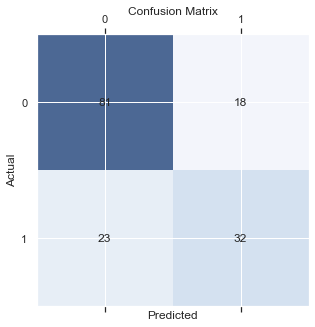

In [25]:
cm=confusion_matrix(ytest,pred)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()